In [1]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import seaborn as sns

from n0_config_params import *
from n0bis_config_analysis_functions import *
from n0ter_stats import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data

In [2]:
os.chdir(os.path.join(path_data, 'psychometric'))
os.listdir()

['OLFADYS_correspondance_questions.xlsx',
 'OLFADYS_MAIA.xlsx',
 'OLFADYS_mdp.xlsx',
 'OLFADYS_odor_choice.xlsx',
 'OLFADYS_odor_profiles.xlsx',
 'OLFADYS_questionnaire.xlsx']

In [96]:
df_mdp = pd.read_excel('OLFADYS_mdp.xlsx')
df_q = pd.read_excel('OLFADYS_questionnaire.xlsx')
correspondance_question = pd.read_excel('OLFADYS_correspondance_questions.xlsx')
df_odor_profile = pd.read_excel('OLFADYS_odor_profiles.xlsx')
df_odor_choice = pd.read_excel('OLFADYS_odor_choice.xlsx')
df_MAIA_raw = pd.read_excel('OLFADYS_MAIA.xlsx')

In [4]:
val = np.zeros((df_q['sujet'].unique().shape[0]*df_q['session'].unique().shape[0]*df_q['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_q['sujet'].unique()):
    for session_i, session in enumerate(df_q['session'].unique()):
        for cond_i, cond in enumerate(df_q['cond'].unique()):
            df_i = df_q.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_p = 300 - df_i[df_i['question'].isin([1, 4, 5])]['val'].sum()
            val_n = df_i[df_i['question'].isin([2, 3, 6])]['val'].sum()
            val_stai = ((val_n + val_p)/600)*100
            val[i, :] = np.array([sujet, session, cond, val_stai])
            i += 1
df_stai = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'val'])
df_stai['val'] = df_stai['val'].astype(np.float64) 


In [5]:
df_relax = df_q.query(f"question == 7").drop(['question', 'raw_val', 'scale'], axis=1)

In [6]:
question_A2 = ['A2_1', 'A2_2', 'A2_3', 'A2_4', 'A2_5']
df_A2 = df_mdp.query(f"question in {question_A2}").groupby(['sujet', 'session', 'cond']).mean().reset_index()

In [7]:
sujet_list = df_A2['sujet'].unique()
sujet_list

array(['AR30', 'BD12', 'BD27', 'BH10', 'CM32', 'DF25', 'DI22', 'DM08',
       'EF06', 'FA11', 'FP13', 'GB04', 'GM16', 'HJ31', 'JR17', 'LF23',
       'LG15', 'LV05', 'MA33', 'MD14', 'MJ02', 'MN26', 'NT28', 'PB07',
       'PD01', 'SC29', 'SE18', 'TA09', 'TJ24', 'TM19', 'TY20', 'VN03',
       'ZV21'], dtype=object)

In [76]:
sujet_list

array(['AR30', 'BD12', 'BD27', 'BH10', 'CM32', 'DF25', 'DI22', 'DM08',
       'EF06', 'FA11', 'FP13', 'GB04', 'GM16', 'HJ31', 'JR17', 'LF23',
       'LG15', 'LV05', 'MA33', 'MD14', 'MJ02', 'MN26', 'NT28', 'PB07',
       'PD01', 'SC29', 'SE18', 'TA09', 'TJ24', 'TM19', 'TY20', 'VN03',
       'ZV21'], dtype=object)

In [112]:
MAIA_aspects_list = ['Noticing', 'Not_Distracting', 'Not_Worrying', 'Attention_Regulation', 'Emotional_Awareness', 'Self_Regulation', 'Body_Listening', 'Trusting' ]
dict_MAIA = {'sujet' : [], 'aspect' : [], 'value' : [], 'rep' : []}
for sujet in sujet_list:
    if sujet in ['DF25', 'HJ31']:
        continue
    sujet_adj = sujet[-2:] + sujet[:2]
    for aspect in MAIA_aspects_list:
        dict_MAIA['sujet'].append(sujet)
        dict_MAIA['aspect'].append(aspect)

        if aspect == 'Noticing':
            val = df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [1, 2, 3, 4]")['value'].mean()
        if aspect == 'Not_Distracting':
            val = (5 - df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [5, 6, 7]")['value'].values).mean()
        if aspect == 'Not_Worrying':
            val = np.append((5 - df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [8, 9]")['value'].values), (df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [10]")['value'].values)).mean()
        if aspect == 'Attention_Regulation':
            val = df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [11, 12, 13 ,14 ,15 ,16 ,17]")['value'].mean()
        if aspect == 'Emotional_Awareness':
            val = df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [18, 19, 20, 21, 22]")['value'].mean()
        if aspect == 'Self_Regulation':
            val = df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [23, 24, 25, 26]")['value'].mean()
        if aspect == 'Body_Listening':
            val = df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [27, 28, 29]")['value'].mean()
        if aspect == 'Trusting':
            val = df_MAIA_raw.query(f"sujet == '{sujet_adj}' and question in [30, 31, 32]")['value'].mean()

        if sujet in sujet_best_list:
            dict_MAIA['rep'].append('+')
        else:
            dict_MAIA['rep'].append('-')
            
        dict_MAIA['value'].append(val)

df_MAIA = pd.DataFrame(dict_MAIA)


# FILTER SUBJECTS

## difference hedonicity

In [6]:
val = np.zeros((df_odor_choice['sujet'].unique().shape[0], 2), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_odor_choice['sujet'].unique()):
    df_i = df_odor_choice.query(f"sujet == '{sujet}'")
    diff_i = df_i[df_i['session'] == 'odor_+']['value'].values[0] - df_i[df_i['session'] == 'odor_-']['value'].values[0]
    val[i, :] = np.array([sujet, diff_i])
    i += 1

df_diff = pd.DataFrame(val, columns=['sujet', 'value'])
df_diff['value'] = df_diff['value'].astype(np.float64) 
df_diff

sujet      value
0   PD01  46.456693
1   MJ02  40.944882
2   VN03  27.559055
3   GB04  78.740157
4   LV05  33.858268
5   EF06  62.204724
6   PB07  80.314961
7   DM08  78.571429
8   TA09  75.396825
9   BH10  41.269841
10  FA11  76.190476
11  BD12  62.698413
12  FP13  65.873016
13  MD14  68.253968
14  LG15  63.492063
15  GM16  64.285714
16  JR17  87.301587
17  SE18  81.746032
18  TM19  41.269841
19  TY20  76.984127
20  ZV21  65.873016
21  DI22  52.380952
22  LF23  58.730159
23  TJ24  67.460317
24  DF25  52.380952
25  MN26  62.698413
26  BD27  59.842520
27  NT28  91.338583
28  SC29  96.062992
29  AR30  40.944882
30  HJ31  71.653543
31  CM32  33.333333
32  MA33  76.190476

<AxesSubplot:xlabel='value', ylabel='Count'>

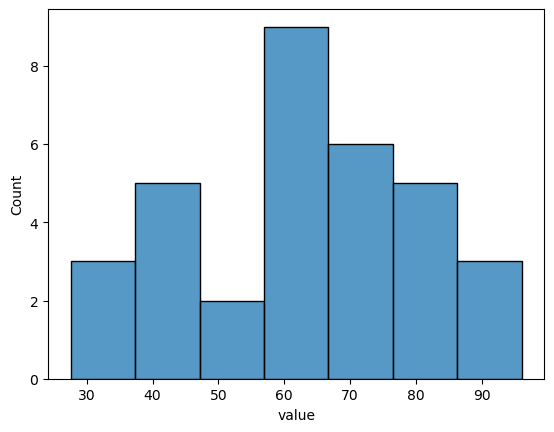

In [8]:
sns.histplot(data=df_diff, x="value")


## selection

In [367]:
data = {'sujet' : [], 'MECA' : [], 'CO2' : []}

for sujet in sujet_list:

    data['sujet'].append(sujet)

    for cond in ['MECA', 'CO2']:

        diff = df_A2.query(f"sujet == '{sujet}' and cond == '{cond}' and session == 'o'")['value'].values - df_A2.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '+'")['value'].values
        data[cond].append(diff[0])

df_sujet_diff_value_selection = pd.DataFrame(data)
df_sujet_diff_value_selection.sort_values('CO2', ascending=False)

sujet  MECA  CO2
27  TA09   0.4  3.0
18  MA33   1.0  2.8
32  ZV21   0.2  2.0
25  SC29   1.8  1.4
6   DI22   0.0  1.4
28  TJ24  -0.6  1.4
12  GM16   0.0  1.2
1   BD12   0.2  0.6
29  TM19   0.2  0.6
20  MJ02   0.0  0.6
13  HJ31  -0.8  0.6
21  MN26   0.8  0.4
4   CM32   0.0  0.4
31  VN03   0.2  0.4
24  PD01  -2.8  0.4
14  JR17   0.0  0.2
9   FA11   0.4  0.2
17  LV05   0.0  0.0
19  MD14  -0.4  0.0
11  GB04   0.0  0.0
23  PB07   0.0 -0.2
5   DF25   0.8 -0.2
2   BD27   0.0 -0.4
15  LF23  -0.2 -0.4
26  SE18  -0.8 -0.6
8   EF06  -0.2 -0.6
10  FP13  -1.0 -0.8
7   DM08   0.0 -0.8
3   BH10  -0.4 -1.2
30  TY20  -1.0 -1.4
22  NT28  -0.8 -1.4
0   AR30   0.0 -1.6
16  LG15   0.0 -2.0

In [368]:
sujet_best_sel = df_A2['sujet'].unique()[df_A2.query(f"cond == '{cond}' and session == '+'")['value'].values < df_A2.query(f"cond == '{cond}' and session == 'o'")['value'].values]
sujet_best_sel

array(['BD12', 'CM32', 'DI22', 'FA11', 'GM16', 'HJ31', 'JR17', 'MA33',
       'MJ02', 'MN26', 'PD01', 'SC29', 'TA09', 'TJ24', 'TM19', 'VN03',
       'ZV21'], dtype=object)

In [369]:
#### suppress PD01 who wasnt relaxed in MECA at all

In [370]:
print(f"sujet selected = {len([sujet for sujet in sujet_list if sujet in sujet_best_sel])}")
print(f"sujet not selected = {len([sujet for sujet in sujet_list if sujet not in sujet_best_sel])}")

sujet selected = 17
sujet not selected = 16


## A2 relief

In [58]:
sujet_best_sel = df_A2['sujet'].unique()[df_A2.query(f"cond == '{cond}' and session == '+'")['value'].values < df_A2.query(f"cond == '{cond}' and session == 'o'")['value'].values]
sujet_best_sel = sujet_best_sel.tolist()

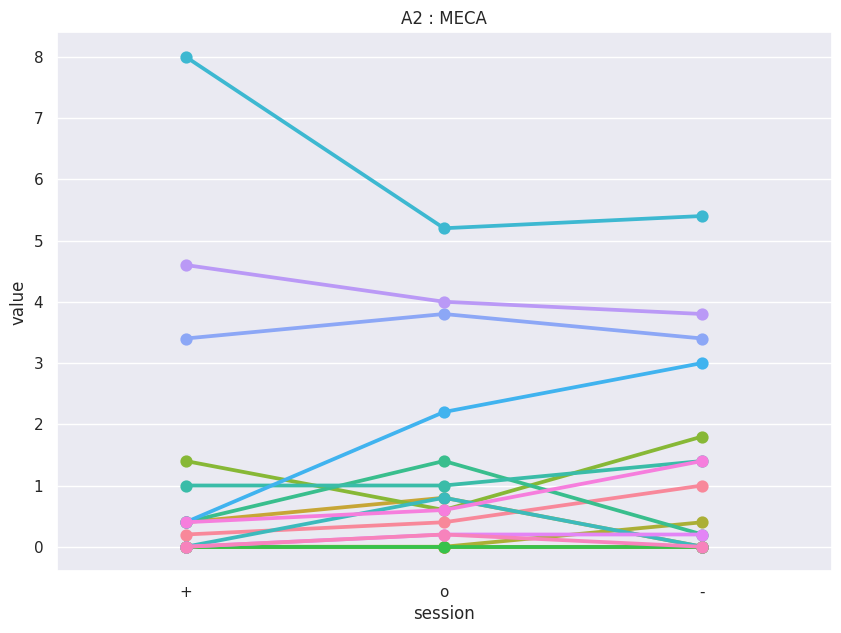

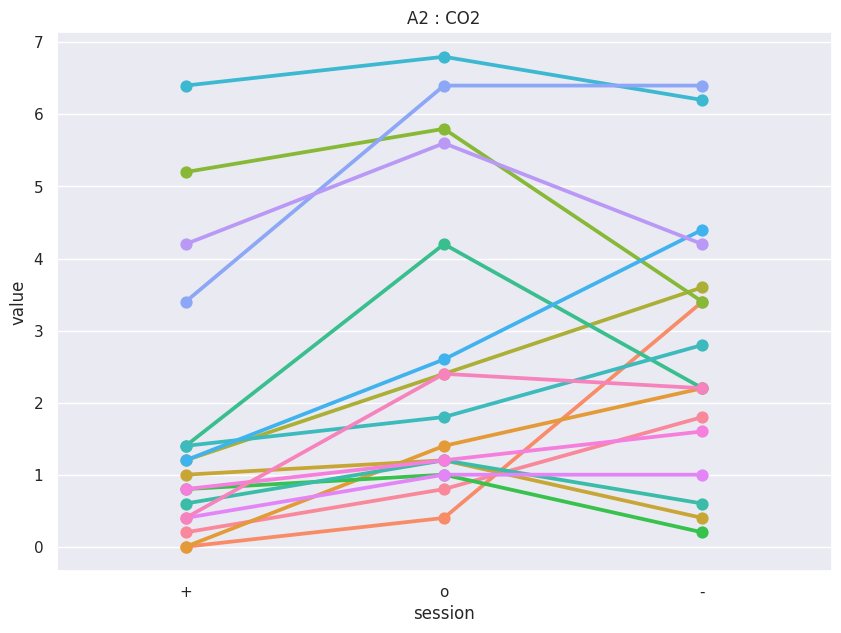

In [59]:
for cond in ['MECA', 'CO2']:
    
    fig, ax = plt.subplots()
    df_plot = df_A2.query(f"cond == '{cond}' and sujet in {sujet_best_sel}")
    sns.pointplot(data=df_plot, x="session", y="value", hue="sujet", ax=ax, order=['+', 'o', '-'])
    plt.legend([],[], frameon=False)
    plt.title(f'A2 : {cond}')
    sns.set(rc={'figure.figsize':(10,7)})

## relaxation

In [94]:
df_relax

sujet session     cond         val
6     PD01       o  FR_CV_1   45.283019
14    PD01       o     MECA   16.981132
22    PD01       o      CO2   13.207547
30    PD01       o  FR_CV_2   60.377358
38    PD01       +  FR_CV_1   53.503185
...    ...     ...      ...         ...
3134  MA33       +  FR_CV_2   90.322581
3142  MA33       -  FR_CV_1  100.000000
3150  MA33       -     MECA   32.258065
3158  MA33       -      CO2   23.076923
3166  MA33       -  FR_CV_2   46.153846

[396 rows x 4 columns]

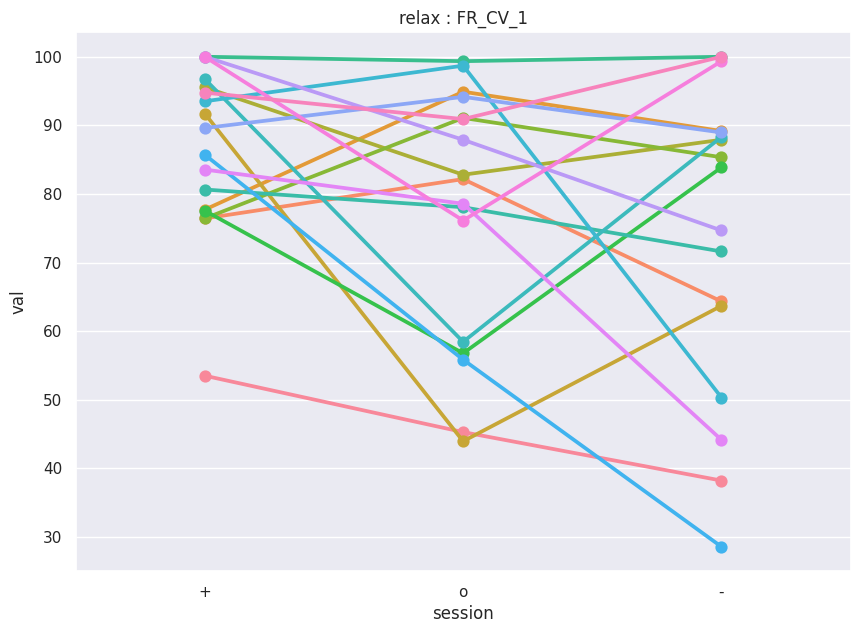

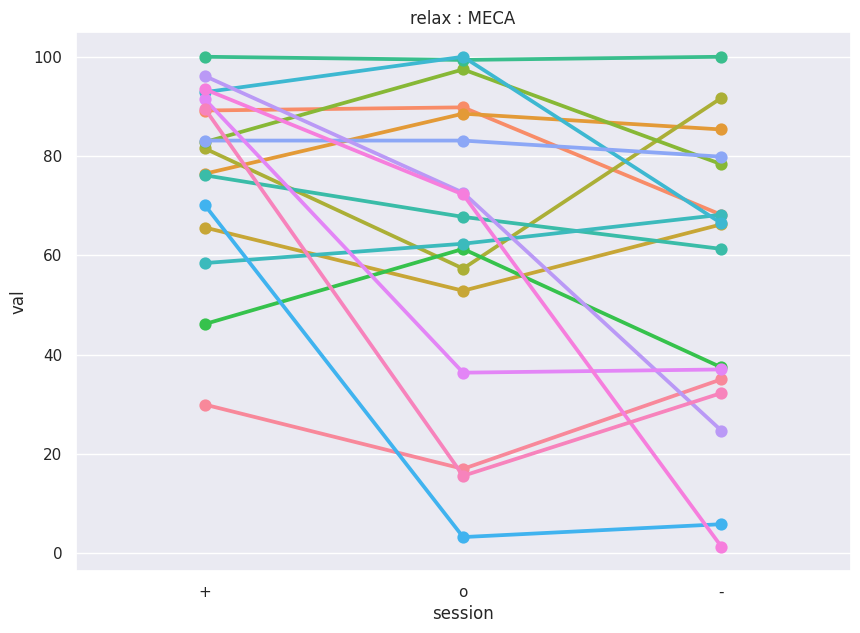

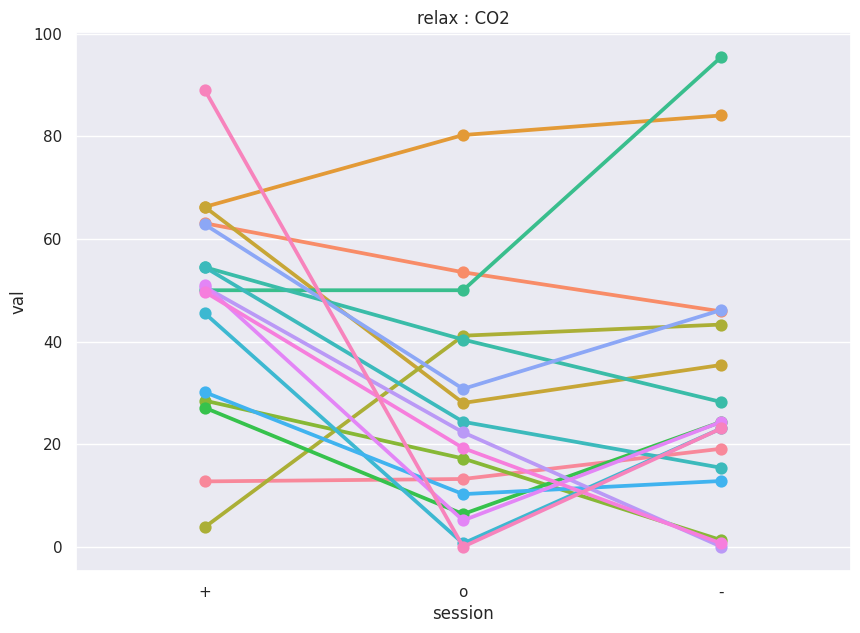

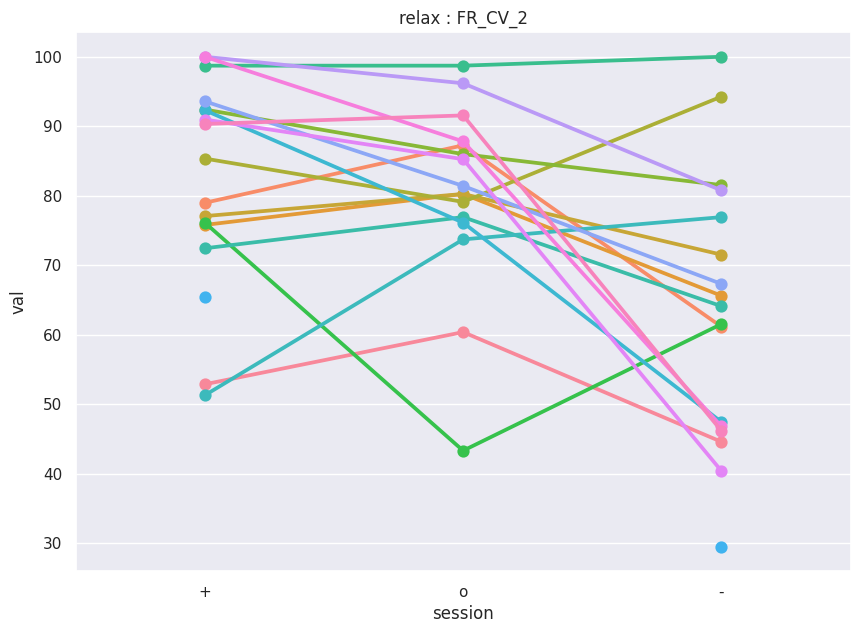

In [95]:
for cond in conditions:

    fig, ax = plt.subplots()
    df_plot = df_relax.query(f"cond == '{cond}' and sujet in {sujet_best_sel}")
    sns.pointplot(data=df_plot, x="session", y="val", hue="sujet", ax=ax, order=['+', 'o', '-'])
    plt.legend([],[], frameon=False)
    plt.title(f'relax : {cond}')
    sns.set(rc={'figure.figsize':(10,7)})


## all metric

In [405]:
data = {'sujet' : [], 'cond' : [], 'metric' : [], 'effect' : []}

for sujet in sujet_list:

    for cond in ['MECA', 'CO2']:

        for metric in ['A2', 'STAI', 'RELAX']:

            data['sujet'].append(sujet)
            data['cond'].append(cond)
            data['metric'].append(metric)

            effect = 0

            if metric == 'A2':

                if df_A2.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '+'")['value'].values < df_A2.query(f"sujet == '{sujet}' and cond == '{cond}' and session == 'o'")['value'].values:

                    effect = 1

            if metric == 'STAI':

                if df_stai.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '+'")['val'].values < df_stai.query(f"sujet == '{sujet}' and cond == '{cond}' and session == 'o'")['val'].values:

                    effect = 1

            if metric == 'RELAX':

                if df_relax.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '+'")['val'].values > df_relax.query(f"sujet == '{sujet}' and cond == '{cond}' and session == 'o'")['val'].values:

                    effect = 1

            data['effect'].append(effect)

df_allmetric = pd.DataFrame(data)
df_allmetric
            
    

sujet  cond metric  effect
0    AR30  MECA     A2       0
1    AR30  MECA   STAI       0
2    AR30  MECA  RELAX       0
3    AR30   CO2     A2       0
4    AR30   CO2   STAI       0
..    ...   ...    ...     ...
193  ZV21  MECA   STAI       1
194  ZV21  MECA  RELAX       0
195  ZV21   CO2     A2       1
196  ZV21   CO2   STAI       1
197  ZV21   CO2  RELAX       1

[198 rows x 4 columns]

In [406]:
df_allmetric.groupby(['sujet', 'cond']).sum().reset_index().query("effect == 3")['sujet'].unique()

/tmp/ipykernel_1677966/254566163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_allmetric.groupby(['sujet', 'cond']).sum().reset_index().query("effect == 3")['sujet'].unique()


array(['BD12', 'CM32', 'DF25', 'DI22', 'FA11', 'GM16', 'HJ31', 'MA33',
       'MJ02', 'MN26', 'SC29', 'TA09', 'TJ24', 'TM19', 'ZV21'],
      dtype=object)

In [407]:
np.array([sujet_best_sel])

array([['BD12', 'CM32', 'DI22', 'FA11', 'GM16', 'HJ31', 'JR17', 'MA33',
        'MJ02', 'MN26', 'PD01', 'SC29', 'TA09', 'TJ24', 'TM19', 'VN03',
        'ZV21']], dtype=object)

## best sujet exploration

In [408]:
question_list = df_odor_profile['question'].unique()
question_list

array(['appreciation', 'eveil', 'familiarite', 'intensite', 'evocation'],
      dtype=object)

In [409]:
#### kick PD01 for balanced analysis
df_odor_profile = df_odor_profile.query(f"sujet != 'PD01'")
sujet_best_sel_balanced = np.array([sujet for sujet in sujet_best_sel if sujet != 'PD01'])

In [410]:
sujet_sel_mask = []

for row_i in range(df_odor_profile.shape[0]):

    if df_odor_profile['sujet'].iloc[row_i] in sujet_best_sel_balanced:

        sujet_sel_mask.append('YES')

    else:

        sujet_sel_mask.append('NO')

df_odor_profile['select_best'] = sujet_sel_mask
df_odor_profile

sujet      question  odor  raw_val  scale  value select_best
30   MJ02  appreciation    11      3.0   12.5   24.0         YES
31   MJ02  appreciation     4      5.0   12.5   40.0         YES
32   MJ02  appreciation    13      5.4   12.5   43.2         YES
33   MJ02  appreciation    12      5.7   12.5   45.6         YES
34   MJ02  appreciation     7      8.9   12.5   71.2         YES
..    ...           ...   ...      ...    ...    ...         ...
985  MA33     evocation    13      0.0   12.5    0.0         YES
986  MA33     evocation     6     10.2   12.5   81.6         YES
987  MA33     evocation    12     11.3   12.5   90.4         YES
988  MA33     evocation     7     12.5   12.5  100.0         YES
989  MA33     evocation     4     12.5   12.5  100.0         YES

[960 rows x 7 columns]

In [411]:
odor_choice = {}

for sujet in df_odor_choice['sujet'].unique():

    odor_choice[sujet] = df_odor_choice.query(f"sujet == '{sujet}'")['odor'].values.tolist()

odor_choice

{'PD01': [6, 11],
 'MJ02': [6, 11],
 'VN03': [13, 11],
 'GB04': [9, 11],
 'LV05': [10, 11],
 'EF06': [2, 11],
 'PB07': [3, 11],
 'DM08': [7, 11],
 'TA09': [10, 12],
 'BH10': [2, 11],
 'FA11': [6, 12],
 'BD12': [7, 13],
 'FP13': [3, 12],
 'MD14': [7, 11],
 'LG15': [2, 12],
 'GM16': [6, 11],
 'JR17': [9, 13],
 'SE18': [9, 11],
 'TM19': [7, 1],
 'TY20': [6, 12],
 'ZV21': [4, 11],
 'DI22': [8, 12],
 'LF23': [9, 11],
 'TJ24': [9, 11],
 'DF25': [7, 11],
 'MN26': [6, 12],
 'BD27': [6, 11],
 'NT28': [4, 12],
 'SC29': [4, 11],
 'AR30': [10, 11],
 'HJ31': [8, 11],
 'CM32': [9, 11],
 'MA33': [6, 11]}

In [412]:
for sujet_i, sujet in enumerate(sujet_list):

    if sujet_i == 0:

        df_odor_profile_filtered = df_odor_profile.query(f"sujet == '{sujet}' and odor in {odor_choice[sujet]}")

    else:

        df_odor_profile_filtered = pd.concat((df_odor_profile_filtered, df_odor_profile.query(f"sujet == '{sujet}' and odor in {odor_choice[sujet]}")), axis=0)

In [413]:
for row_i in range(df_odor_profile_filtered.shape[0]):

    sujet_i = df_odor_profile_filtered['sujet'].iloc[row_i]

    if df_odor_profile_filtered['odor'].iloc[row_i] == odor_choice[sujet_i][0]:

        odor_quality = '+'

    elif df_odor_profile_filtered['odor'].iloc[row_i] == odor_choice[sujet_i][1]:

        odor_quality = '-'

    df_odor_profile_filtered['odor'].iloc[row_i] = odor_quality

/tmp/ipykernel_1677966/2745226153.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odor_profile_filtered['odor'].iloc[row_i] = odor_quality


In [414]:
df_odor_profile_filtered

sujet      question odor  raw_val  scale  value select_best
870  AR30  appreciation    -      0.0   12.5    0.0          NO
875  AR30  appreciation    +      9.3   12.5   74.4          NO
877  AR30         eveil    +      0.0   12.5    0.0          NO
880  AR30         eveil    -      0.0   12.5    0.0          NO
882  AR30   familiarite    -      1.0   12.5    8.0          NO
..    ...           ...  ...      ...    ...    ...         ...
617  ZV21   familiarite    +     12.5   12.5  100.0         YES
622  ZV21     intensite    -      9.6   12.5   76.8         YES
623  ZV21     intensite    +     11.5   12.5   92.0         YES
624  ZV21     evocation    -      0.9   12.5    7.2         YES
627  ZV21     evocation    +     12.2   12.5   97.6         YES

[321 rows x 7 columns]

In [416]:
data = {'question' : [], 'odor' : [], 'pval' : []}

for question in df_odor_profile_filtered['question'].unique():
    
    for odor in ['+', '-']:

        df_stats = df_odor_profile_filtered.query(f"question == '{question}' and odor == '{odor}'")
        pval = get_stats_df(df=df_stats, predictor='select_best', outcome='value', subject='sujet', design='within')
        data['question'].append(question)
        data['pval'].append(pval)
        data['odor'].append(odor)

df_odor_profile_signi = pd.DataFrame(data)
df_odor_profile_signi

/home/jules.granget/myenvs/py39c/lib64/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/jules.granget/myenvs/py39c/lib64/python3.9/site-packages/pingouin/parametric.py:227: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


question odor    pval
0  appreciation    +  0.8603
1  appreciation    -  0.8647
2         eveil    +  0.9158
3         eveil    -  0.8603
4   familiarite    +  0.7820
5   familiarite    -  0.4332
6     intensite    +  0.4989
7     intensite    -  0.2114
8     evocation    +  0.2979
9     evocation    -  0.3484

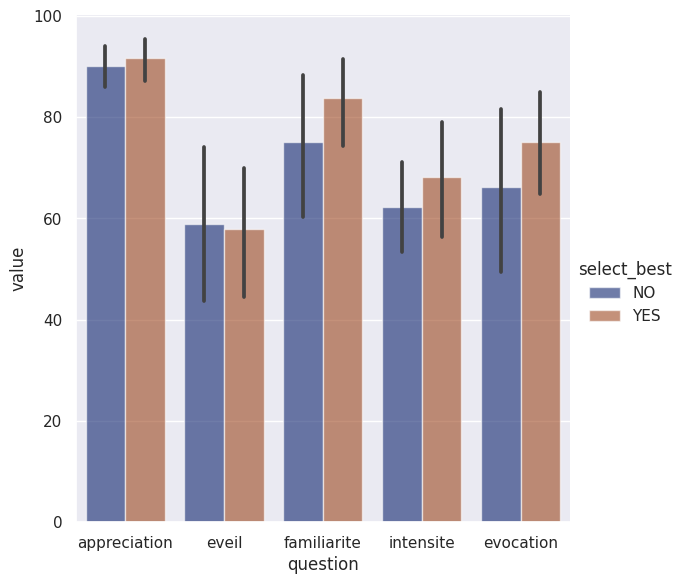

In [421]:
sns.catplot(data=df_odor_profile_filtered.query("odor == '+'"), kind="bar", x="question", y="value", hue="select_best", palette="dark", alpha=.6, height=6)

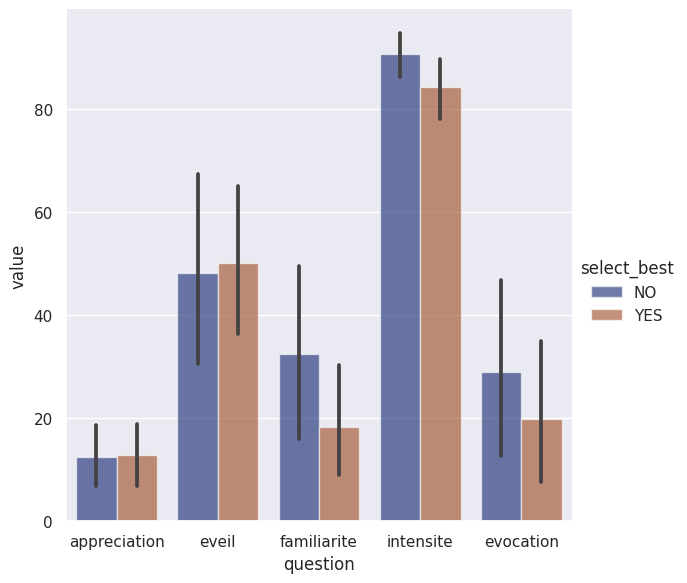

In [422]:
sns.catplot(data=df_odor_profile_filtered.query("odor == '-'"), kind="bar", x="question", y="value", hue="select_best", palette="dark", alpha=.6, height=6)

In [423]:
data = {'sujet' : [], 'value' : [], 'select' : []}

for sujet in sujet_list:
    
    data['sujet'].append(sujet)
    data['value'].append(df_odor_choice.query(f"session == 'odor_+' and sujet == '{sujet}'")['value'].values[0] - df_odor_choice.query(f"session == 'odor_-' and sujet == '{sujet}'")['value'].values[0])
    
    if sujet in sujet_best_sel:

        data['select'].append(True)

    else:

        data['select'].append(False)

df_diff_intensity = pd.DataFrame(data)
df_diff_intensity

sujet      value  select
0   AR30  40.944882   False
1   BD12  62.698413    True
2   BD27  59.842520   False
3   BH10  41.269841   False
4   CM32  33.333333    True
5   DF25  52.380952   False
6   DI22  52.380952    True
7   DM08  78.571429   False
8   EF06  62.204724   False
9   FA11  76.190476    True
10  FP13  65.873016   False
11  GB04  78.740157   False
12  GM16  64.285714    True
13  HJ31  71.653543    True
14  JR17  87.301587    True
15  LF23  58.730159   False
16  LG15  63.492063   False
17  LV05  33.858268   False
18  MA33  76.190476    True
19  MD14  68.253968   False
20  MJ02  40.944882    True
21  MN26  62.698413    True
22  NT28  91.338583   False
23  PB07  80.314961   False
24  PD01  46.456693    True
25  SC29  96.062992    True
26  SE18  81.746032   False
27  TA09  75.396825    True
28  TJ24  67.460317    True
29  TM19  41.269841    True
30  TY20  76.984127   False
31  VN03  27.559055    True
32  ZV21  65.873016    True

In [213]:
df_stats = df_diff_intensity
pval = get_stats_df(df=df_stats, predictor='select', outcome='value', subject='sujet', design='within')
print(f"pval : {pval}")

pval : 0.6274


/home/jules.granget/myenvs/py39c/lib64/python3.9/site-packages/pingouin/parametric.py:227: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


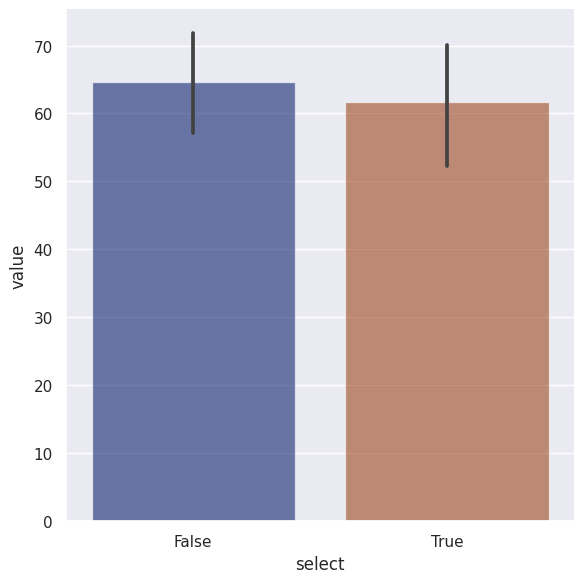

In [167]:
sns.catplot(data=df_diff_intensity, kind="bar", x="select", y="value", palette="dark", alpha=.6, height=6)

In [425]:
df_odor_profile_filtered

sujet      question odor  raw_val  scale  value select_best
870  AR30  appreciation    -      0.0   12.5    0.0          NO
875  AR30  appreciation    +      9.3   12.5   74.4          NO
877  AR30         eveil    +      0.0   12.5    0.0          NO
880  AR30         eveil    -      0.0   12.5    0.0          NO
882  AR30   familiarite    -      1.0   12.5    8.0          NO
..    ...           ...  ...      ...    ...    ...         ...
617  ZV21   familiarite    +     12.5   12.5  100.0         YES
622  ZV21     intensite    -      9.6   12.5   76.8         YES
623  ZV21     intensite    +     11.5   12.5   92.0         YES
624  ZV21     evocation    -      0.9   12.5    7.2         YES
627  ZV21     evocation    +     12.2   12.5   97.6         YES

[321 rows x 7 columns]

In [436]:
data = {'sujet' : [], 'question' : [], 'value' : [], 'select_best' : []}

for sujet in df_odor_profile_filtered['sujet'].unique():

    for question in df_odor_profile_filtered['question'].unique():

        data['sujet'].append(sujet)
        data['question'].append(question)
        data['value'].append(df_odor_profile_filtered.query(f"sujet == '{sujet}' and question == '{question}' and odor == '+'")['value'].values[0] - df_odor_profile_filtered.query(f"sujet == '{sujet}' and question == '{question}' and odor == '-'")['value'].values[0])
        data['select_best'].append(df_odor_profile_filtered.query(f"sujet == '{sujet}' and question == '{question}' and odor == '+'")['select_best'].values[0])

df_diff_odor_profile = pd.DataFrame(data)
df_diff_odor_profile

sujet      question  value select_best
0    AR30  appreciation   74.4          NO
1    AR30         eveil    0.0          NO
2    AR30   familiarite   37.6          NO
3    AR30     intensite  -61.6          NO
4    AR30     evocation    4.8          NO
..    ...           ...    ...         ...
155  ZV21  appreciation   73.6         YES
156  ZV21         eveil  -12.0         YES
157  ZV21   familiarite   96.8         YES
158  ZV21     intensite   15.2         YES
159  ZV21     evocation   90.4         YES

[160 rows x 4 columns]

In [440]:
data = {'question' : [], 'pval' : []}

for question in df_diff_odor_profile['question'].unique():

    df_stats = df_diff_odor_profile.query(f"question == '{question}'")
    pval = get_stats_df(df=df_stats, predictor='select_best', outcome='value', subject='sujet', design='within')
    data['question'].append(question)
    data['pval'].append(pval)

df_diff_odor_profile_signi = pd.DataFrame(data)
df_diff_odor_profile_signi

question    pval
0  appreciation  0.8043
1         eveil  0.6022
2   familiarite  0.0976
3     intensite  0.2421
4     evocation  0.2497

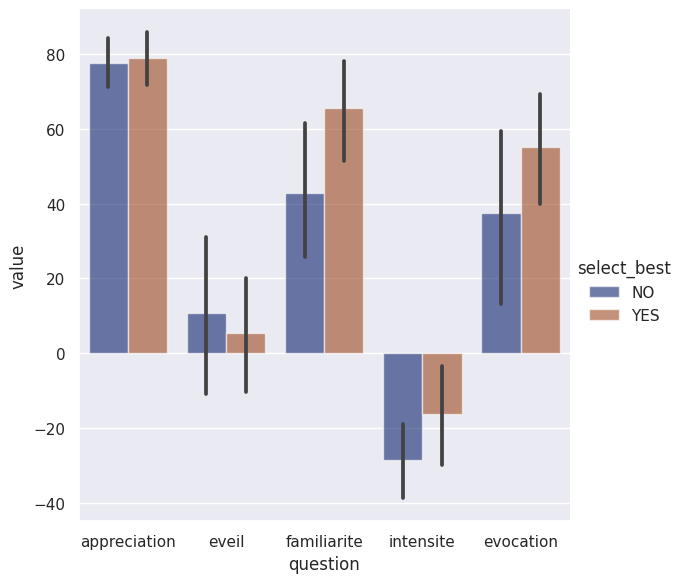

In [441]:
sns.catplot(data=df_diff_odor_profile, kind="bar", x="question", y="value", hue="select_best", palette="dark", alpha=.6, height=6)

## PCA

In [451]:
df_odor_profile_filtered

sujet      question odor  raw_val  scale  value select_best
870  AR30  appreciation    -      0.0   12.5    0.0          NO
875  AR30  appreciation    +      9.3   12.5   74.4          NO
877  AR30         eveil    +      0.0   12.5    0.0          NO
880  AR30         eveil    -      0.0   12.5    0.0          NO
882  AR30   familiarite    -      1.0   12.5    8.0          NO
..    ...           ...  ...      ...    ...    ...         ...
617  ZV21   familiarite    +     12.5   12.5  100.0         YES
622  ZV21     intensite    -      9.6   12.5   76.8         YES
623  ZV21     intensite    +     11.5   12.5   92.0         YES
624  ZV21     evocation    -      0.9   12.5    7.2         YES
627  ZV21     evocation    +     12.2   12.5   97.6         YES

[321 rows x 7 columns]

In [471]:
data = {'sujet' : [], 'odor' : [], 'select' : [], 'appreciation' : [], 'eveil' : [], 'familiarite' : [], 'intensite' : [], 'evocation' : [], 'diff' : []}

for odor in ['+', '-']:

    for sujet in df_odor_profile_filtered['sujet'].unique():
        
        data['sujet'].append(sujet)

        for question in df_odor_profile['question'].unique():

            data[question].append(df_odor_profile_filtered.query(f"sujet == '{sujet}' and question == '{question}' and odor == '{odor}'")['value'].values[0])

        data['diff'].append(df_diff_intensity.query(f"sujet == '{sujet}'")['value'].values[0])
        data['odor'].append(odor)

        if sujet in sujet_best_sel_balanced:
            data['select'].append('select')
        else:
            data['select'].append('non_select')

df_pca = pd.DataFrame(data)
df_pca


sujet odor      select  appreciation      eveil  familiarite   intensite  \
0   AR30    +  non_select     74.400000   0.000000    45.600000   35.200000   
1   BD12    +      select     99.200000  99.200000    99.200000   99.200000   
2   BD27    +  non_select    100.000000  60.800000   100.000000   56.000000   
3   BH10    +  non_select     74.400000  70.400000    91.200000   61.600000   
4   CM32    +      select     97.637795  68.503937    29.133858   90.551181   
..   ...  ...         ...           ...        ...          ...         ...   
59  TJ24    -      select     10.400000  59.200000    13.600000   88.000000   
60  TM19    -      select     38.400000  56.000000    28.000000   60.000000   
61  TY20    -  non_select     38.400000  72.000000    80.000000  100.000000   
62  VN03    -      select      4.000000  57.333333     0.000000   89.333333   
63  ZV21    -      select     25.600000  50.400000     3.200000   76.800000   

     evocation       diff  
0     4.800000  40.944882  
1    63.200000  62.698413  
2   100.000000  59.842520  
3    80.000000  41.269841  
4    97.637795  33.333333  
..         ...        ...  
59   19.200000  67.460317  
60   57.600000  41.269841  
61  100.000000  76.984127  
62    0.000000  27.559055  
63    7.200000  65.873016  

[64 rows x 9 columns]

In [472]:


X = df_pca.query(f"odor == '+'")[['appreciation', 'eveil', 'familiarite', 'intensite', 'evocation', 'diff']].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit_transform(X)
df_pca_fit = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])



<Figure size 1000x700 with 0 Axes>

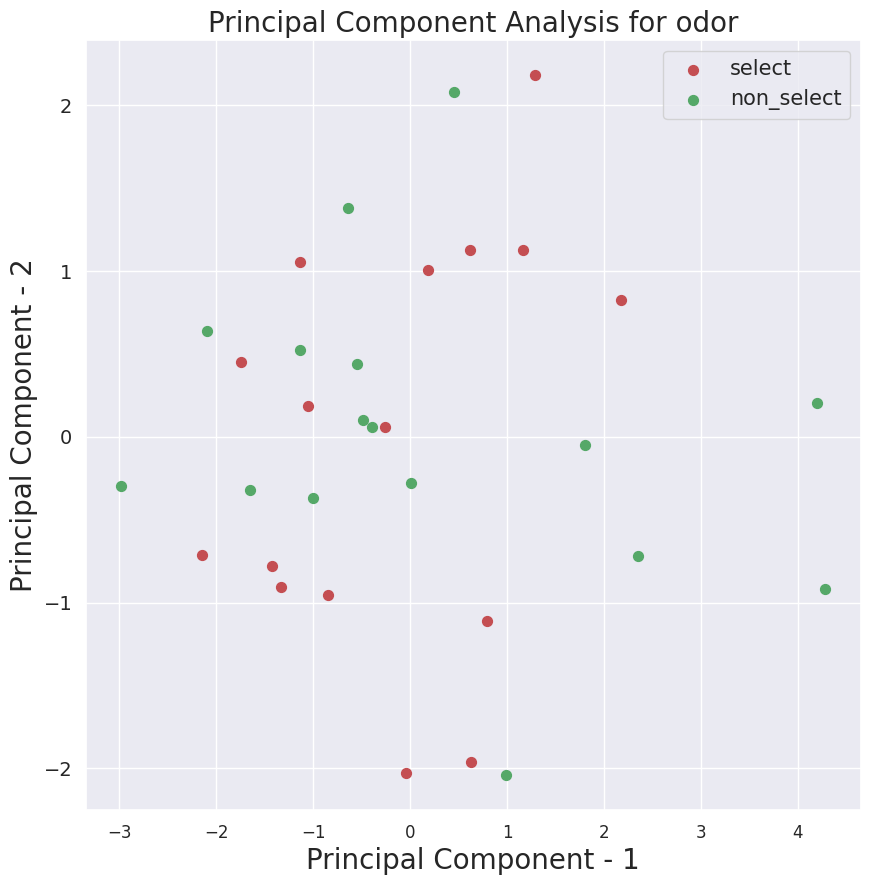

In [476]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis for odor",fontsize=20)
targets = ['select', 'non_select']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['select'] == target
    plt.scatter(df_pca_fit.loc[indicesToKeep, 'principal component 1']
               , df_pca_fit.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [477]:
df_diff_odor_profile

sujet      question  value select_best
0    AR30  appreciation   74.4          NO
1    AR30         eveil    0.0          NO
2    AR30   familiarite   37.6          NO
3    AR30     intensite  -61.6          NO
4    AR30     evocation    4.8          NO
..    ...           ...    ...         ...
155  ZV21  appreciation   73.6         YES
156  ZV21         eveil  -12.0         YES
157  ZV21   familiarite   96.8         YES
158  ZV21     intensite   15.2         YES
159  ZV21     evocation   90.4         YES

[160 rows x 4 columns]

In [479]:
data = {'sujet' : [], 'select' : [], 'appreciation' : [], 'eveil' : [], 'familiarite' : [], 'intensite' : [], 'evocation' : [], 'diff' : []}

for sujet in df_diff_odor_profile['sujet'].unique():
    
    data['sujet'].append(sujet)

    for question in df_odor_profile['question'].unique():

        data[question].append(df_diff_odor_profile.query(f"sujet == '{sujet}' and question == '{question}'")['value'].values[0])

    data['diff'].append(df_diff_intensity.query(f"sujet == '{sujet}'")['value'].values[0])

    if sujet in sujet_best_sel_balanced:
        data['select'].append('select')
    else:
        data['select'].append('non_select')

df_pca = pd.DataFrame(data)
df_pca

sujet      select  appreciation      eveil  familiarite  intensite  \
0   AR30  non_select     74.400000   0.000000    37.600000 -61.600000   
1   BD12      select     87.200000   8.800000    84.800000  17.600000   
2   BD27  non_select    100.000000  60.800000   100.000000 -40.000000   
3   BH10  non_select     68.800000   8.800000    69.600000 -34.400000   
4   CM32      select     96.062992 -26.771654    20.472441  -6.299213   
5   DF25  non_select     87.200000  -4.800000    89.600000 -44.000000   
6   DI22      select     84.800000  52.800000    66.400000  20.800000   
7   DM08  non_select     72.800000 -12.000000    -3.200000 -27.200000   
8   EF06  non_select     54.400000 -11.200000    33.600000 -10.400000   
9   FA11      select     86.400000 -30.400000    56.800000 -49.600000   
10  FP13  non_select     71.200000  55.200000     5.600000 -36.800000   
11  GB04  non_select     64.800000  30.400000    28.800000 -14.400000   
12  GM16      select     84.800000  19.200000    58.400000  -7.200000   
13  HJ31      select     72.000000  34.400000    80.800000 -47.200000   
14  JR17      select     91.200000  28.000000     5.600000 -16.000000   
15  LF23  non_select     62.204724  14.173228    18.897638  -3.149606   
16  LG15  non_select     84.000000 -30.400000    52.000000  -6.400000   
17  LV05  non_select     96.000000 -77.600000     3.200000 -70.400000   
18  MA33      select    100.000000  12.000000   100.000000 -56.800000   
19  MD14  non_select     83.200000  74.400000    88.000000  -3.200000   
20  MJ02      select     56.000000 -48.000000    40.000000 -68.800000   
21  MN26      select     61.600000 -20.800000    92.000000  -4.000000   
22  NT28  non_select    100.000000  96.800000     4.800000   4.800000   
23  PB07  non_select     92.000000   9.600000    92.800000 -33.600000   
24  SC29      select     88.800000 -41.600000   100.000000  -6.400000   
25  SE18  non_select     68.800000  11.200000    70.400000 -37.600000   
26  TA09      select     70.400000  56.000000    75.200000  -4.800000   
27  TJ24      select     88.000000  32.000000    57.600000 -14.400000   
28  TM19      select     45.600000   5.600000    44.800000   4.000000   
29  TY20  non_select     61.600000 -53.600000    -7.200000 -40.000000   
30  VN03      select     74.666667  14.666667    69.333333 -34.666667   
31  ZV21      select     73.600000 -12.000000    96.800000  15.200000   

     evocation       diff  
0     4.800000  40.944882  
1    60.000000  62.698413  
2   100.000000  59.842520  
3    66.400000  41.269841  
4    34.645669  33.333333  
5    85.600000  52.380952  
6    84.800000  52.380952  
7    -6.400000  78.571429  
8    43.200000  62.204724  
9    72.000000  76.190476  
10    3.200000  65.873016  
11   31.200000  78.740157  
12   13.600000  64.285714  
13   72.800000  71.653543  
14    0.000000  87.301587  
15   21.259843  58.730159  
16   71.200000  63.492063  
17   -1.600000  33.858268  
18   81.600000  76.190476  
19   91.200000  68.253968  
20   33.600000  40.944882  
21   92.800000  62.698413  
22    3.200000  91.338583  
23   94.400000  80.314961  
24   61.600000  96.062992  
25   61.600000  81.746032  
26   60.800000  75.396825  
27   64.800000  67.460317  
28  -10.400000  41.269841  
29  -71.200000  76.984127  
30   70.000000  27.559055  
31   90.400000  65.873016

In [482]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_pca[['appreciation', 'eveil', 'familiarite', 'intensite', 'evocation', 'diff']].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit_transform(X)
df_pca_fit = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

<Figure size 1000x700 with 0 Axes>

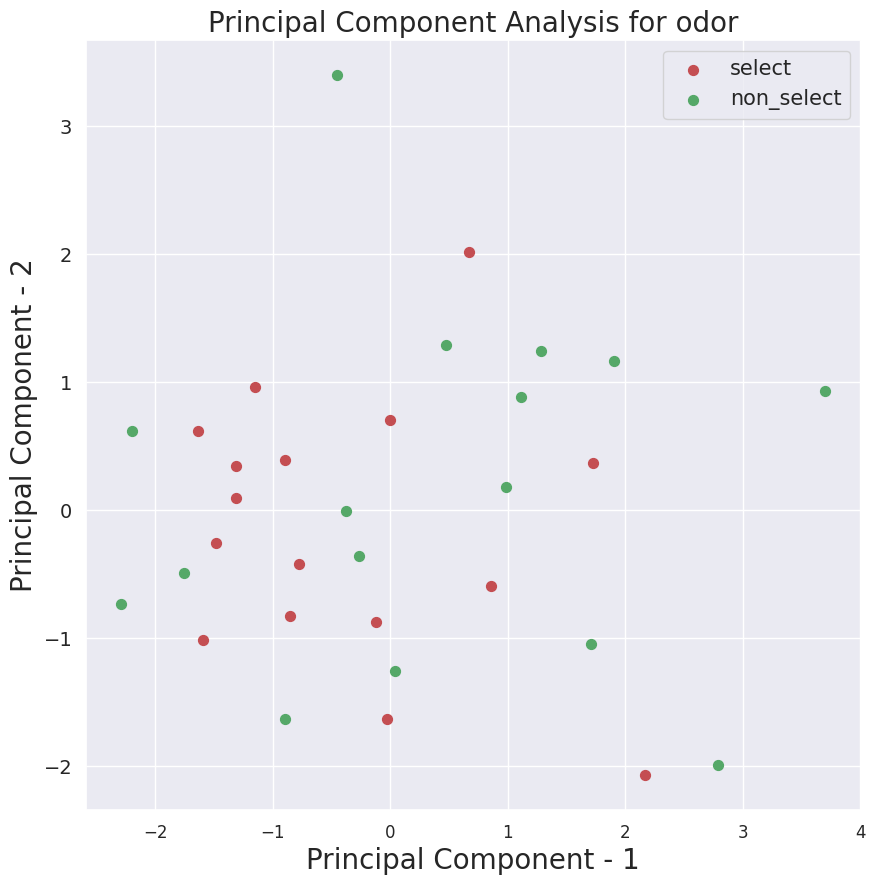

In [483]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis for odor",fontsize=20)
targets = ['select', 'non_select']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['select'] == target
    plt.scatter(df_pca_fit.loc[indicesToKeep, 'principal component 1']
               , df_pca_fit.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [500]:
data = {'sujet' : [], 'odor' : [], 'cond' : [], 'select' : [], 'RELAX' : [], 'A2' : [], 'STAI' : []}

for sujet in df_diff_odor_profile['sujet'].unique():

    for odor in odor_list:

        for cond in ['MECA', 'CO2']:
        
            data['sujet'].append(sujet)
            data['odor'].append(odor)
            data['cond'].append(cond)

            data['RELAX'].append(df_relax.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '{odor}'")['val'].values[0])
            data['A2'].append(df_A2.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '{odor}'")['value'].values[0])
            data['STAI'].append(df_stai.query(f"sujet == '{sujet}' and cond == '{cond}' and session == '{odor}'")['val'].values[0])

            if sujet in sujet_best_sel_balanced:
                data['select'].append('select')
            else:
                data['select'].append('non_select')

df_pca_allpsycho = pd.DataFrame(data)
df_pca_allpsycho

sujet odor  cond      select      RELAX   A2       STAI
0    AR30    o  MECA  non_select  25.161290  0.0  31.075269
1    AR30    o   CO2  non_select  46.153846  0.0  24.679487
2    AR30    +  MECA  non_select  22.077922  0.0  41.883117
3    AR30    +   CO2  non_select  44.871795  1.6  41.132479
4    AR30    -  MECA  non_select  94.805195  0.0  23.376623
..    ...  ...   ...         ...        ...  ...        ...
187  ZV21    o   CO2      select  24.358974  2.4  67.735043
188  ZV21    +  MECA      select  58.441558  0.0  25.974026
189  ZV21    +   CO2      select  54.487179  0.4  49.679487
190  ZV21    -  MECA      select  68.181818  0.0  20.995671
191  ZV21    -   CO2      select  15.384615  2.2  73.076923

[192 rows x 7 columns]

In [497]:
df_pca = df_pca.query(f"cond == '{cond}' and odor == '{odor}'")
X = df_pca[['RELAX', 'A2', 'STAI']].values
X
# X = StandardScaler().fit_transform(X)

array([], shape=(0, 3), dtype=float64)

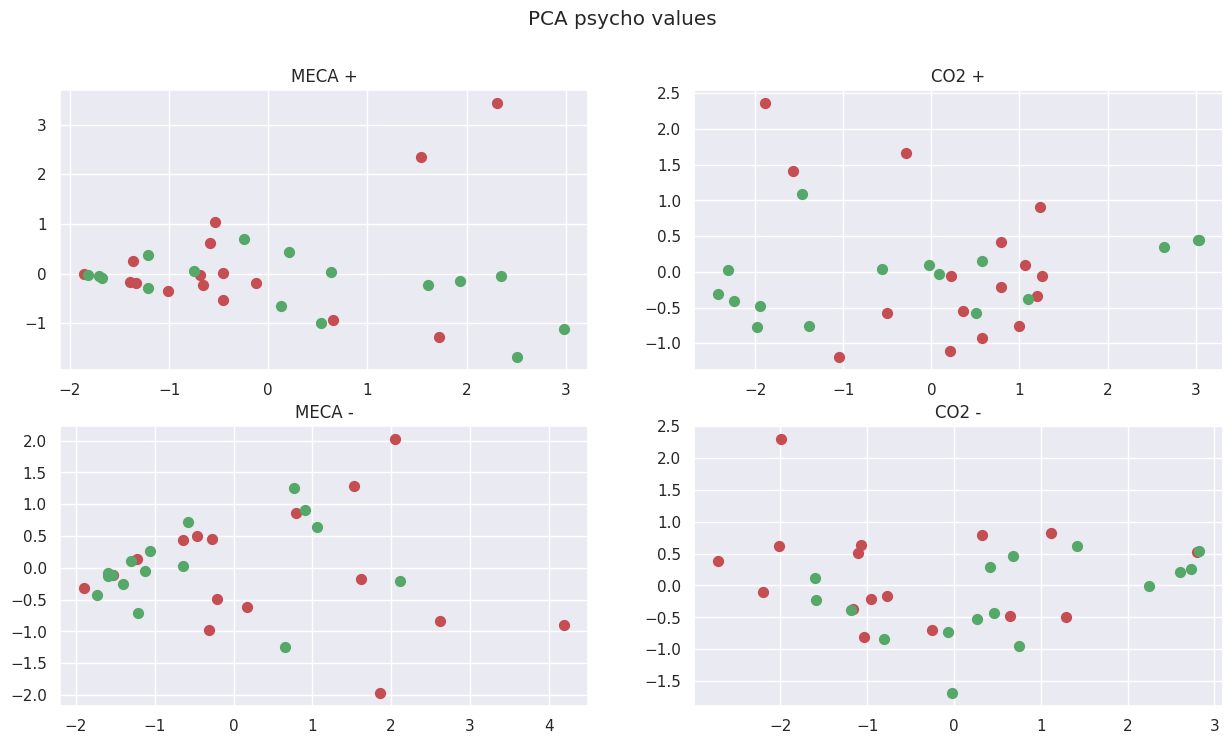

In [502]:
fig, axs = plt.subplots(ncols=len(['MECA', 'CO2']), nrows=len(['+', '-']))

for cond_i, cond in enumerate(['MECA', 'CO2']):

    for odor_i, odor in enumerate(['+', '-']):

        ax = axs[odor_i, cond_i]

        df_pca = df_pca_allpsycho.query(f"cond == '{cond}' and odor == '{odor}'")
        X = df_pca[['RELAX', 'A2', 'STAI']].values
        X = StandardScaler().fit_transform(X)
        pca = PCA(n_components=2).fit_transform(X)
        df_pca_fit = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

        ax.set_title(f"{cond} {odor}")
        targets = ['select', 'non_select']
        colors = ['r', 'g']
        for target, color in zip(targets,colors):
            indicesToKeep = df_pca['select'] == target
            ax.scatter(df_pca_fit.loc[indicesToKeep.values, 'principal component 1']
                    , df_pca_fit.loc[indicesToKeep.values, 'principal component 2'], c = color, s = 50)

plt.suptitle('PCA psycho values')
fig.set_figheight(8)
fig.set_figwidth(15)

# odor analysis

In [ ]:
df_odor_choice

sujet session  odor  raw_val  scale      value
0   PD01  odor_+     6     10.1   12.7  79.527559
1   PD01  odor_-    11      4.2   12.7  33.070866
2   MJ02  odor_+     6      8.7   12.7  68.503937
3   MJ02  odor_-    11      3.5   12.7  27.559055
4   VN03  odor_+    13      7.5   12.7  59.055118
..   ...     ...   ...      ...    ...        ...
61  HJ31  odor_-    11      1.6   12.7  12.598425
62  CM32  odor_+     9      9.6   12.6  76.190476
63  CM32  odor_-    11      5.4   12.6  42.857143
64  MA33  odor_+     6     10.5   12.6  83.333333
65  MA33  odor_-    11      0.9   12.6   7.142857

[66 rows x 6 columns]

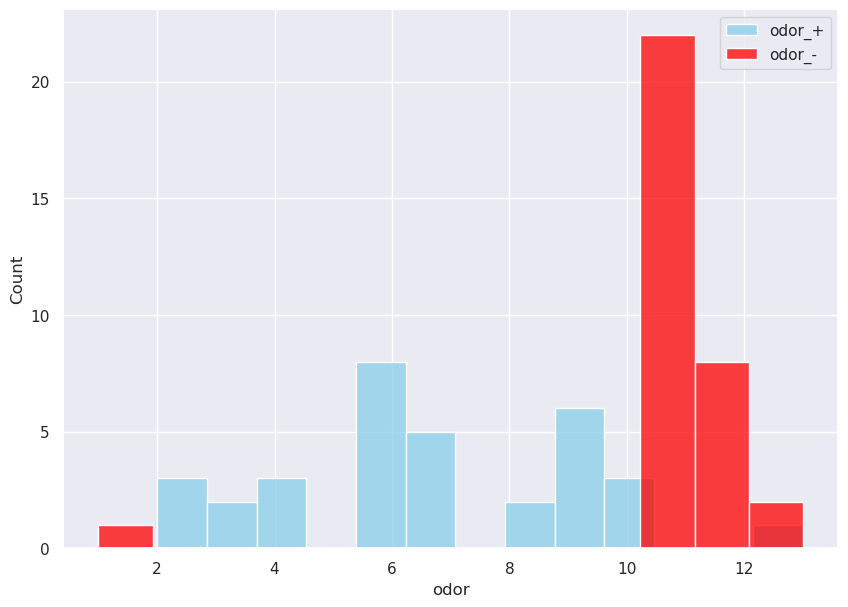

In [ ]:
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_+').values]
sns.histplot(data=df_plot, x="odor", label='odor_+', color="skyblue", bins=13)
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_-').values]
sns.histplot(data=df_plot, x="odor", label='odor_-', color="red", bins=13)

plt.legend()

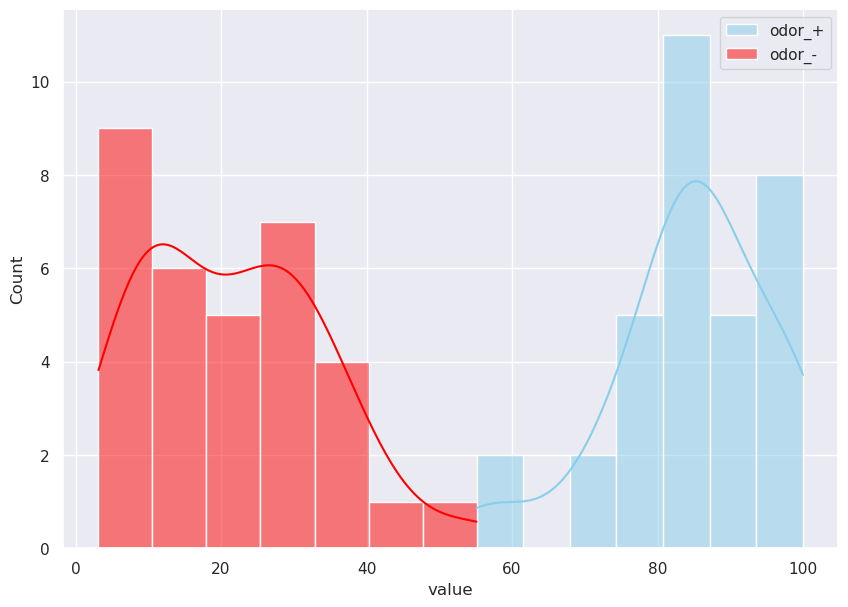

In [ ]:
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_+').values]
sns.histplot(data=df_plot, x="value", label='odor_+', color="skyblue", kde=True)
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_-').values]
sns.histplot(data=df_plot, x="value", label='odor_-', color="red", kde=True)

plt.legend()


In [ ]:
df_odor_choice

sujet session  odor  raw_val  scale      value
0   PD01  odor_+     6     10.1   12.7  79.527559
1   PD01  odor_-    11      4.2   12.7  33.070866
2   MJ02  odor_+     6      8.7   12.7  68.503937
3   MJ02  odor_-    11      3.5   12.7  27.559055
4   VN03  odor_+    13      7.5   12.7  59.055118
..   ...     ...   ...      ...    ...        ...
61  HJ31  odor_-    11      1.6   12.7  12.598425
62  CM32  odor_+     9      9.6   12.6  76.190476
63  CM32  odor_-    11      5.4   12.6  42.857143
64  MA33  odor_+     6     10.5   12.6  83.333333
65  MA33  odor_-    11      0.9   12.6   7.142857

[66 rows x 6 columns]

In [ ]:
val = np.zeros((df_odor_choice['sujet'].unique().shape[0], 2), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_odor_choice['sujet'].unique()):
    df_i = df_odor_choice.query(f"sujet == '{sujet}'")
    diff_i = df_i[df_i['session'] == 'odor_+']['value'].values[0] - df_i[df_i['session'] == 'odor_-']['value'].values[0]
    val[i, :] = np.array([sujet, diff_i])
    i += 1

In [ ]:
df_diff = pd.DataFrame(val, columns=['sujet', 'value'])
df_diff['value'] = df_diff['value'].astype(np.float64) 
df_diff

sujet      value
0   PD01  46.456693
1   MJ02  40.944882
2   VN03  27.559055
3   GB04  78.740157
4   LV05  33.858268
5   EF06  62.204724
6   PB07  80.314961
7   DM08  78.571429
8   TA09  75.396825
9   BH10  41.269841
10  FA11  76.190476
11  BD12  62.698413
12  FP13  65.873016
13  MD14  68.253968
14  LG15  63.492063
15  GM16  64.285714
16  JR17  87.301587
17  SE18  81.746032
18  TM19  41.269841
19  TY20  76.984127
20  ZV21  65.873016
21  DI22  52.380952
22  LF23  58.730159
23  TJ24  67.460317
24  DF25  52.380952
25  MN26  62.698413
26  BD27  59.842520
27  NT28  91.338583
28  SC29  96.062992
29  AR30  40.944882
30  HJ31  71.653543
31  CM32  33.333333
32  MA33  76.190476

<AxesSubplot:xlabel='value', ylabel='Count'>

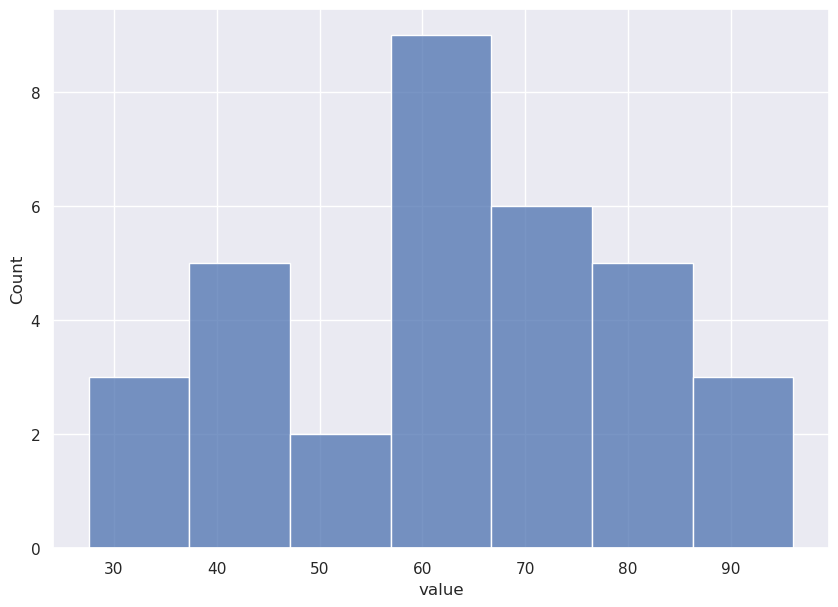

In [ ]:
sns.histplot(data=df_diff, x="value")

In [ ]:
sujet_sel_diff = df_diff.query("value >= 60")['sujet'].values
sujet_sel_diff

array(['GB04', 'EF06', 'PB07', 'DM08', 'TA09', 'FA11', 'BD12', 'FP13',
       'MD14', 'LG15', 'GM16', 'JR17', 'SE18', 'TY20', 'ZV21', 'TJ24',
       'MN26', 'NT28', 'SC29', 'HJ31', 'MA33'], dtype=object)

In [ ]:
df_odor_profile

sujet      question  odor  raw_val  scale       value
0    PD01  appreciation    11      0.0   15.0    0.000000
1    PD01  appreciation    13      7.3   15.0   48.666667
2    PD01  appreciation    12      8.0   15.0   53.333333
3    PD01  appreciation     4     11.0   15.0   73.333333
4    PD01  appreciation     5     13.1   15.0   87.333333
..    ...           ...   ...      ...    ...         ...
985  MA33     evocation    13      0.0   12.5    0.000000
986  MA33     evocation     6     10.2   12.5   81.600000
987  MA33     evocation    12     11.3   12.5   90.400000
988  MA33     evocation     7     12.5   12.5  100.000000
989  MA33     evocation     4     12.5   12.5  100.000000

[990 rows x 6 columns]

In [ ]:
for sujet_i, sujet in enumerate(df_odor_profile['sujet'].unique()):
    odor_p = df_odor_choice.query(f"sujet == '{sujet}' & session == 'odor_+'")['odor'].values[0]
    odor_n = df_odor_choice.query(f"sujet == '{sujet}' & session == 'odor_-'")['odor'].values[0]
    odor_sel = [odor_p, odor_n]
    if sujet_i == 0:
        df_odor_profile_filtered = df_odor_profile.query(f"sujet == '{sujet}' & odor in {odor_sel}")
        df_odor_profile_filtered_p = df_odor_profile.query(f"sujet == '{sujet}' & odor == {odor_p}")
    else:
        df_i = df_odor_profile.query(f"sujet == '{sujet}' & odor in {odor_sel}")    
        df_i_p = df_odor_profile.query(f"sujet == '{sujet}' & odor == {odor_p}")    
        df_odor_profile_filtered = pd.concat([df_odor_profile_filtered, df_i], axis=0)
        df_odor_profile_filtered_p = pd.concat([df_odor_profile_filtered_p, df_i_p], axis=0)
df_odor_profile_filtered

sujet      question  odor  raw_val  scale       value
0    PD01  appreciation    11      0.0   15.0    0.000000
5    PD01  appreciation     6     14.6   15.0   97.333333
8    PD01         eveil     6      9.9   15.0   66.000000
11   PD01         eveil    11     14.8   15.0   98.666667
12   PD01   familiarite    11      4.7   15.0   31.333333
..    ...           ...   ...      ...    ...         ...
976  MA33   familiarite     6     12.5   12.5  100.000000
978  MA33     intensite     6      5.4   12.5   43.200000
983  MA33     intensite    11     12.5   12.5  100.000000
984  MA33     evocation    11      0.0   12.5    0.000000
986  MA33     evocation     6     10.2   12.5   81.600000

[331 rows x 6 columns]

(0.0, 100.0)

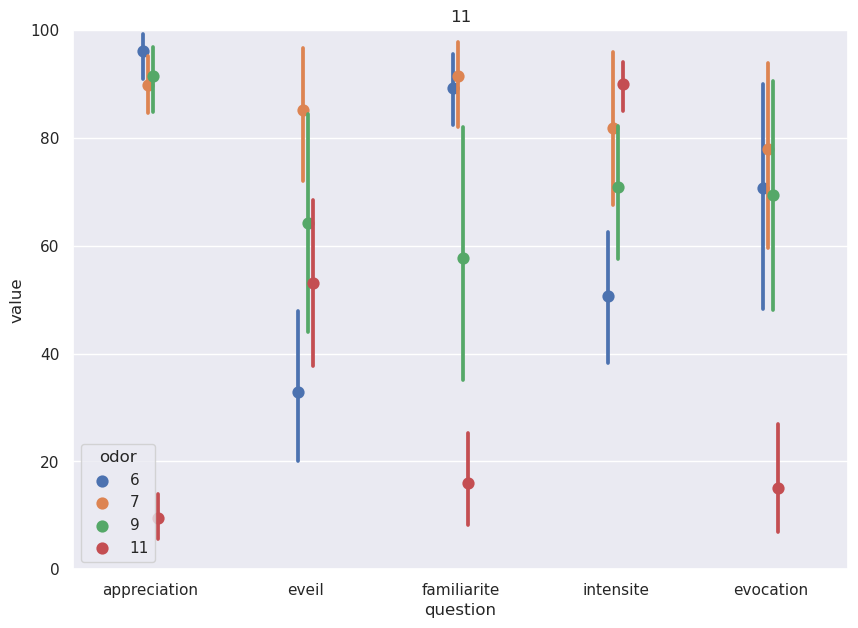

In [ ]:
odor_sel = [6, 7, 9, 11]
df_plot = df_odor_profile_filtered.query(f"odor in {odor_sel}")
sns.pointplot(data=df_plot, x="question", y="value", hue="odor", errorbar='sd', linestyles='none', dodge=True).set(title=odor)
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

In [ ]:
df_odor_profile_filtered_p

sujet      question  odor  raw_val  scale       value
5    PD01  appreciation     6     14.6   15.0   97.333333
8    PD01         eveil     6      9.9   15.0   66.000000
17   PD01   familiarite     6     14.2   15.0   94.666667
18   PD01     intensite     6      7.1   15.0   47.333333
29   PD01     evocation     6     14.1   15.0   94.000000
..    ...           ...   ...      ...    ...         ...
965  MA33  appreciation     6     12.5   12.5  100.000000
967  MA33         eveil     6      1.5   12.5   12.000000
976  MA33   familiarite     6     12.5   12.5  100.000000
978  MA33     intensite     6      5.4   12.5   43.200000
986  MA33     evocation     6     10.2   12.5   81.600000

[165 rows x 6 columns]

<AxesSubplot:xlabel='value', ylabel='Count'>

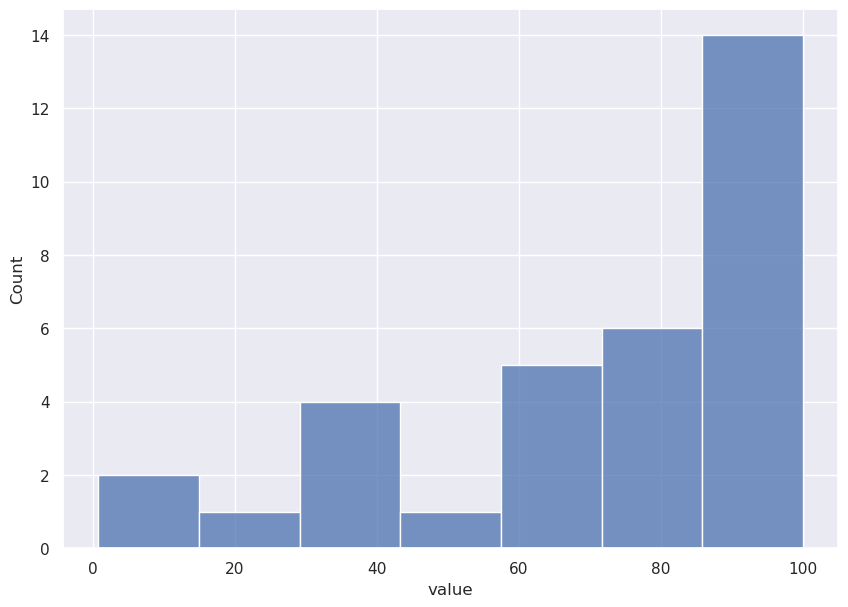

In [ ]:
df_plot = df_odor_profile_filtered_p.query(f"question == 'evocation'")
sns.histplot(data=df_plot, x="value")

In [ ]:
sujet_sel_evoc = df_odor_profile_filtered_p.query(f"question == 'evocation' & value >= 60")['sujet'].unique()

# mdp analysis

(0.0, 10.0)

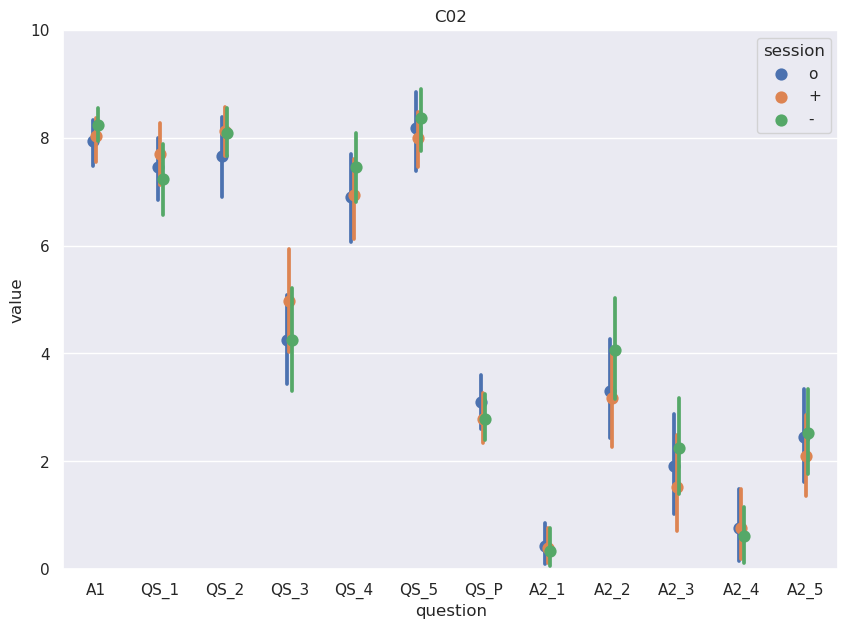

In [ ]:
df_plot = df_mdp[df_mdp['cond'] == 'CO2']
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

(0.0, 10.0)

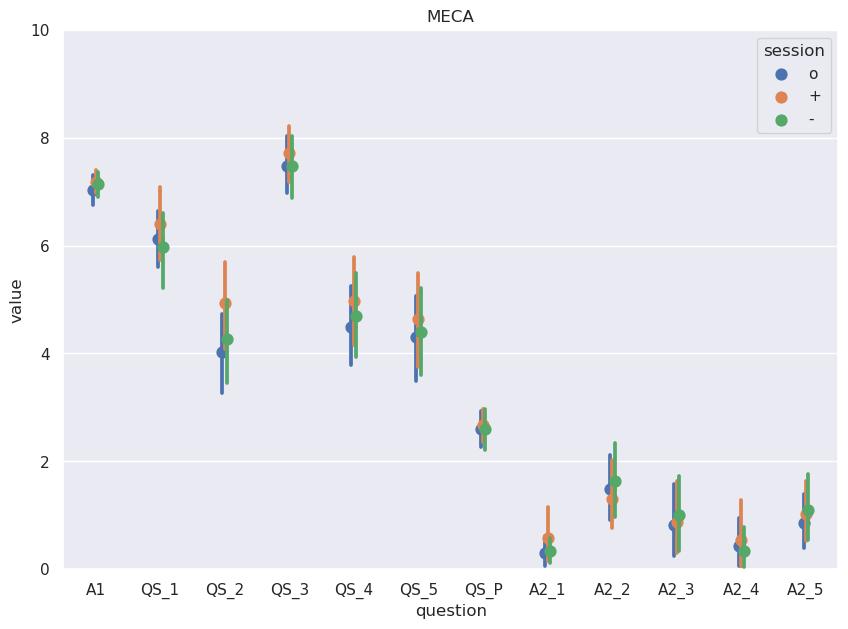

In [ ]:
df_plot = df_mdp[df_mdp['cond'] == 'MECA']
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

In [ ]:
val = np.zeros((df_mdp['sujet'].unique().shape[0]*df_mdp['session'].unique().shape[0]*df_mdp['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_mdp['sujet'].unique()):
    for session_i, session in enumerate(df_mdp['session'].unique()):
        for cond_i, cond in enumerate(df_mdp['cond'].unique()):
            df_i = df_mdp.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_A2 = df_i[df_i['question'].isin(['A2_1', 'A2_2', 'A2_3', 'A2_4', 'A2_5'])]['value'].sum()
            val[i, :] = np.array([sujet, session, cond, val_A2])
            i += 1

In [ ]:
df_A2 = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'value'])
df_A2['value'] = df_A2['value'].astype(np.float64) 
df_A2

sujet session  cond  value
0    PD01       o  MECA   26.0
1    PD01       o   CO2   34.0
2    PD01       +  MECA   40.0
3    PD01       +   CO2   32.0
4    PD01       -  MECA   27.0
..    ...     ...   ...    ...
193  MA33       o   CO2   21.0
194  MA33       +  MECA    2.0
195  MA33       +   CO2    7.0
196  MA33       -  MECA    1.0
197  MA33       -   CO2   11.0

[198 rows x 4 columns]

(0.0, 50.0)

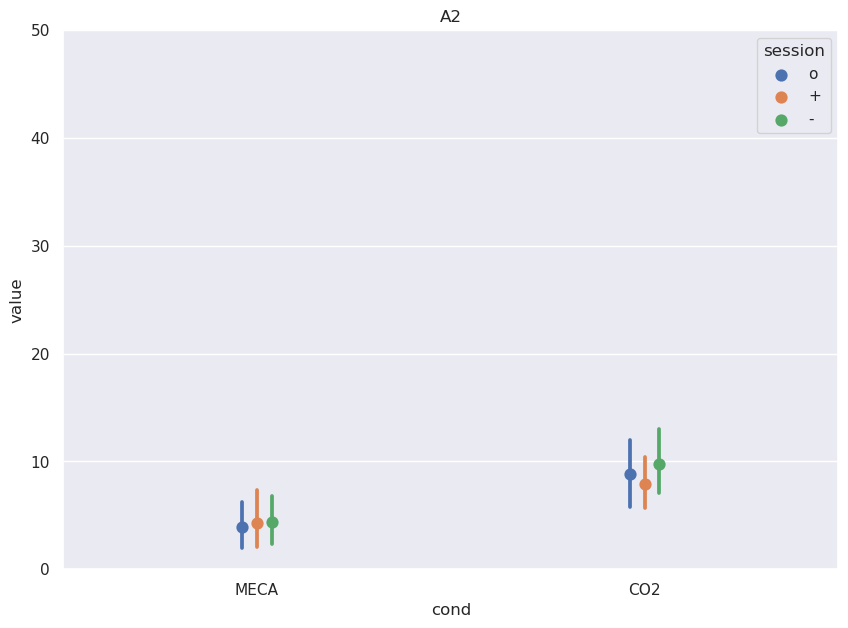

In [ ]:
df_plot = df_A2[df_A2['cond'] == 'CO2']
sns.pointplot(data=df_A2, x="cond", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='A2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 50)

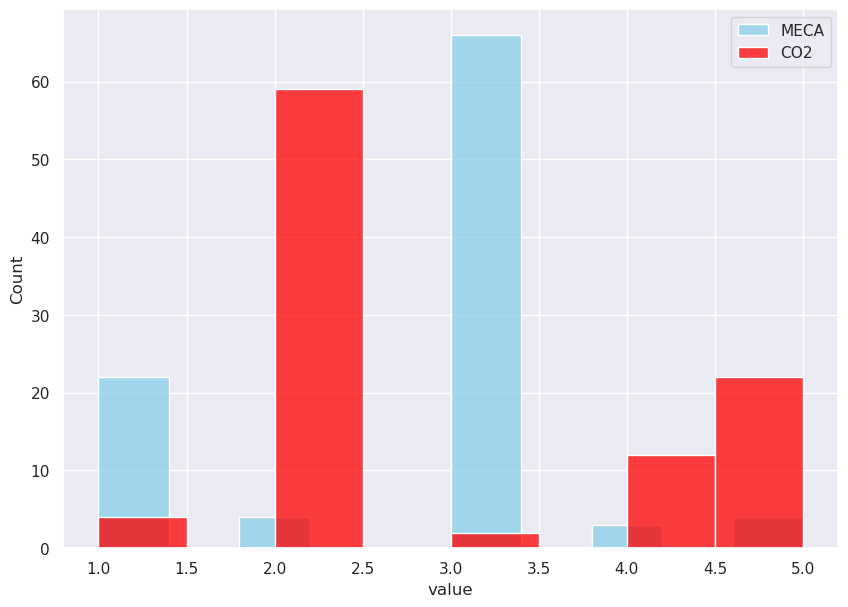

In [ ]:
df_plot = df_mdp[(df_mdp['cond'] == 'MECA').values & (df_mdp['question'] == 'QS_P').values]
sns.histplot(data=df_plot, x="value", label='MECA', color="skyblue")
df_plot = df_mdp[(df_mdp['cond'] == 'CO2').values & (df_mdp['question'] == 'QS_P').values]
sns.histplot(data=df_plot, x="value", label='CO2', color="red")

plt.legend()


# Questionnaire Analysis

In [ ]:
df_q

sujet session    cond  question raw_val  scale        val
0     PD01       o  FR_CV1         1     6.9   15.9  43.396226
1     PD01       o  FR_CV1         2     9.8   15.9  61.635220
2     PD01       o  FR_CV1         3     9.3   15.9  58.490566
3     PD01       o  FR_CV1         4     6.2   15.9  38.993711
4     PD01       o  FR_CV1         5     7.9   15.9  49.685535
...    ...     ...     ...       ...     ...    ...        ...
3163  MA33       -  FR_CV2         4     7.5   15.6  48.076923
3164  MA33       -  FR_CV2         5       0   15.6   0.000000
3165  MA33       -  FR_CV2         6     2.7   15.6  17.307692
3166  MA33       -  FR_CV2         7     7.2   15.6  46.153846
3167  MA33       -  FR_CV2         8      11   15.6  70.512821

[3168 rows x 7 columns]

(0.0, 100.0)

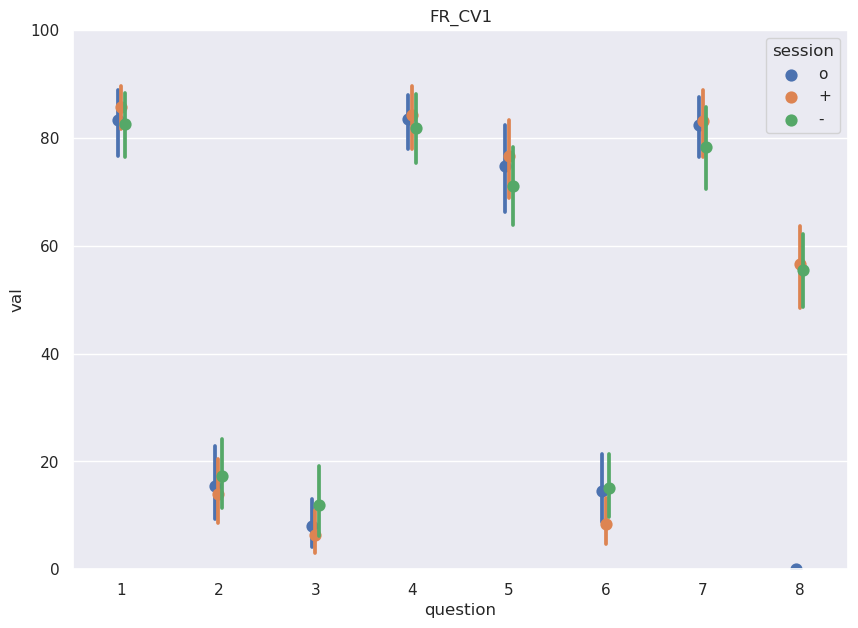

In [ ]:
df_plot = df_q[df_q['cond'] == 'FR_CV1']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='FR_CV1')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

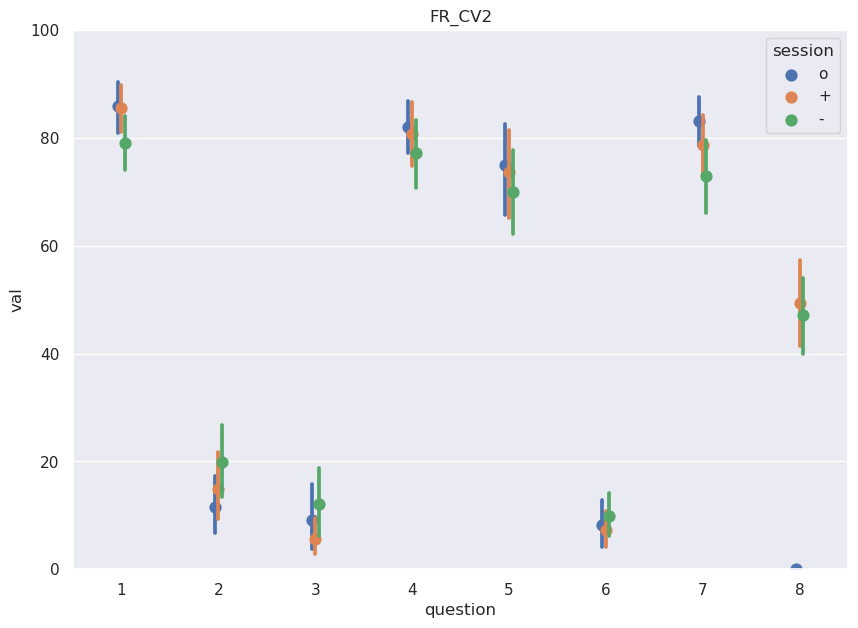

In [ ]:
df_plot = df_q[df_q['cond'] == 'FR_CV2']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='FR_CV2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

In [ ]:
df_q[df_q['cond'] == 'MECA']['val'].max()

100.0

(0.0, 100.0)

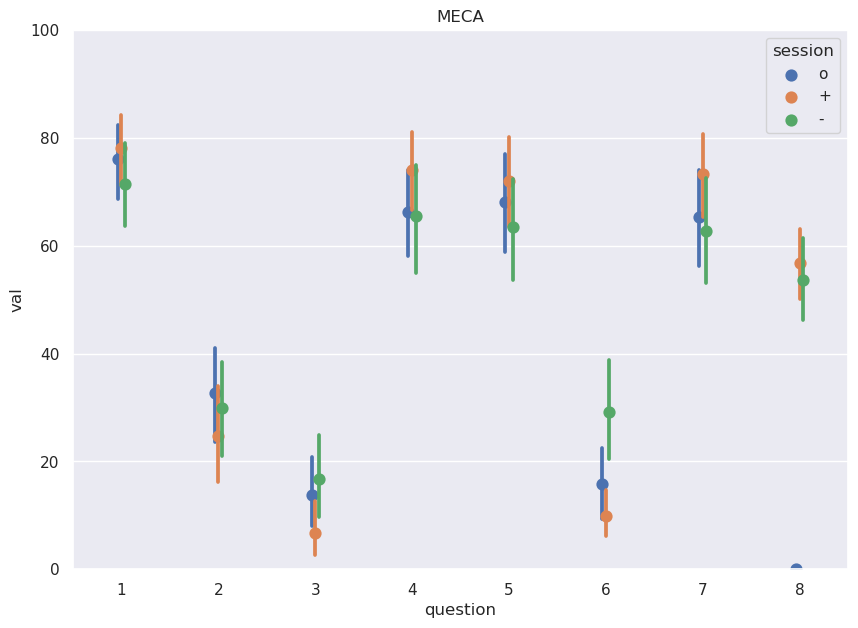

In [ ]:
df_plot = df_q[df_q['cond'] == 'MECA']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

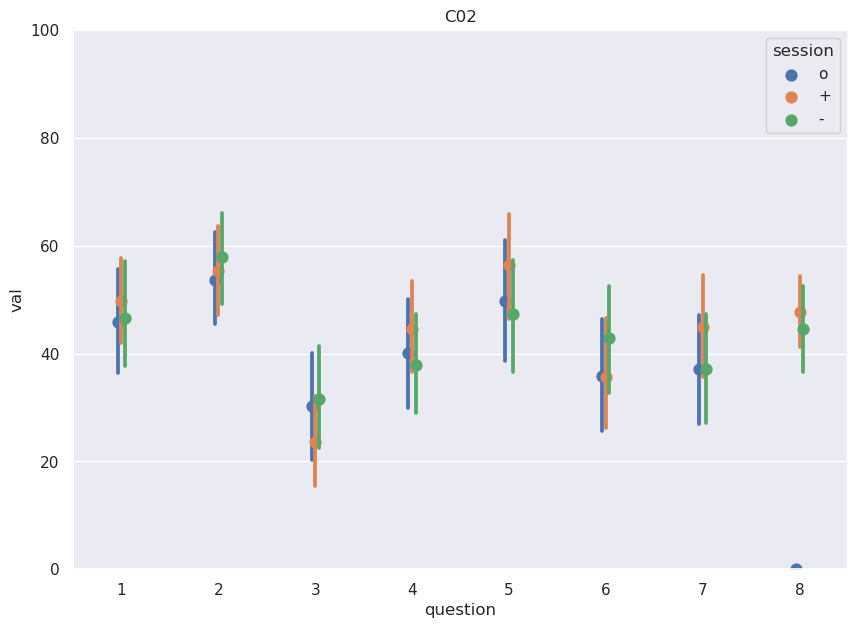

In [ ]:
df_plot = df_q[df_q['cond'] == 'CO2']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

In [ ]:
df_q

sujet session    cond  question raw_val  scale        val
0     PD01       o  FR_CV1         1     6.9   15.9  43.396226
1     PD01       o  FR_CV1         2     9.8   15.9  61.635220
2     PD01       o  FR_CV1         3     9.3   15.9  58.490566
3     PD01       o  FR_CV1         4     6.2   15.9  38.993711
4     PD01       o  FR_CV1         5     7.9   15.9  49.685535
...    ...     ...     ...       ...     ...    ...        ...
3163  MA33       -  FR_CV2         4     7.5   15.6  48.076923
3164  MA33       -  FR_CV2         5       0   15.6   0.000000
3165  MA33       -  FR_CV2         6     2.7   15.6  17.307692
3166  MA33       -  FR_CV2         7     7.2   15.6  46.153846
3167  MA33       -  FR_CV2         8      11   15.6  70.512821

[3168 rows x 7 columns]

In [ ]:
val = np.zeros((df_q['sujet'].unique().shape[0]*df_q['session'].unique().shape[0]*df_q['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_q['sujet'].unique()):
    for session_i, session in enumerate(df_q['session'].unique()):
        for cond_i, cond in enumerate(df_q['cond'].unique()):
            df_i = df_q.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_p = 300 - df_i[df_i['question'].isin([1, 4, 5])]['val'].sum()
            val_n = df_i[df_i['question'].isin([2, 3, 6])]['val'].sum()
            val_stai = ((val_n + val_p)/600)*100
            val[i, :] = np.array([sujet, session, cond, val_stai])
            i += 1



In [ ]:
df_stai = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'val'])
df_stai['val'] = df_stai['val'].astype(np.float64) 
df_stai

sujet session    cond        val
0    PD01       o  FR_CV1  55.765199
1    PD01       o    MECA  69.287212
2    PD01       o     CO2  77.044025
3    PD01       o  FR_CV2  45.702306
4    PD01       +  FR_CV1  44.055202
..    ...     ...     ...        ...
391  MA33       +  FR_CV2  17.634409
392  MA33       -  FR_CV1   8.279570
393  MA33       -    MECA  66.774194
394  MA33       -     CO2  63.247863
395  MA33       -  FR_CV2  42.094017

[396 rows x 4 columns]

(0.0, 100.0)

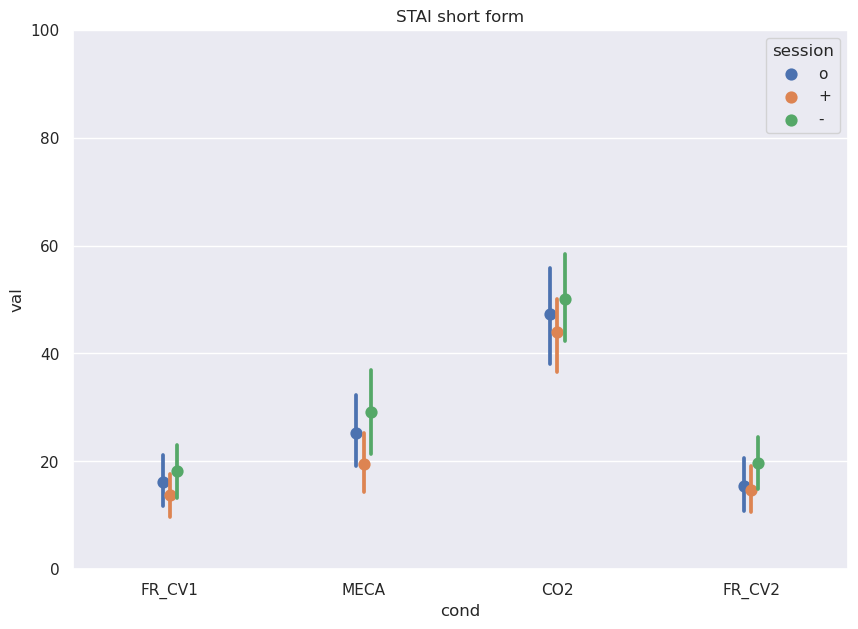

In [ ]:
df_plot = df_stai[df_stai['cond'] == 'FR_CV1']
sns.pointplot(data=df_stai, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='STAI short form')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

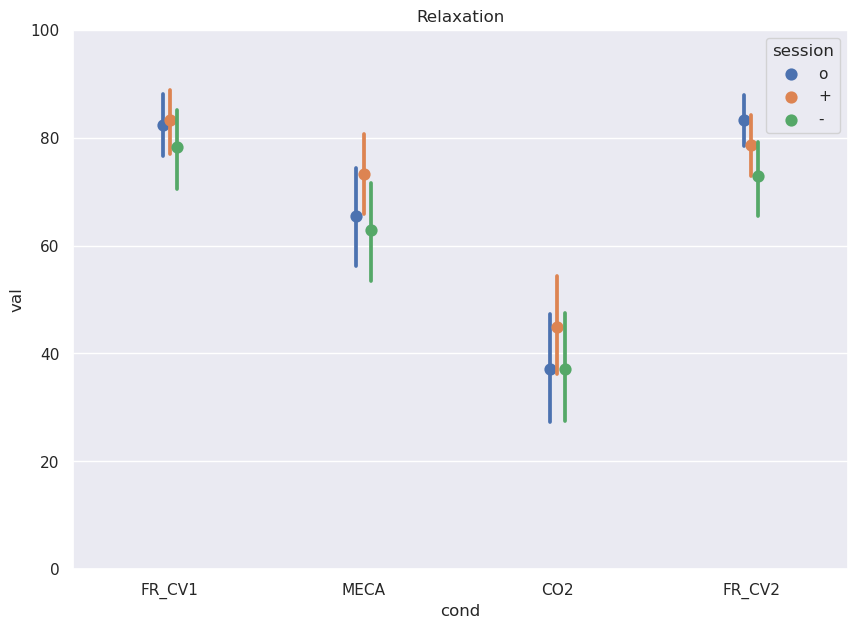

In [ ]:
df_plot = df_q.query("question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

# MAIA Analysis

In [113]:
df_MAIA

sujet                aspect     value rep
0    AR30              Noticing  4.750000   -
1    AR30       Not_Distracting  3.333333   -
2    AR30          Not_Worrying  1.666667   -
3    AR30  Attention_Regulation  5.000000   -
4    AR30   Emotional_Awareness  2.600000   -
..    ...                   ...       ...  ..
243  ZV21  Attention_Regulation  4.000000   +
244  ZV21   Emotional_Awareness  3.000000   +
245  ZV21       Self_Regulation  2.750000   +
246  ZV21        Body_Listening  2.666667   +
247  ZV21              Trusting  4.333333   +

[248 rows x 4 columns]

In [115]:
dict_regression_MAIA = {'sujet' : [], 'diff' : [], 'aspect' : [], 'value' : [], 'rep' : []}

for sujet in sujet_list:
    if sujet in ['DF25', 'HJ31']:
        continue
    for aspect in MAIA_aspects_list:
        dict_regression_MAIA['sujet'].append(sujet)
        _diff = (df_A2.query(f"cond == 'CO2' and session == 'o' and sujet == '{sujet}'")['value'].values - df_A2.query(f"cond == 'CO2' and session == '+' and sujet == '{sujet}'")['value'].values)[0]
        dict_regression_MAIA['diff'].append(_diff)
        dict_regression_MAIA['aspect'].append(aspect)
        dict_regression_MAIA['value'].append(df_MAIA.query(f"aspect == '{aspect}' and sujet == '{sujet}'")['value'].values[0])
        
        if sujet in sujet_best_list:
            dict_regression_MAIA['rep'].append('+')
        else:
            dict_regression_MAIA['rep'].append('-')
            
df_reg_MAIA = pd.DataFrame(dict_regression_MAIA)
df_reg_MAIA

sujet  diff                aspect     value rep
0    AR30  -1.6              Noticing  4.750000   -
1    AR30  -1.6       Not_Distracting  3.333333   -
2    AR30  -1.6          Not_Worrying  1.666667   -
3    AR30  -1.6  Attention_Regulation  5.000000   -
4    AR30  -1.6   Emotional_Awareness  2.600000   -
..    ...   ...                   ...       ...  ..
243  ZV21   2.0  Attention_Regulation  4.000000   +
244  ZV21   2.0   Emotional_Awareness  3.000000   +
245  ZV21   2.0       Self_Regulation  2.750000   +
246  ZV21   2.0        Body_Listening  2.666667   +
247  ZV21   2.0              Trusting  4.333333   +

[248 rows x 5 columns]

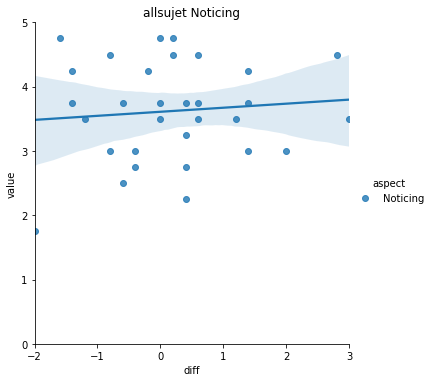

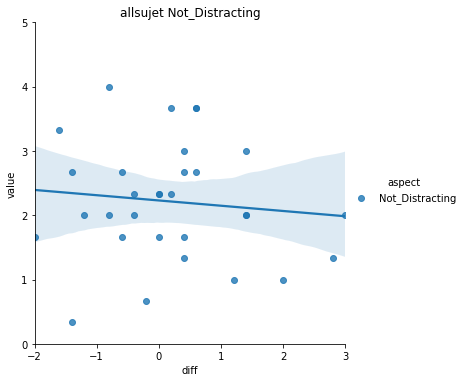

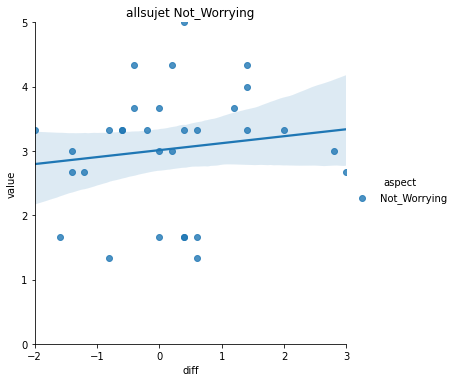

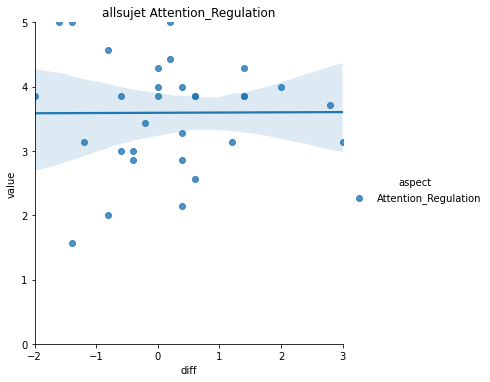

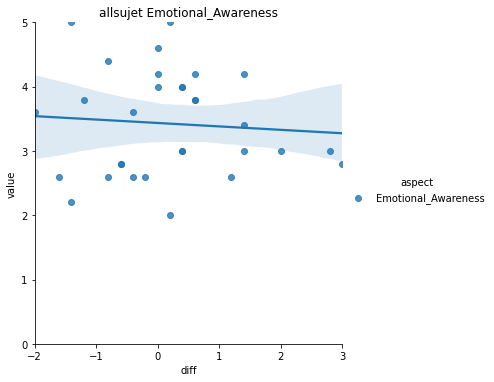

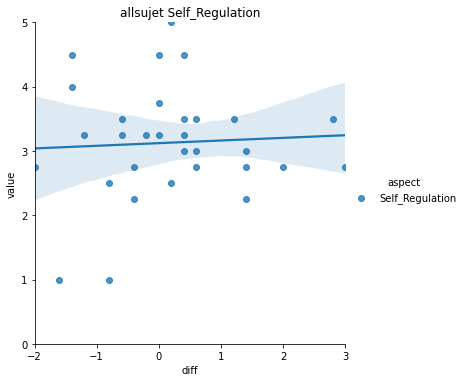

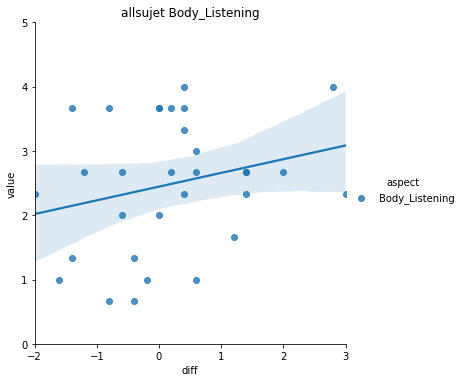

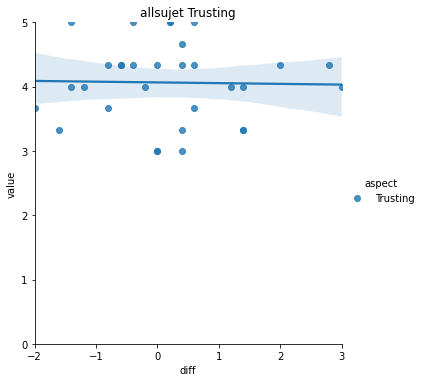

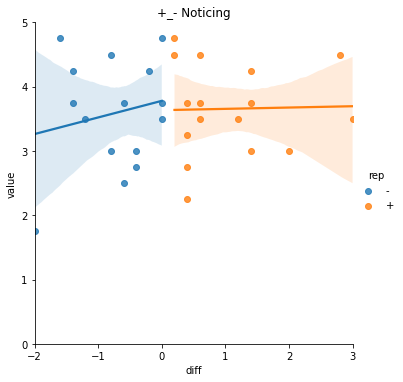

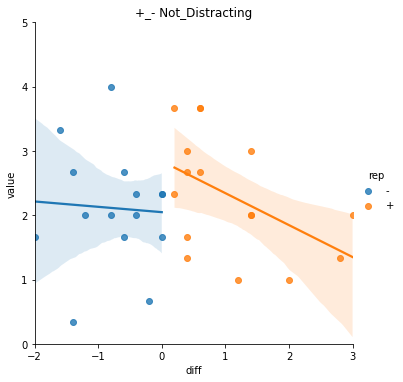

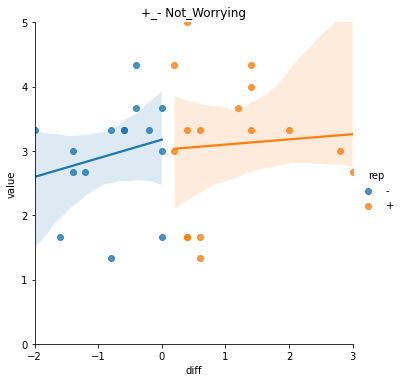

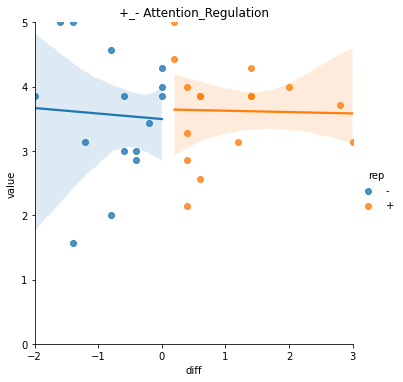

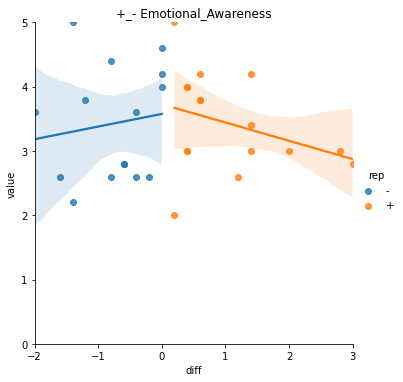

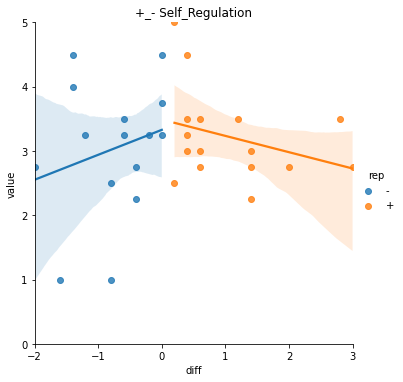

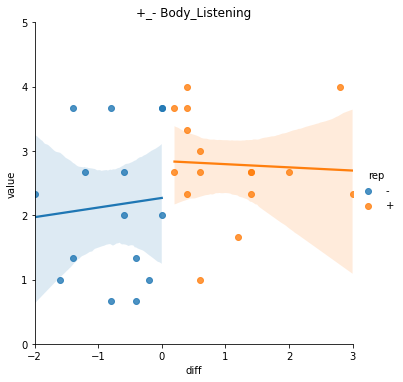

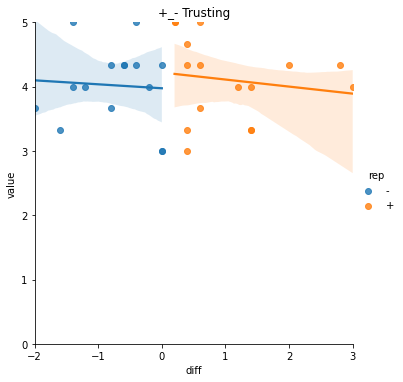

In [108]:
for group_sel in ['allsujet', '+_-']:
    for aspect in MAIA_aspects_list:
        df_plot = df_reg_MAIA.query(f"aspect == '{aspect}'")
        if group_sel == 'allsujet':
            sns.lmplot(data=df_plot, x="diff", y="value", hue='aspect') 
        if group_sel == '+_-':
            sns.lmplot(data=df_plot, x="diff", y="value", hue='rep') 
        plt.title(f"{group_sel} {aspect}")
        plt.ylim(0,5)

In [136]:
df_MAIA_stats_balanced = df_MAIA.query(f"sujet != 'BD12'")
print(df_MAIA_stats_balanced.query("rep == '+'").shape)
print(df_MAIA_stats_balanced.query("rep == '-'").shape)

(120, 4)
(120, 4)


<AxesSubplot: xlabel='aspect', ylabel='value'>

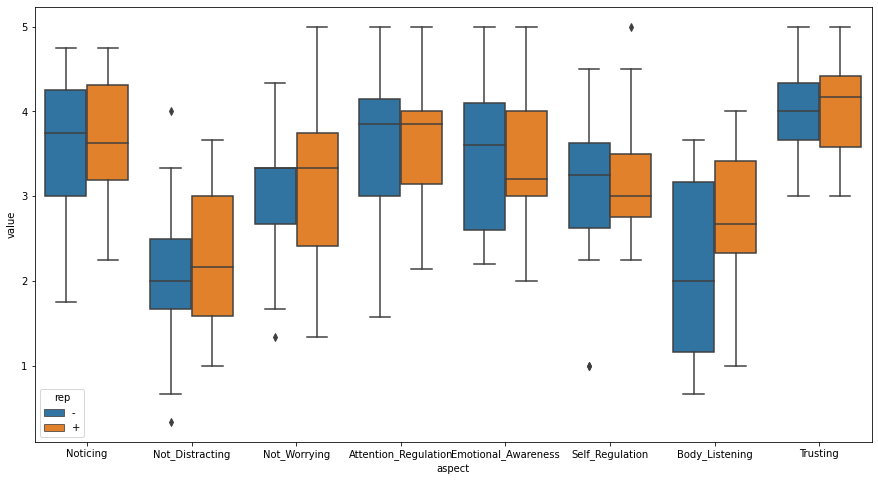

In [138]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_MAIA, x='aspect', y='value', hue='rep')

Noticing
Not_Distracting
Not_Worrying
Attention_Regulation
Emotional_Awareness
Self_Regulation
Body_Listening
Trusting


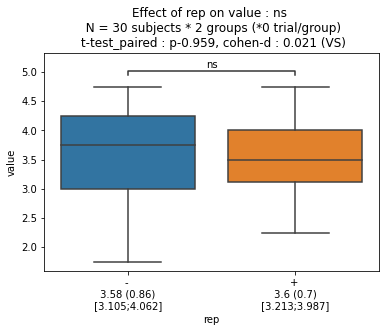

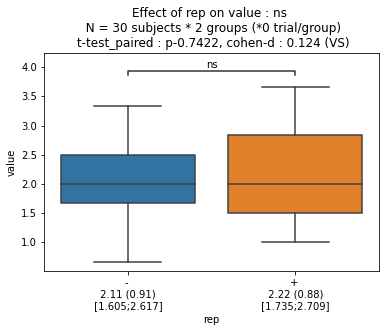

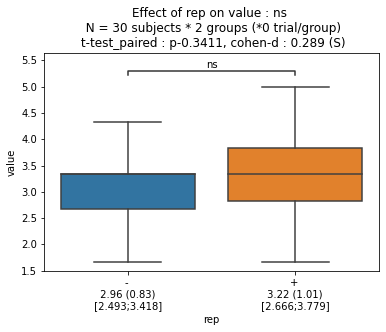

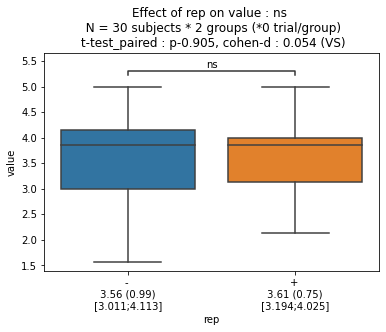

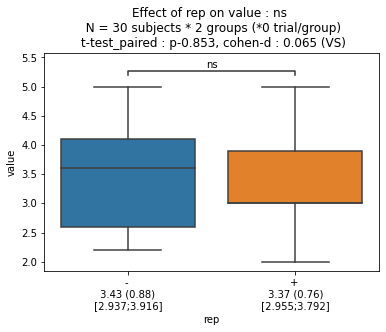

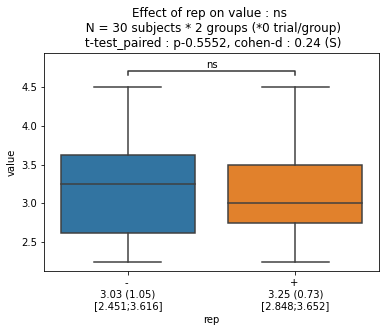

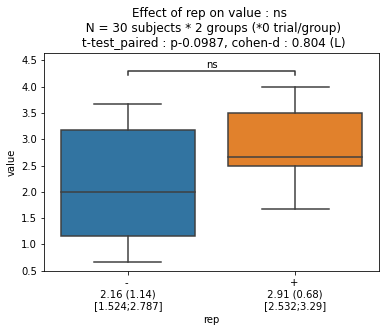

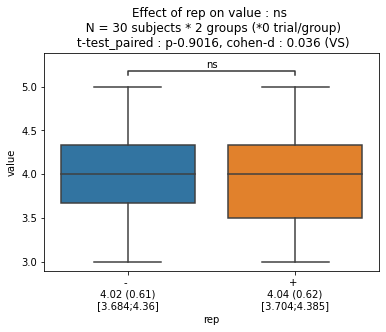

In [137]:
predictor = 'rep' 
outcome = 'value'

for aspect in MAIA_aspects_list:

    print(aspect)

    fig, ax = plt.subplots()
    
    df_stats = df_MAIA_stats_balanced.query(f"aspect == '{aspect}'")
    ax = auto_stats(df_stats, predictor, outcome, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)

# Filter with intensity

<AxesSubplot:xlabel='val', ylabel='Count'>

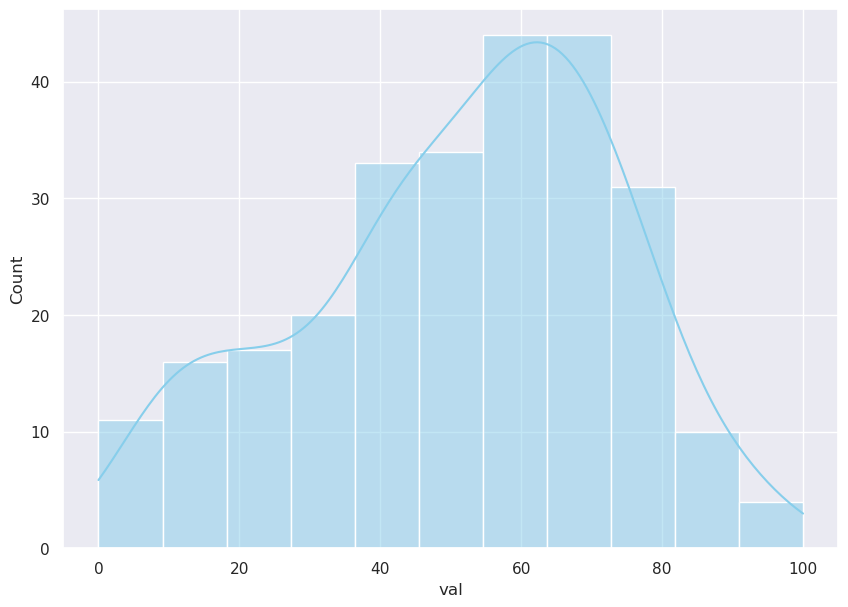

In [ ]:
df_plot = df_q.query("question == 8 & session in ['+', '-']")
sns.histplot(data=df_plot, x="val", label='MECA', color="skyblue", kde=True)

In [ ]:
seuil_odor_p = 30
seuil_odor_n = 50

sujet_p = []
for sujet in df_q['sujet'].unique():
    if (df_q.query(f"sujet == '{sujet}' & question == 8 & session in ['+', '-'] & cond in ['MECA', 'CO2']")['val'].values >= seuil_odor_p).all():
        sujet_p.append(sujet)

sujet_p = np.array(sujet_p)
print(sujet_p)

sujet_n = []
for sujet in df_q['sujet'].unique():
    if (df_q.query(f"sujet == '{sujet}' & question == 8 & session in ['+', '-'] & cond in ['MECA', 'CO2']")['val'].values < seuil_odor_n).all():
        sujet_n.append(sujet)

sujet_n = np.array(sujet_n)
print(sujet_n)

 

['PD01' 'GB04' 'TA09' 'BH10' 'MD14' 'LG15' 'GM16' 'TM19' 'DI22' 'TJ24'
 'DF25' 'MN26' 'BD27' 'NT28' 'AR30' 'MA33']
['MJ02' 'LV05' 'FA11' 'ZV21' 'LF23']


## MDP

(0.0, 10.0)

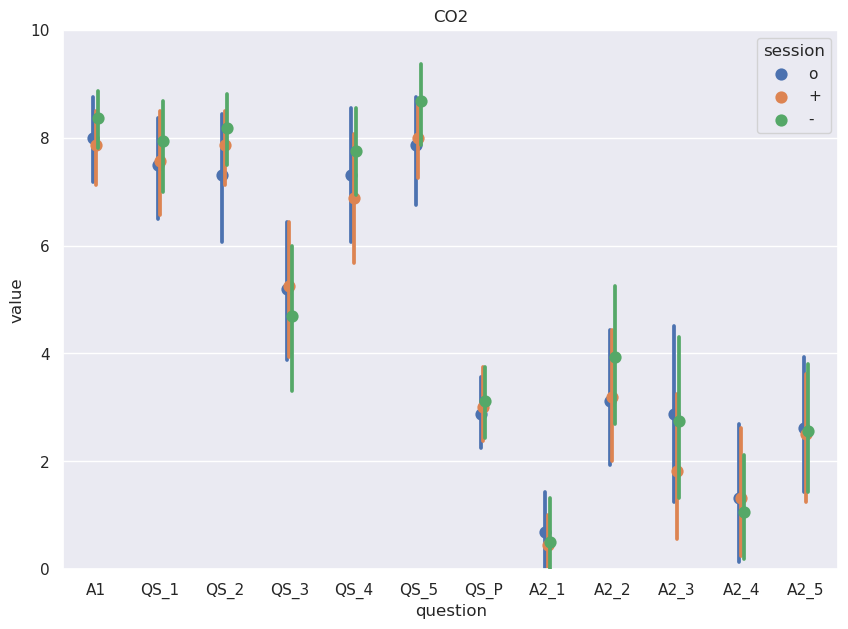

In [ ]:
df_plot = df_mdp.query(f"sujet in {sujet_p.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

(0.0, 10.0)

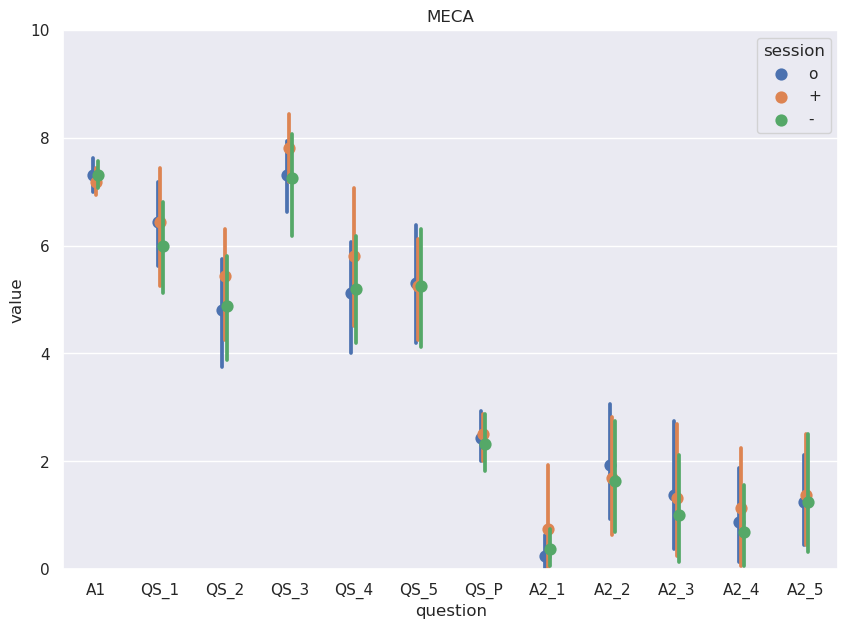

In [ ]:
df_plot = df_mdp.query(f"sujet in {sujet_p.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

## Questionnaire

(0.0, 100.0)

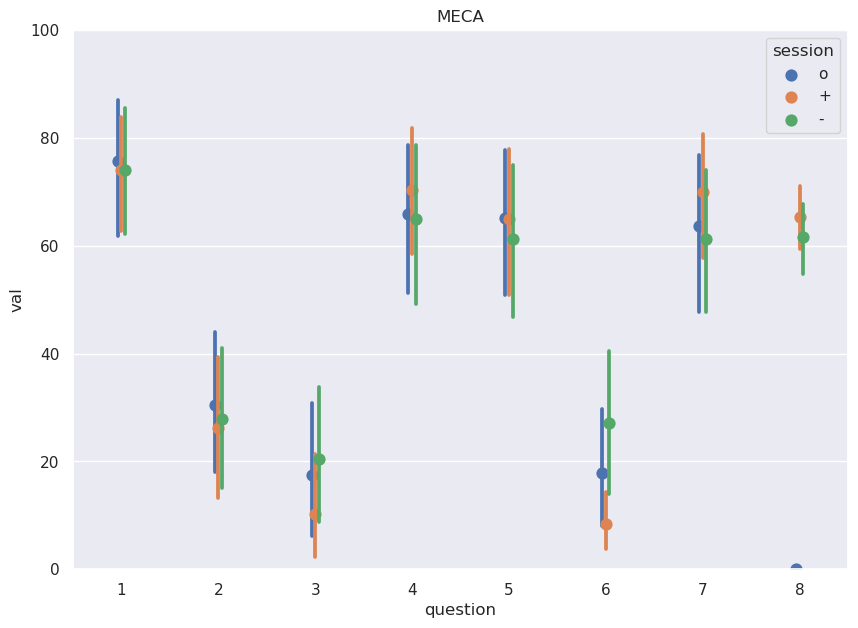

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_p.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

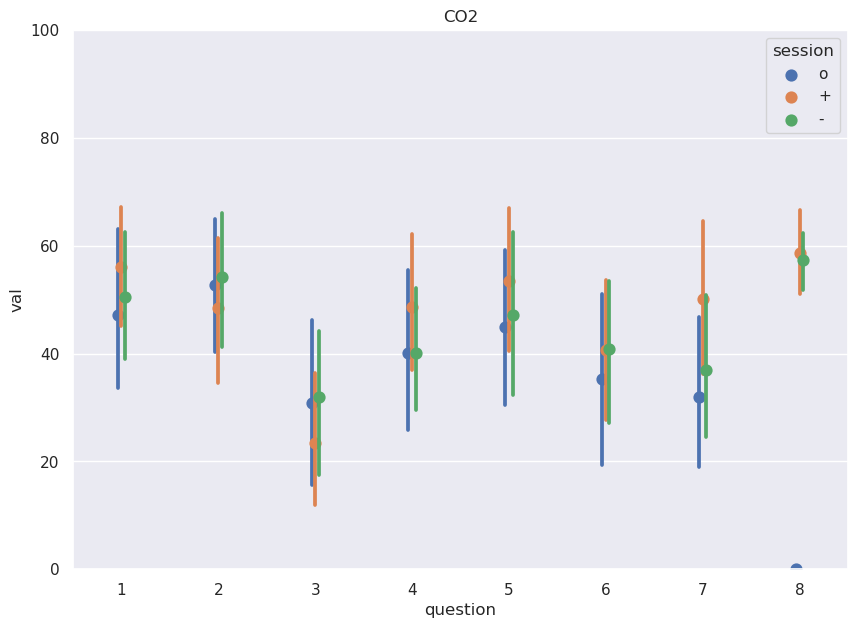

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_p.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

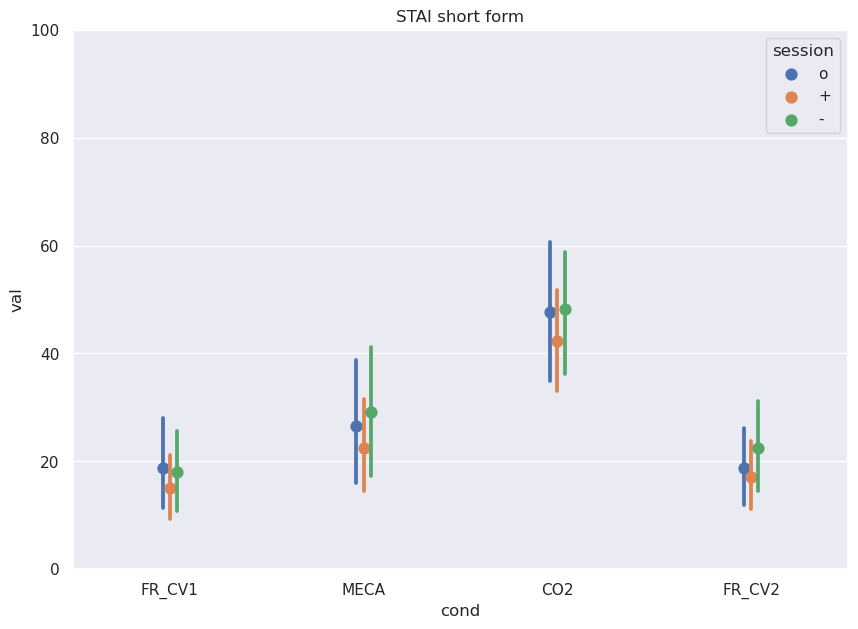

In [ ]:
df_plot = df_stai.query(f"sujet in {sujet_p.tolist()}")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='STAI short form')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

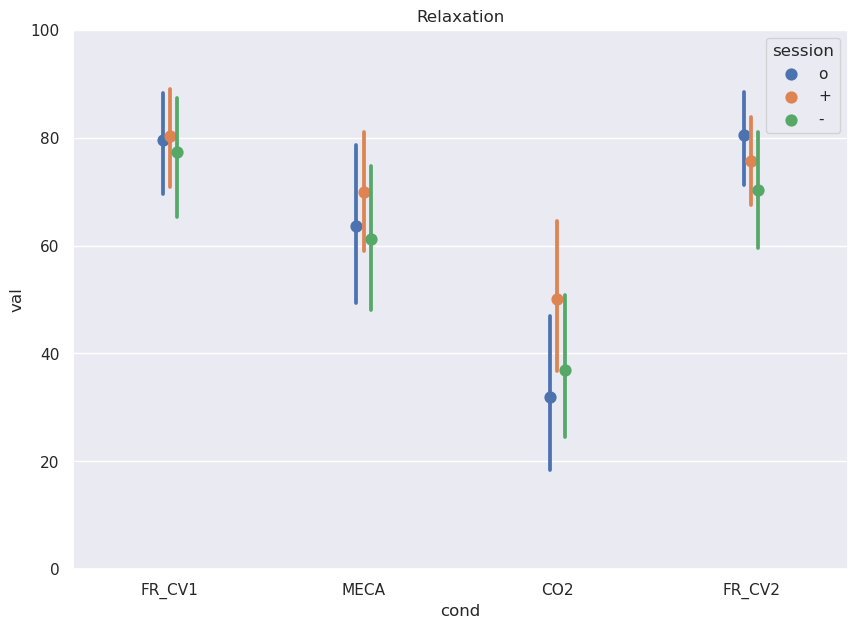

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_p.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

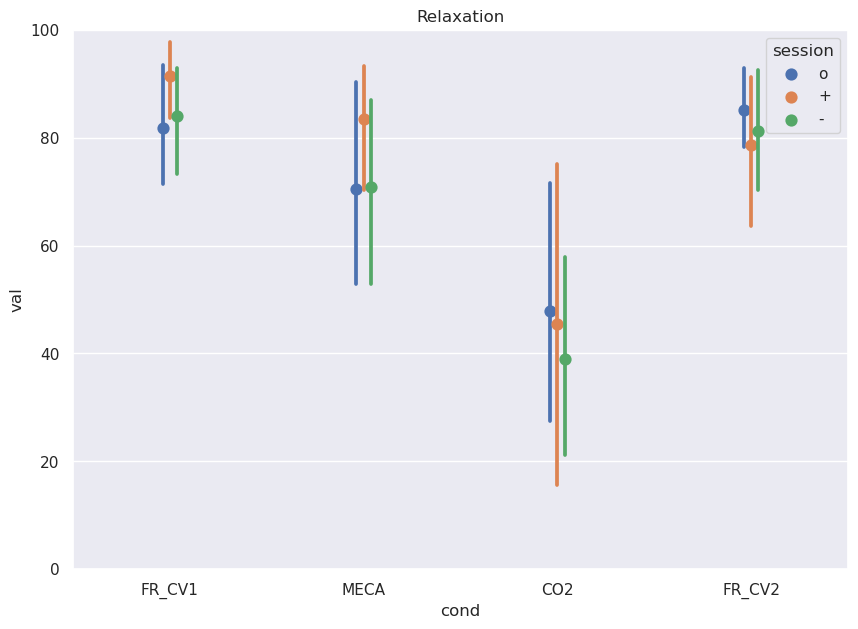

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_n.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

## MDP

(0.0, 10.0)

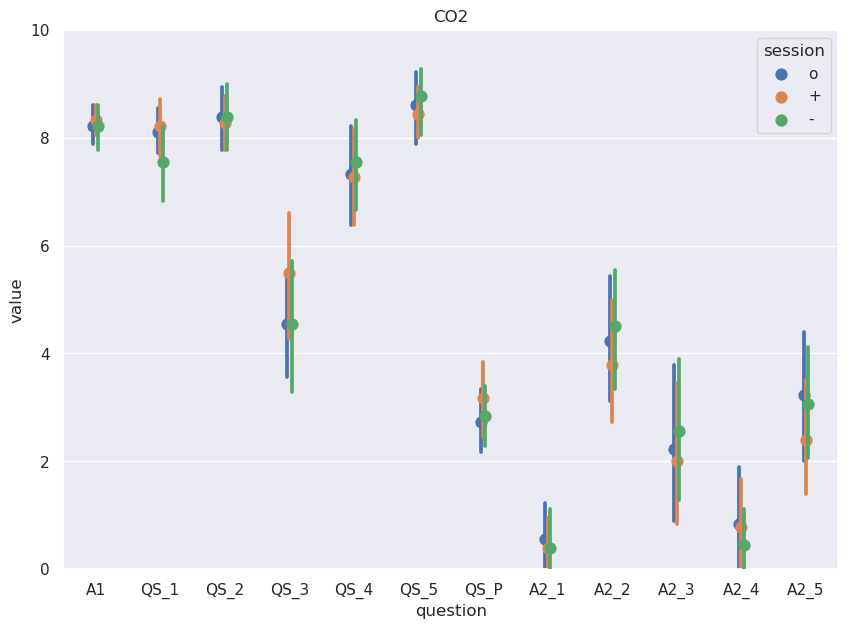

In [329]:
df_plot = df_mdp.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

(0.0, 10.0)

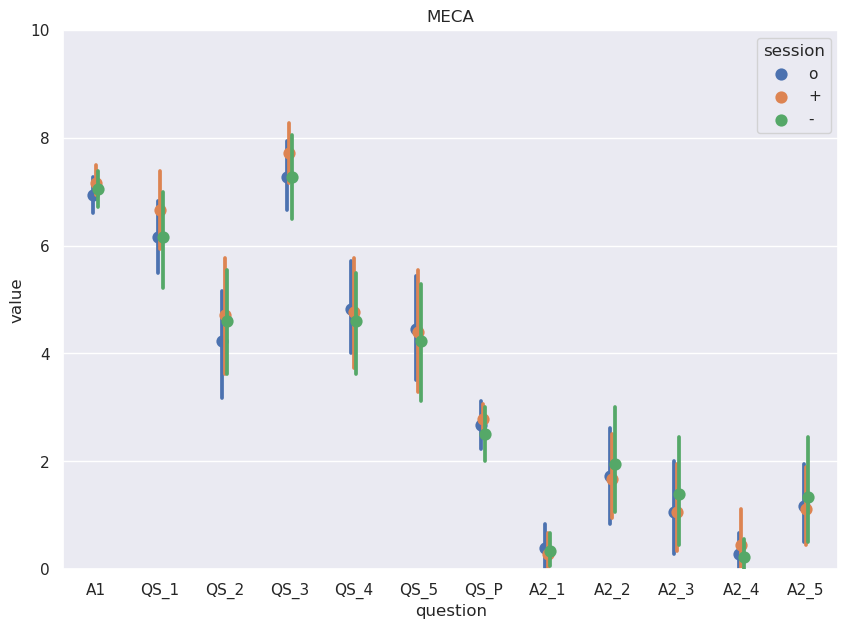

In [330]:
df_plot = df_mdp.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

## Questionnaire

(0.0, 100.0)

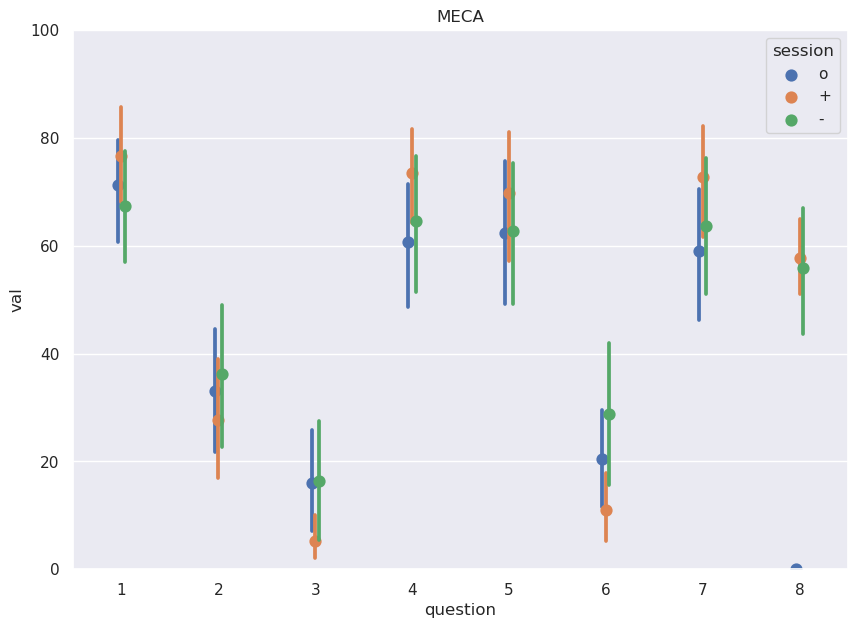

In [331]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

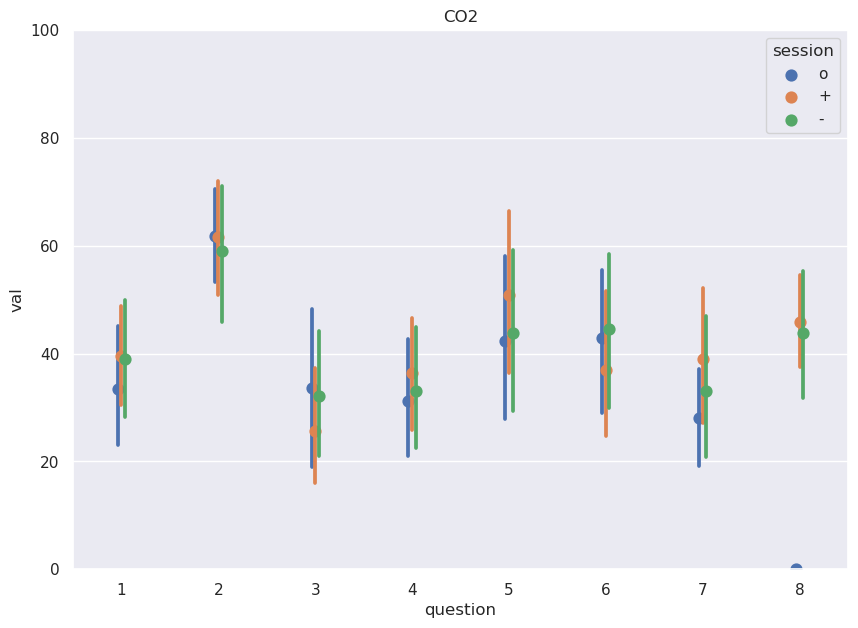

In [332]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

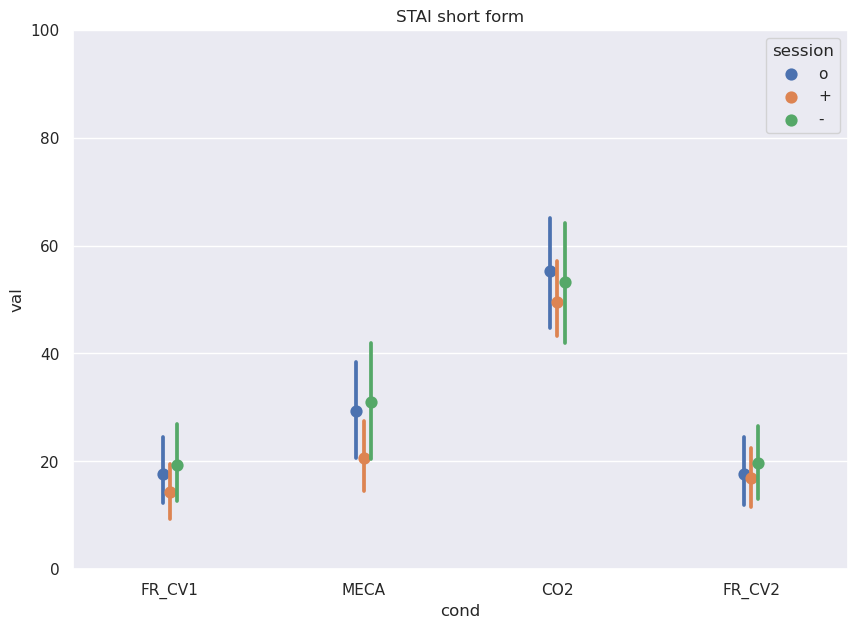

In [333]:
df_plot = df_stai.query(f"sujet in {sujet_sel_best.tolist()}")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='STAI short form')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

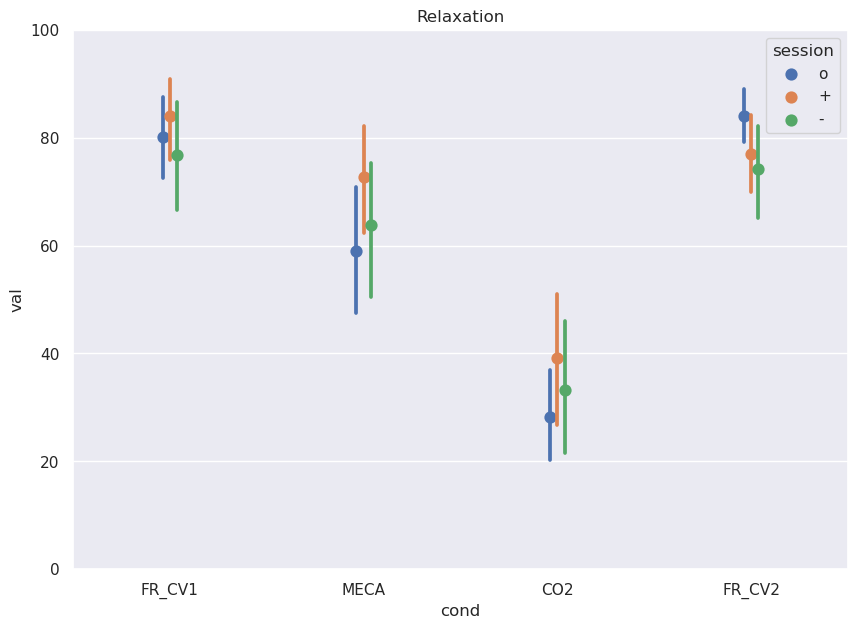

In [334]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

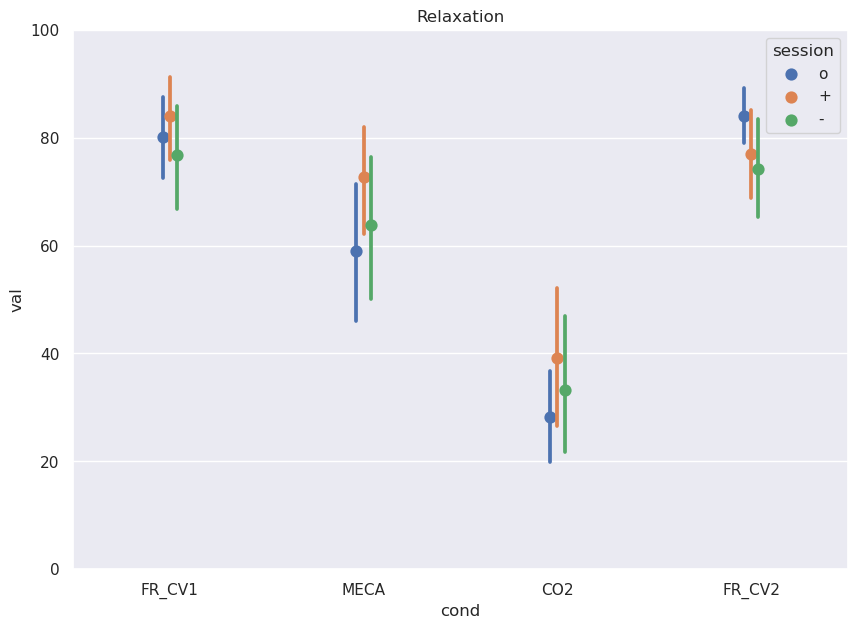

In [335]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

# Correlation Intensity Relaxation 

In [5]:
df_ri = df_q.query("question == 7 & cond in ['MECA', 'CO2'] & session in ['+', '-']")
df_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values
df_ri

<ipython-input-5-5bf1a66d68de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values


sujet session  cond  question raw_val  scale        val  intensity
46    PD01       +  MECA         7     4.7   15.7  29.936306  68.152866
54    PD01       +   CO2         7       2   15.7  12.738854  53.503185
78    PD01       -  MECA         7     5.5   15.7  35.031847  82.165605
86    PD01       -   CO2         7       3   15.7  19.108280  72.611465
142   MJ02       +  MECA         7      14   15.7  89.171975   9.554140
...    ...     ...   ...       ...     ...    ...        ...        ...
3062  CM32       -   CO2         7     0.1   15.6   0.641026  20.512821
3118  MA33       +  MECA         7    13.7   15.3  89.542484  81.699346
3126  MA33       +   CO2         7    13.8   15.5  89.032258  38.064516
3150  MA33       -  MECA         7       5   15.5  32.258065  70.967742
3158  MA33       -   CO2         7     3.6   15.6  23.076923  62.820513

[132 rows x 8 columns]

[Text(0.5, 1.0, 'MECA relaxation')]

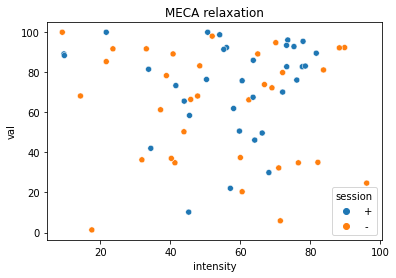

In [6]:
df_plot = df_ri.query("cond == 'MECA'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='MECA relaxation')


[Text(0.5, 1.0, 'CO2 relaxation')]

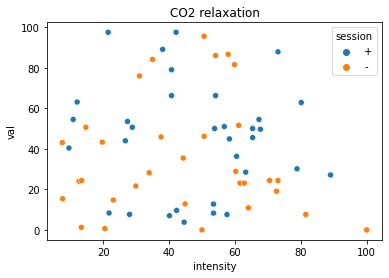

In [7]:
df_plot = df_ri.query("cond == 'CO2'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='CO2 relaxation')

In [13]:
df_stats = df_ri.query("cond == 'CO2'")
Y = df_stats['val'].values.reshape(-1,1)
X = df_stats['intensity'].values.reshape(-1,1)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X.reshape(-1), Y.reshape(-1))
slope, intercept, r_value, p_value, std_err

(-0.03783857177046906,
 42.81262916502453,
 -0.029230121587910097,
 0.8157775634047246,
 0.16174412568068897)

In [12]:
df_stats = df_ri.query("cond == 'MECA'")
Y = df_stats['val'].values.reshape(-1,1)
X = df_stats['intensity'].values.reshape(-1,1)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X.reshape(-1), Y.reshape(-1))
slope, intercept, r_value, p_value, std_err

(-0.04300311425825228,
 70.46147336549664,
 -0.03435159138953374,
 0.7842211893425386,
 0.1563891675336002)

In [339]:
df_stai_ri = df_stai.query("cond in ['MECA', 'CO2'] & session in ['+', '-']")

In [340]:
df_stai_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values
df_stai_ri

/tmp/ipykernel_1121102/2127589661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stai_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values


sujet session  cond        val  intensity
5    PD01       +  MECA  71.337580  68.152866
6    PD01       +   CO2  78.025478  53.503185
9    PD01       -  MECA  67.834395  82.165605
10   PD01       -   CO2  74.628450  72.611465
17   MJ02       +  MECA  12.101911   9.554140
..    ...     ...   ...        ...        ...
382  CM32       -   CO2  85.897436  20.512821
389  MA33       +  MECA  19.063181  81.699346
390  MA33       +   CO2  34.623656  38.064516
393  MA33       -  MECA  66.774194  70.967742
394  MA33       -   CO2  63.247863  62.820513

[132 rows x 5 columns]

[Text(0.5, 1.0, 'MECA STAI')]

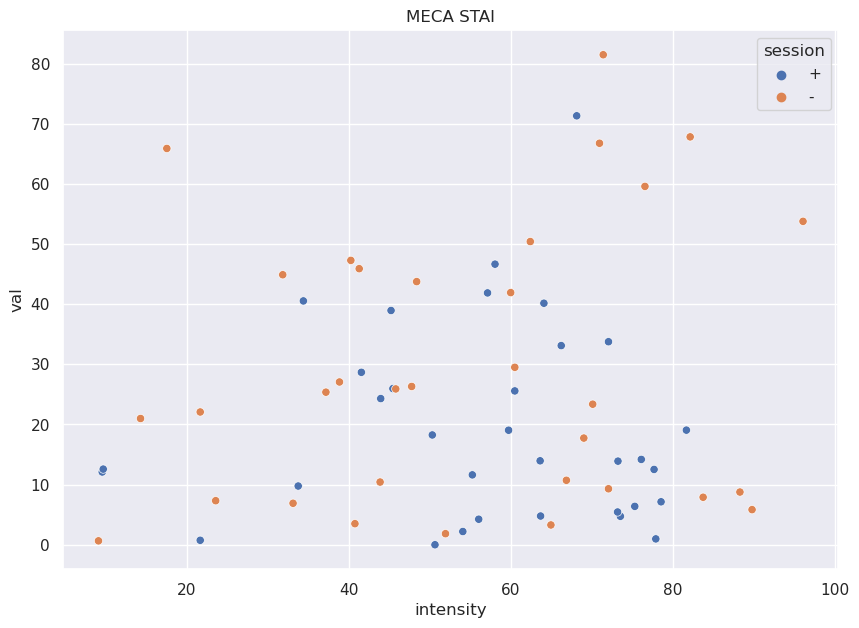

In [341]:
df_plot = df_stai_ri.query("cond == 'MECA'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='MECA STAI')


[Text(0.5, 1.0, 'CO2 STAI')]

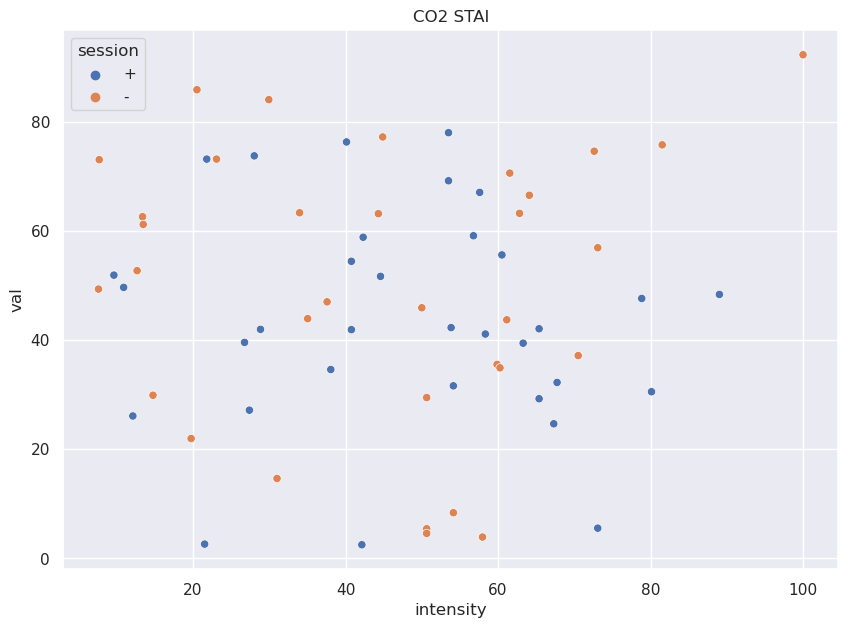

In [342]:
df_plot = df_stai_ri.query("cond == 'CO2'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='CO2 STAI')

# Compute diff

In [5]:
val = np.zeros((df_mdp['sujet'].unique().shape[0]*df_mdp['session'].unique().shape[0]*df_mdp['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_mdp['sujet'].unique()):
    for session_i, session in enumerate(df_mdp['session'].unique()):
        for cond_i, cond in enumerate(df_mdp['cond'].unique()):
            df_i = df_mdp.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_A2 = df_i[df_i['question'].isin(['A2_1', 'A2_2', 'A2_3', 'A2_4', 'A2_5'])]['value'].sum()
            val[i, :] = np.array([sujet, session, cond, val_A2])
            i += 1

df_A2 = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'value'])
df_A2['value'] = df_A2['value'].astype(np.float64) 
df_A2

sujet session  cond  value
0    PD01       o  MECA   26.0
1    PD01       o   CO2   34.0
2    PD01       +  MECA   40.0
3    PD01       +   CO2   32.0
4    PD01       -  MECA   27.0
..    ...     ...   ...    ...
193  MA33       o   CO2   21.0
194  MA33       +  MECA    2.0
195  MA33       +   CO2    7.0
196  MA33       -  MECA    1.0
197  MA33       -   CO2   11.0

[198 rows x 4 columns]

In [6]:
val = np.zeros((df_q['sujet'].unique().shape[0]*df_q['session'].unique().shape[0]*df_q['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_q['sujet'].unique()):
    for session_i, session in enumerate(df_q['session'].unique()):
        for cond_i, cond in enumerate(df_q['cond'].unique()):
            df_i = df_q.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_p = 300 - df_i[df_i['question'].isin([1, 4, 5])]['val'].sum()
            val_n = df_i[df_i['question'].isin([2, 3, 6])]['val'].sum()
            val_stai = ((val_n + val_p)/600)*100
            val[i, :] = np.array([sujet, session, cond, val_stai])
            i += 1
df_stai = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'val'])
df_stai['val'] = df_stai['val'].astype(np.float64) 
df_stai

sujet session    cond        val
0    PD01       o  FR_CV1  55.765199
1    PD01       o    MECA  69.287212
2    PD01       o     CO2  77.044025
3    PD01       o  FR_CV2  45.702306
4    PD01       +  FR_CV1  44.055202
..    ...     ...     ...        ...
391  MA33       +  FR_CV2  17.634409
392  MA33       -  FR_CV1   8.279570
393  MA33       -    MECA  66.774194
394  MA33       -     CO2  63.247863
395  MA33       -  FR_CV2  42.094017

[396 rows x 4 columns]

In [12]:
df_rela = df_q.query(f"question == 7").drop(['question', 'raw_val', 'scale'], axis=1)
df_rela

sujet session    cond         val
6     PD01       o  FR_CV1   45.283019
14    PD01       o    MECA   16.981132
22    PD01       o     CO2   13.207547
30    PD01       o  FR_CV2   60.377358
38    PD01       +  FR_CV1   53.503185
...    ...     ...     ...         ...
3134  MA33       +  FR_CV2   90.322581
3142  MA33       -  FR_CV1  100.000000
3150  MA33       -    MECA   32.258065
3158  MA33       -     CO2   23.076923
3166  MA33       -  FR_CV2   46.153846

[396 rows x 4 columns]

In [62]:
diff_i = df_A2.query(f"sujet == '{sujet}' & cond == 'MECA' & session == '+'")['value'].values[0] / df_A2.query(f"sujet == '{sujet}' & cond == 'MECA' & session == '-'")['value'].values[0]
diff_i

2.0

In [77]:
df_diff = {'sujet' : [], 'diff' : [], 'cond' : [], 'question' : [], 'val' : []}
for sujet in sujet_list:
    for diff_cond in ['+/o', '-/o', '+/-']:
        for cond in ['FR_CV1', 'MECA', 'CO2', 'FR_CV2']:
            for question in ['A2', 'STAI', 'RELAX']:

                diff_cond_a, diff_cond_b = diff_cond.split('/')[0], diff_cond.split('/')[-1]
            
                if question == 'A2' and cond.find('FR_CV') == -1:
                    diff_i = df_A2.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_a}'")['value'].values[0] - df_A2.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_b}'")['value'].values[0]
                if question == 'STAI':
                    diff_i = df_stai.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_a}'")['val'].values[0] - df_stai.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_b}'")['val'].values[0]
                if question == 'RELAX':
                    diff_i = df_rela.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_a}'")['val'].values[0] - df_rela.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_b}'")['val'].values[0]

                df_diff['sujet'].append(sujet)
                df_diff['diff'].append(diff_cond)
                df_diff['cond'].append(cond)
                df_diff['question'].append(question)
                df_diff['val'].append(diff_i)

df_diff = pd.DataFrame(df_diff)
df_diff

sujet diff    cond question        val
0     PD01  +/o  FR_CV1       A2   1.978656
1     PD01  +/o  FR_CV1     STAI -11.709997
2     PD01  +/o  FR_CV1    RELAX   8.220166
3     PD01  +/o    MECA       A2  14.000000
4     PD01  +/o    MECA     STAI   2.050368
...    ...  ...     ...      ...        ...
1183  MA33  +/-     CO2     STAI -28.624207
1184  MA33  +/-     CO2    RELAX  65.955335
1185  MA33  +/-  FR_CV2       A2  65.955335
1186  MA33  +/-  FR_CV2     STAI -24.459608
1187  MA33  +/-  FR_CV2    RELAX  44.168734

[1188 rows x 5 columns]

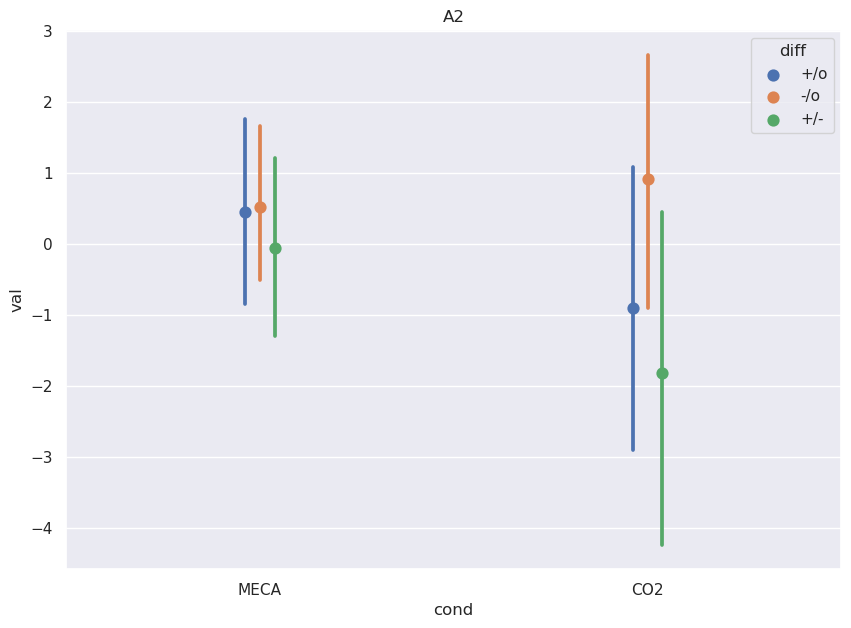

In [78]:
df_plot = df_diff.query(f"question == 'A2' & cond in ['MECA', 'CO2']")
sns.pointplot(data=df_plot, x="cond", y="val", hue="diff", errorbar='sd', linestyles='none', dodge=True).set(title='A2')
sns.set(rc={'figure.figsize':(10,7)})


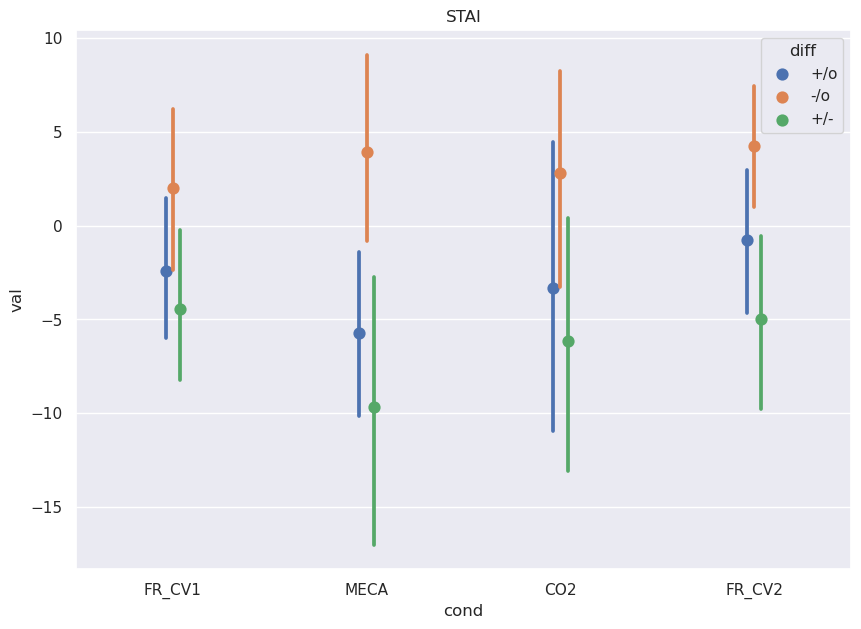

In [79]:
df_plot = df_diff.query(f"question == 'STAI'")
sns.pointplot(data=df_plot, x="cond", y="val", hue="diff", errorbar='sd', linestyles='none', dodge=True).set(title='STAI')
sns.set(rc={'figure.figsize':(10,7)})

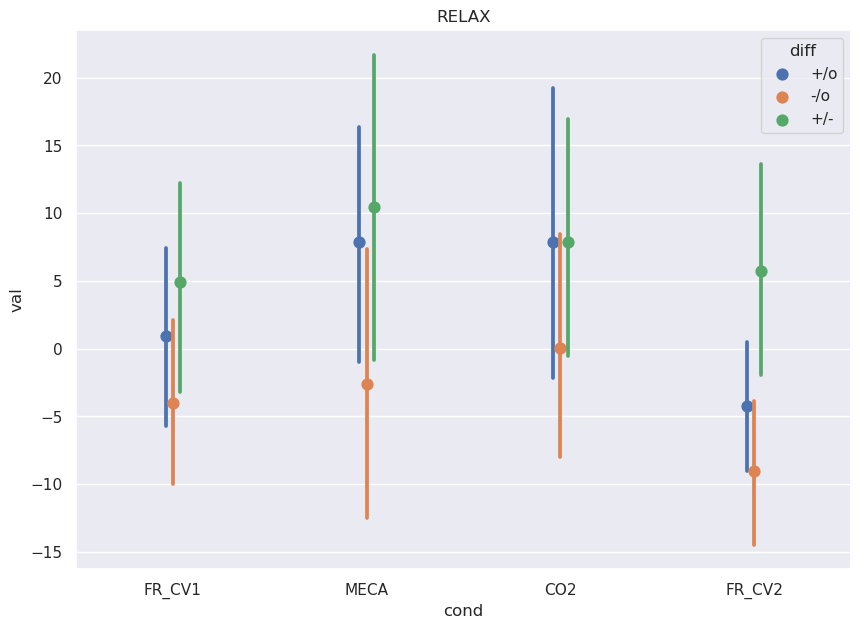

In [80]:
df_plot = df_diff.query(f"question == 'RELAX'")
sns.pointplot(data=df_plot, x="cond", y="val", hue="diff", errorbar='sd', linestyles='none', dodge=True).set(title='RELAX')
sns.set(rc={'figure.figsize':(10,7)})

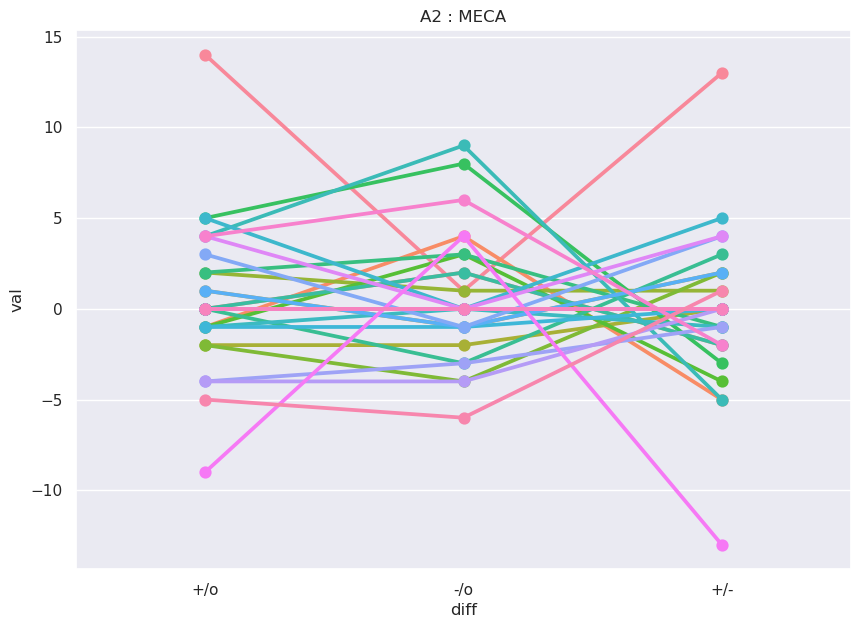

In [114]:
cond = 'MECA'
df_plot = df_diff.query(f"question == 'A2' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'A2 : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

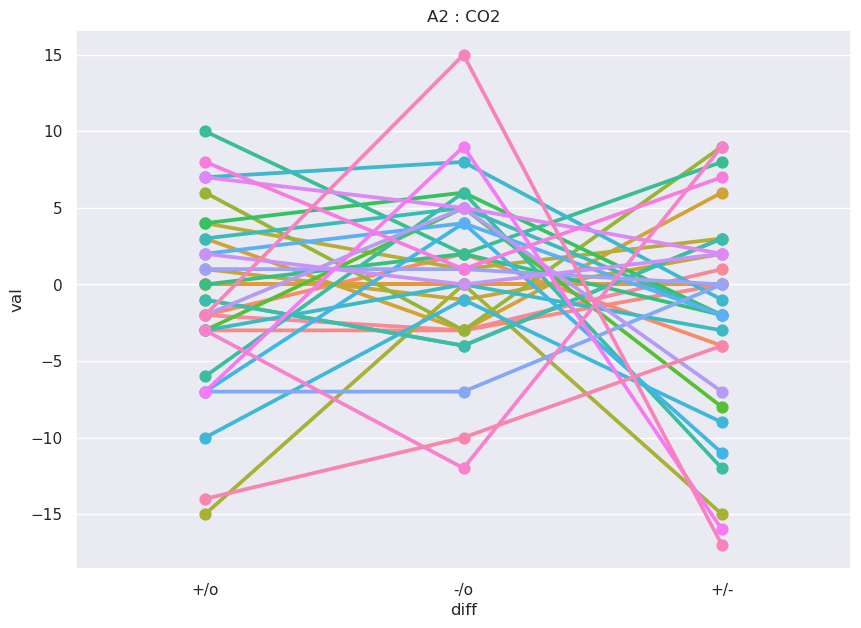

In [115]:
cond = 'CO2'
df_plot = df_diff.query(f"question == 'A2' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'A2 : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

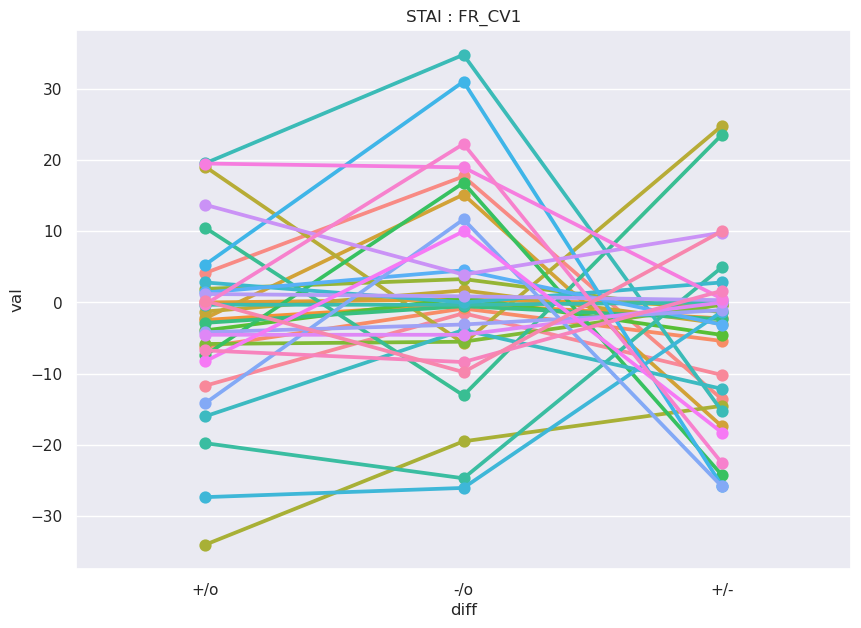

In [116]:
cond = 'FR_CV1'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

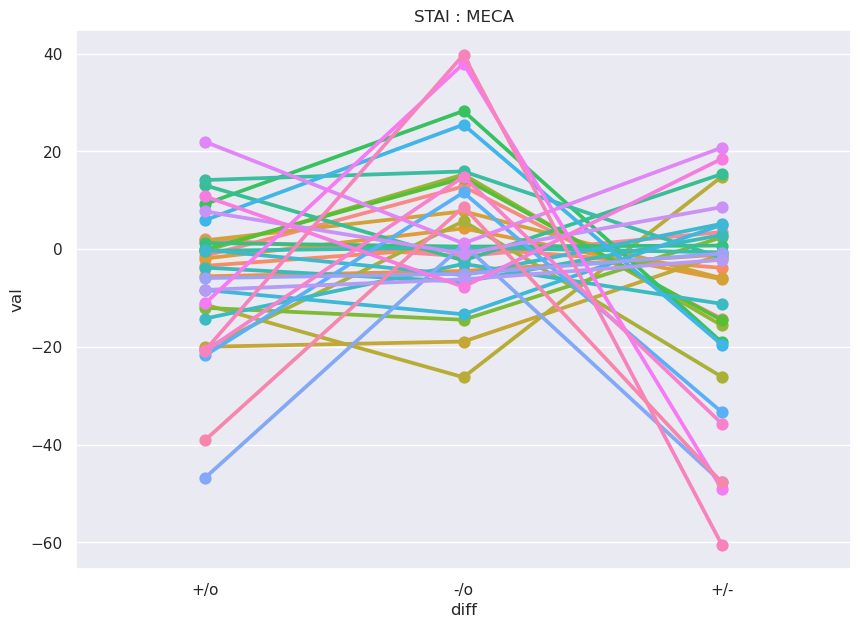

In [117]:
cond = 'MECA'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

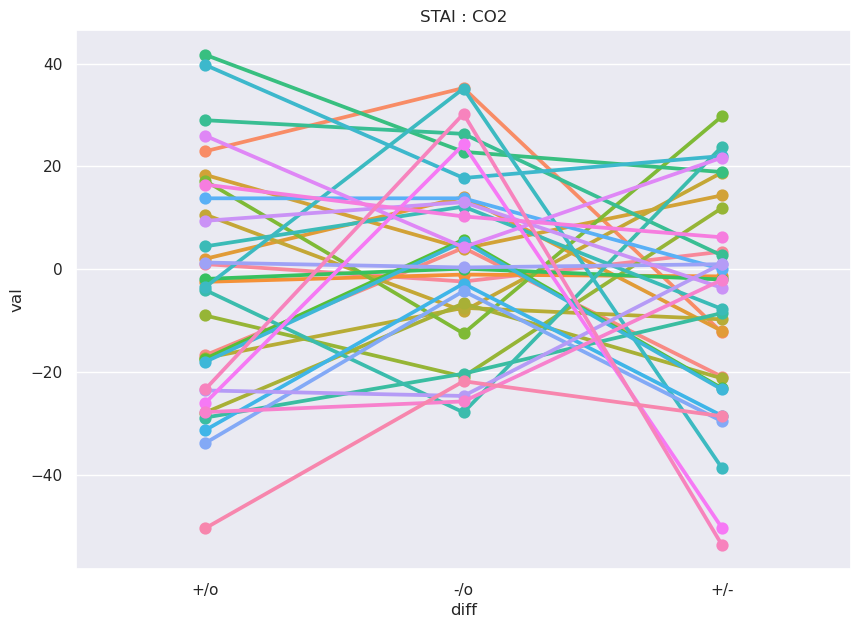

In [118]:
cond = 'CO2'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

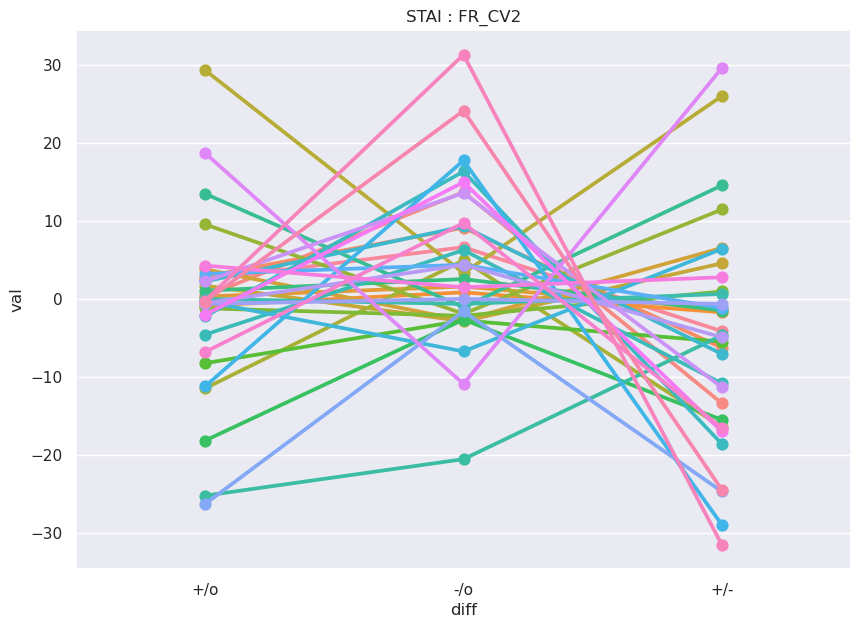

In [119]:
cond = 'FR_CV2'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

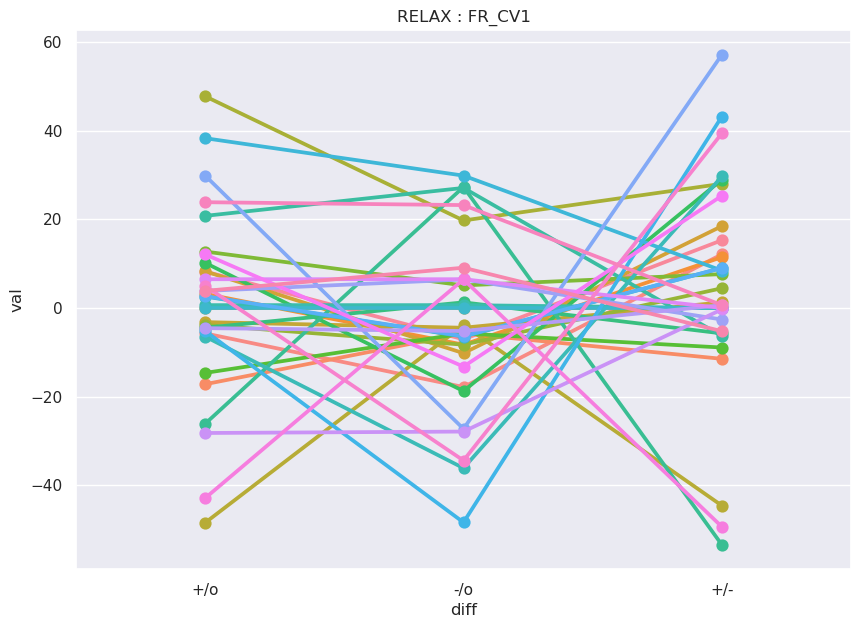

In [120]:
cond = 'FR_CV1'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

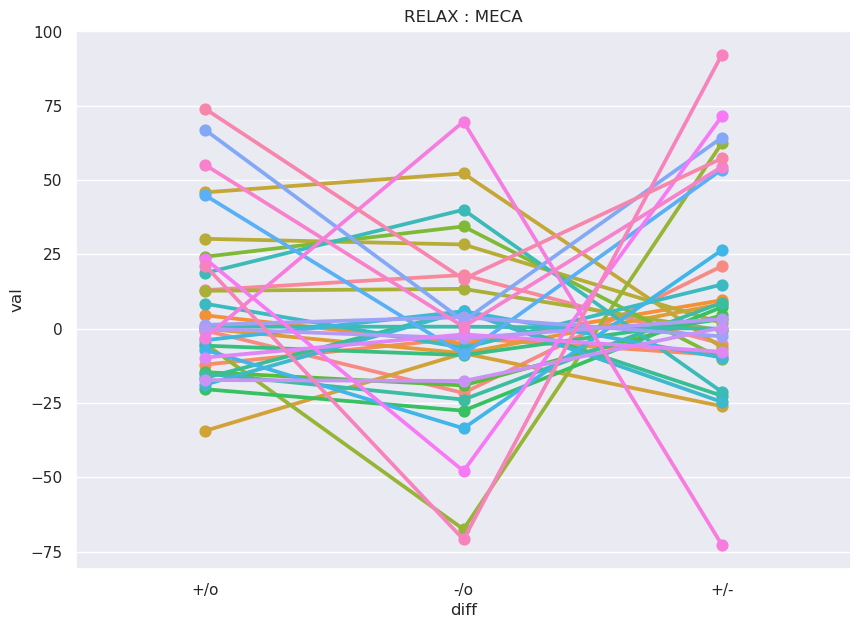

In [121]:
cond = 'MECA'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

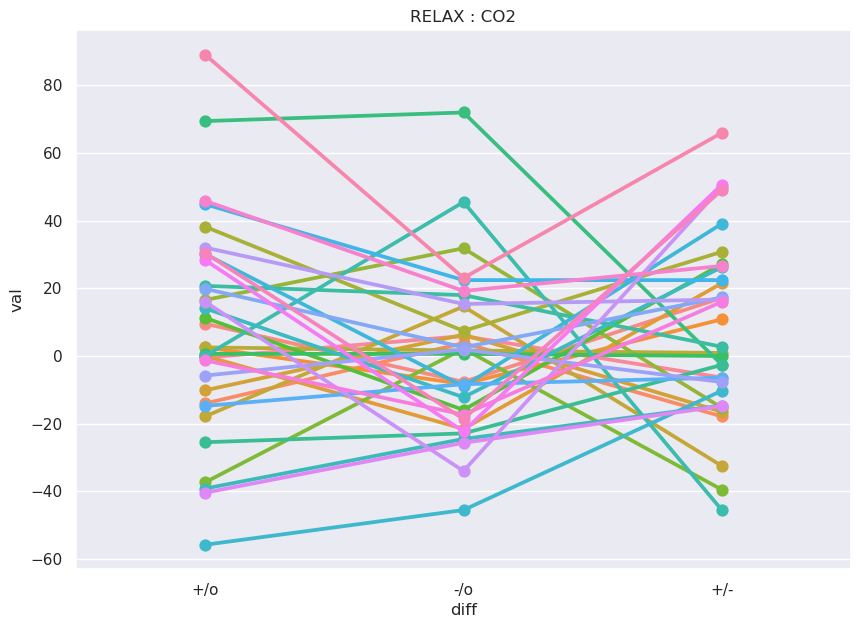

In [122]:
cond = 'CO2'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

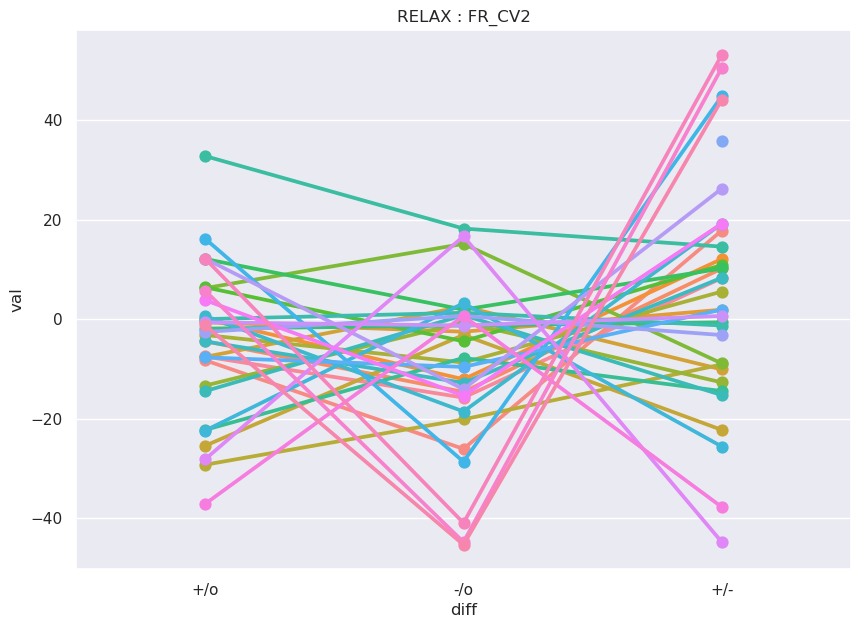

In [123]:
cond = 'FR_CV2'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

# CO2 RESISTANCE

In [7]:
os.chdir(os.path.join(path_data, 'respi_detection'))

In [67]:
sujet_list = np.array(['PD01','MJ02','VN03','GB04','LV05','EF06','DM08','TA09','BH10','FA11','BD12','FP13',
'MD14','LG15','GM16','JR17','TM19','TY20','DI22','LF23','TJ24','DF25','MN26','BD27','NT28','SC29',
'AR30','HJ31','CM32','MA33'])
odor_list_load = np.array(['0', 'P', 'N'])
odor_list = np.array(['o', '+', '-'])
odor_code = {'0' : 'o', 'P' : '+', 'N' : '-'}

In [101]:
CO2_data = {}

for sujet in sujet_list:

    CO2_data[sujet] = {}

    for odor in odor_list_load:

        CO2_data[sujet][odor_code[odor]] = {}

        file_load = f'ANA_{sujet[2:]}_{sujet}_{odor}.xlsx'
        df_raw = pd.read_excel(file_load, sheet_name='Variables cycle T2')
        
        time_vec = np.array([i for i in df_raw['Temps de début de cycle'].dropna().values[1:] if (type(i) == float) and (i > 0)]).astype(float)
        
        mask = []
        for val in df_raw['Temps de début de cycle'].values:
            if val in time_vec:
                mask.append(True)
            else:
                mask.append(False)
        mask = np.array(mask)

        CO2_vec = df_raw['PetCO2'][mask]
        VAS_A = df_raw['VAS A'][mask]
        VAS_S = df_raw['VAS S'][mask]

        CO2_vec_sel = []
        for val in CO2_vec:
            if type(val) == float:
                CO2_vec_sel.append(True)
            else:
                CO2_vec_sel.append(False)
        CO2_vec_sel = np.array(CO2_vec_sel)

        VAS_A_sel = []
        for val in VAS_A:
            if type(val) == float:
                VAS_A_sel.append(True)
            else:
                VAS_A_sel.append(False)
        VAS_A_sel = np.array(VAS_A_sel)

        VAS_S_sel = []
        for val in VAS_S:
            if type(val) == float:
                VAS_S_sel.append(True)
            else:
                VAS_S_sel.append(False)
        VAS_S_sel = np.array(VAS_S_sel)

        mask_global = np.logical_and(CO2_vec_sel, VAS_A_sel, VAS_S_sel)

        CO2_vec = CO2_vec[mask_global].values.astype(float)
        time_vec = time_vec[mask_global].astype(float)
        VAS_A = VAS_A[mask_global].values.astype(float)
        VAS_S = VAS_S[mask_global].values.astype(float)
        
        CO2_data[sujet][odor_code[odor]]['time'] = time_vec
        CO2_data[sujet][odor_code[odor]]['CO2'] = CO2_vec
        CO2_data[sujet][odor_code[odor]]['VAS_A'] = VAS_A
        CO2_data[sujet][odor_code[odor]]['VAS_S'] = VAS_S

/tmp/ipykernel_113932/4166034037.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val in time_vec:
/tmp/ipykernel_113932/4166034037.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val in time_vec:
/tmp/ipykernel_113932/4166034037.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val in time_vec:
/tmp/ipykernel_113932/4166034037.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val in time_vec:
/tmp/ipykernel_113932/4166034037.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val in time_vec:
/tmp/ipykernel_113932/4166034037.py:18: FutureWarning: eleme

In [94]:
df_CO2_data = {'sujet' : [], 'odor' : [], 'CO2' : [], 'VAS_A' : [], 'VAS_S' : []}

for sujet in sujet_list:

    for odor in odor_list:    
        
        df_CO2_data['sujet'].append(sujet)
        df_CO2_data['odor'].append(odor)
        df_CO2_data['CO2'].append(np.median(CO2_data[sujet][odor]['CO2']))
        df_CO2_data['VAS_A'].append(np.median(CO2_data[sujet][odor]['VAS_A']))
        df_CO2_data['VAS_S'].append(np.median(CO2_data[sujet][odor]['VAS_S']))

df_CO2 = pd.DataFrame(df_CO2_data)


In [104]:
df_CO2_data = {'sujet' : [], 'odor' : [], 'cycle_i' : [], 'CO2' : [], 'VAS_A' : [], 'VAS_S' : []}

for sujet in sujet_list:

    for odor in odor_list:   

        for cycle_i, _ in enumerate(CO2_data[sujet][odor]['time']):
        
            df_CO2_data['sujet'].append(sujet)
            df_CO2_data['odor'].append(odor)
            df_CO2_data['cycle_i'].append(cycle_i)
            df_CO2_data['CO2'].append(CO2_data[sujet][odor]['CO2'][cycle_i])
            df_CO2_data['VAS_A'].append(CO2_data[sujet][odor]['VAS_A'][cycle_i])
            df_CO2_data['VAS_S'].append(CO2_data[sujet][odor]['VAS_S'][cycle_i])

df_CO2_cycle = pd.DataFrame(df_CO2_data)

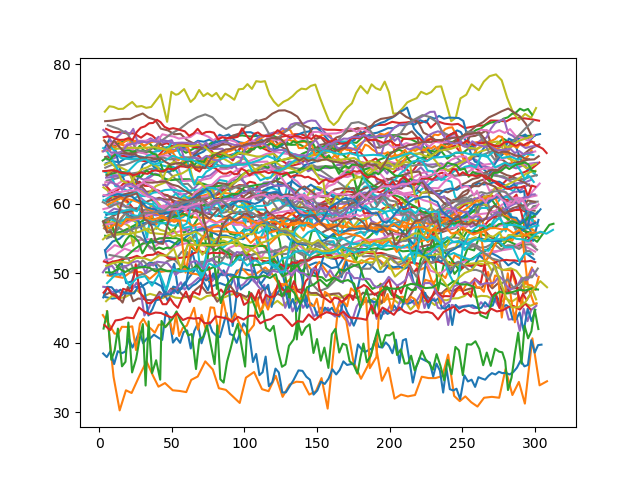

In [75]:
fig, ax = plt.subplots()

for sujet in sujet_list:

    for odor in odor_list:

        ax.plot(CO2_data[sujet][odor]['time'], CO2_data[sujet][odor]['CO2'])

plt.show()
    

## SUJET

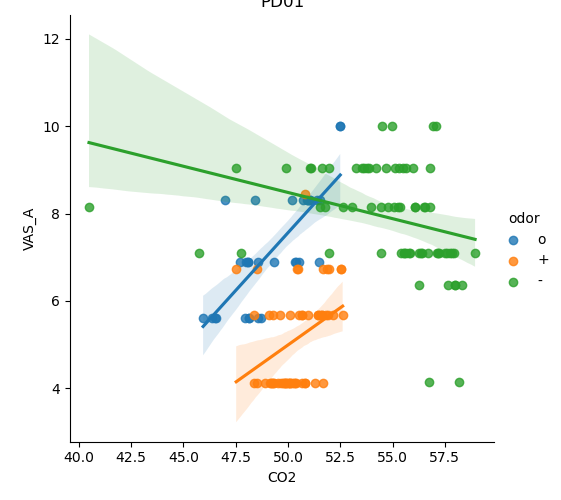

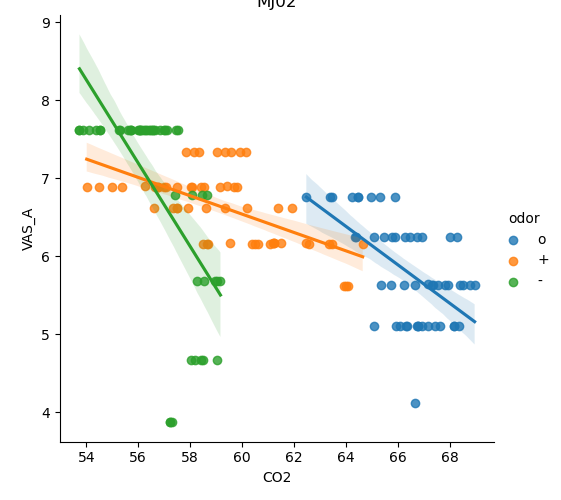

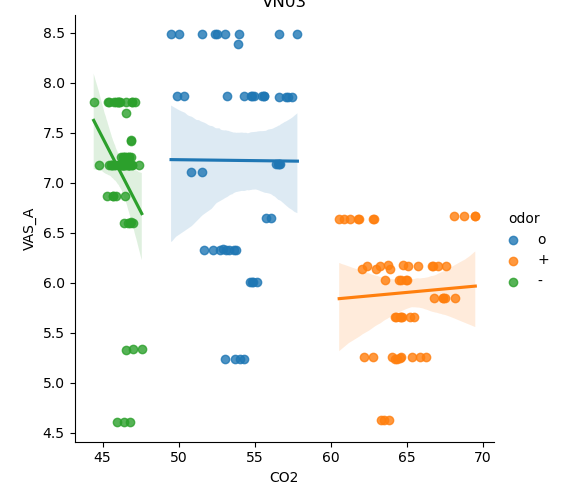

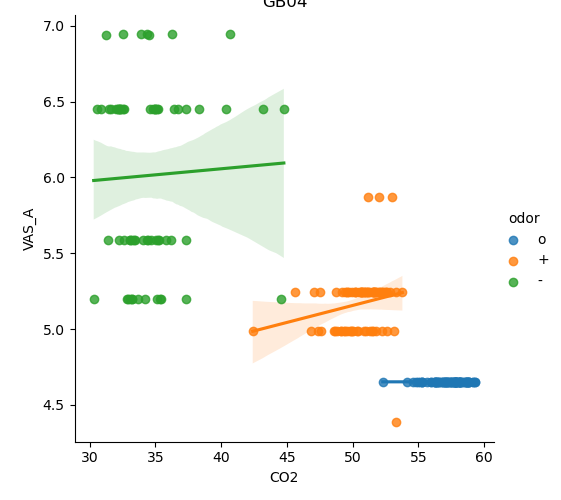

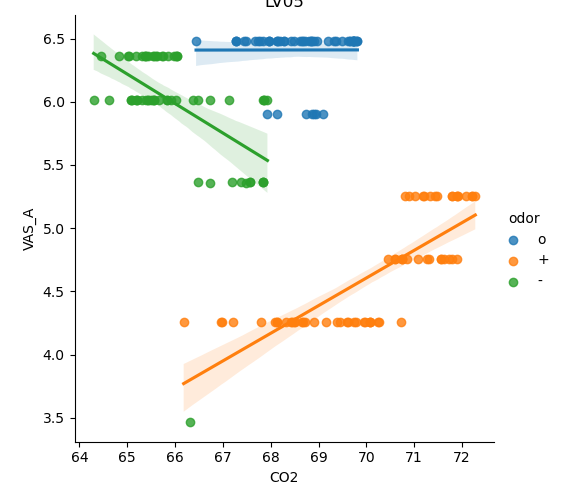

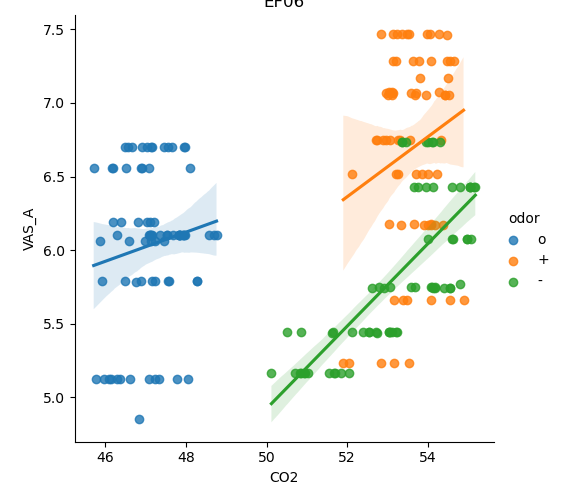

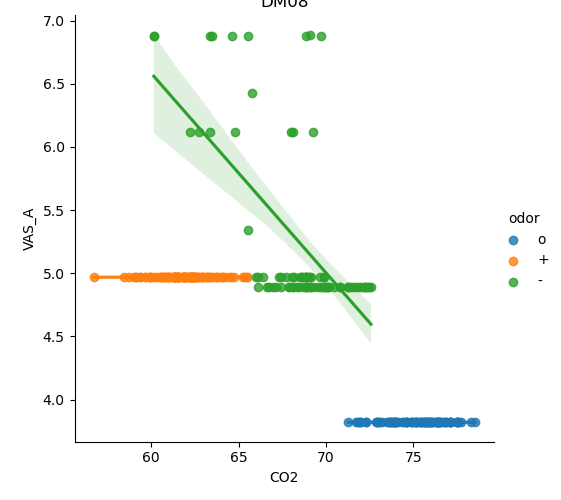

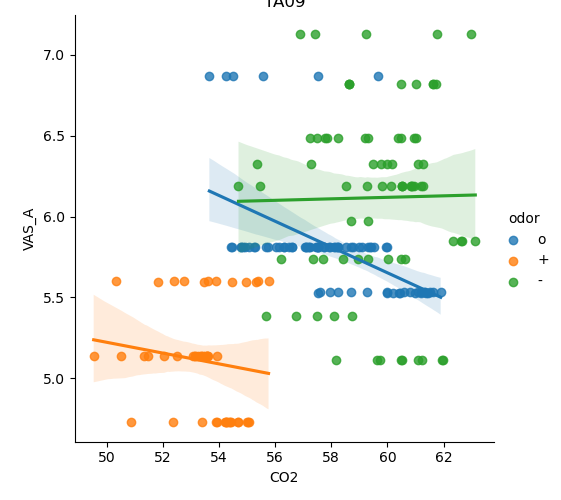

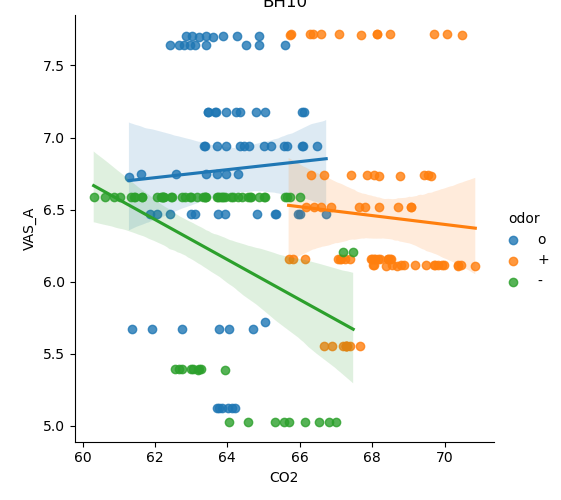

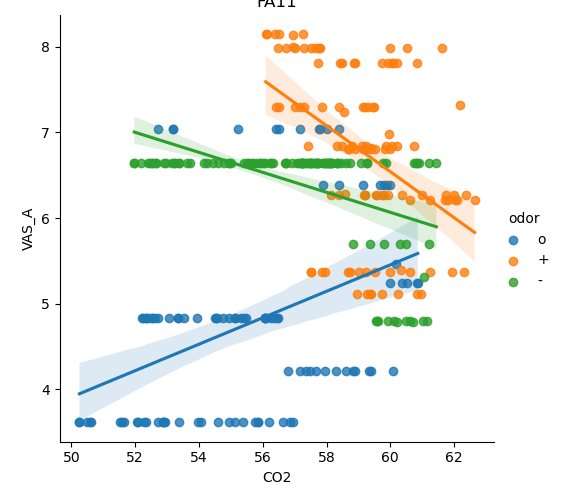

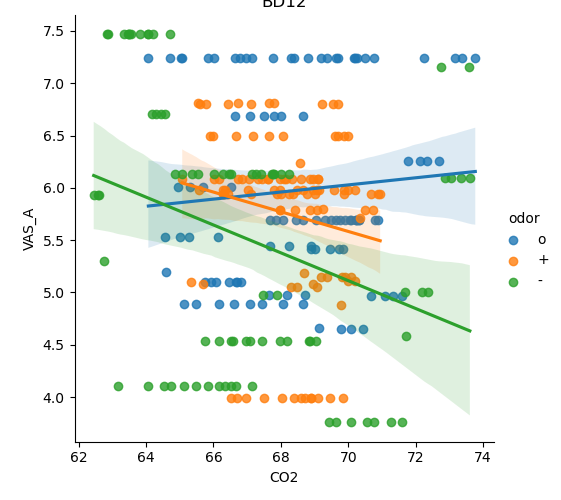

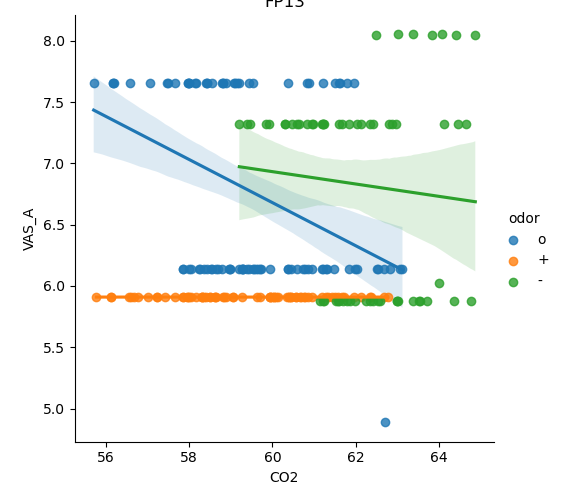

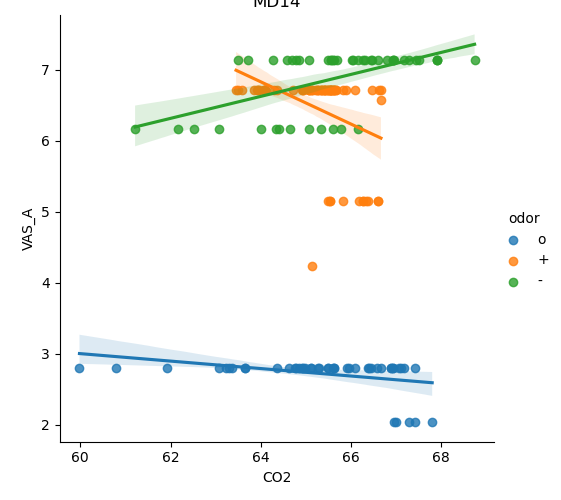

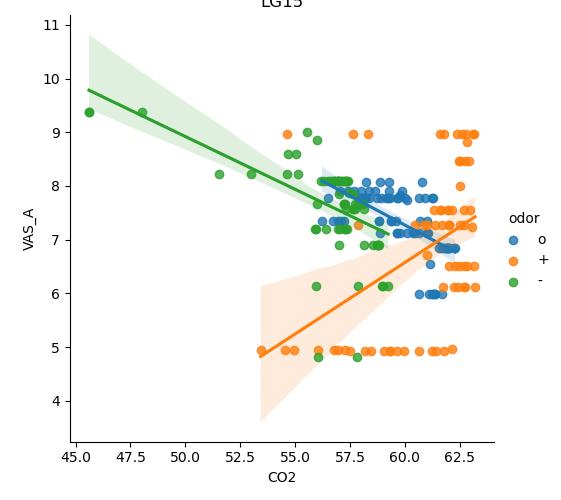

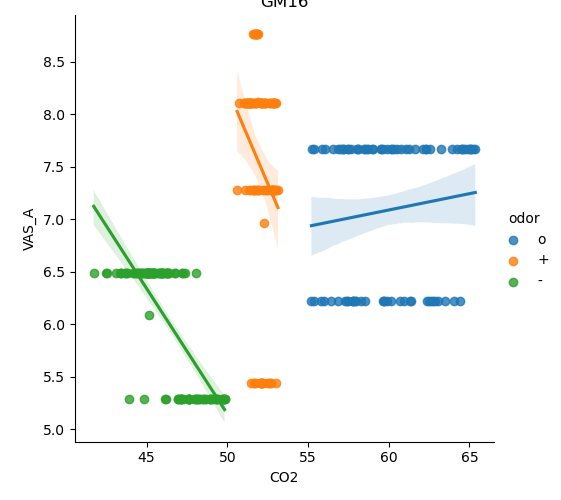

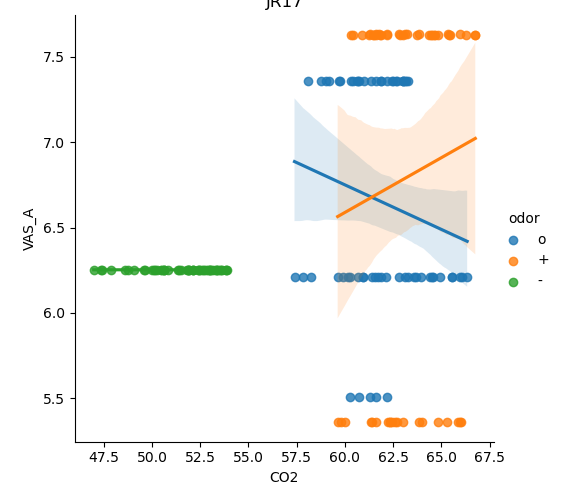

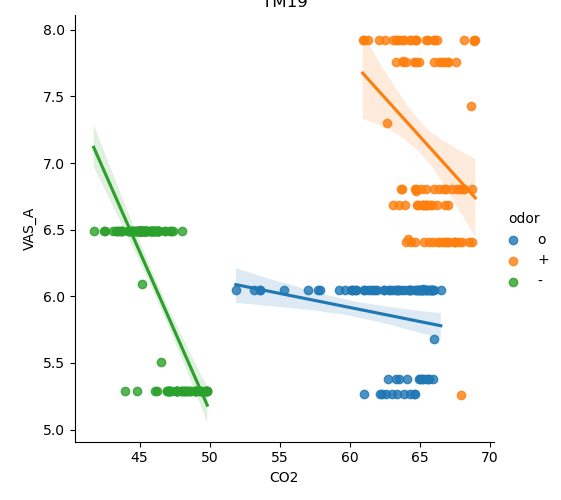

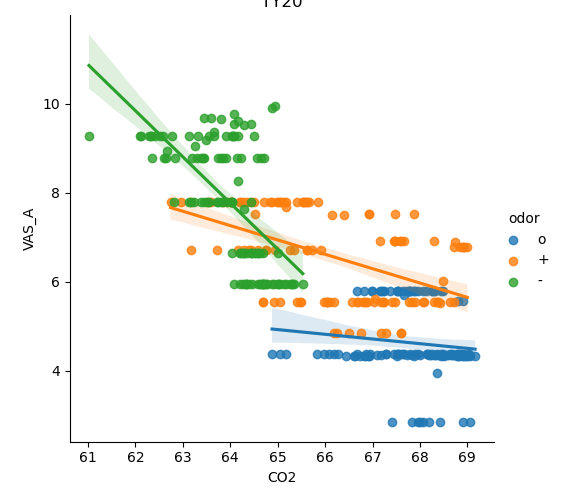

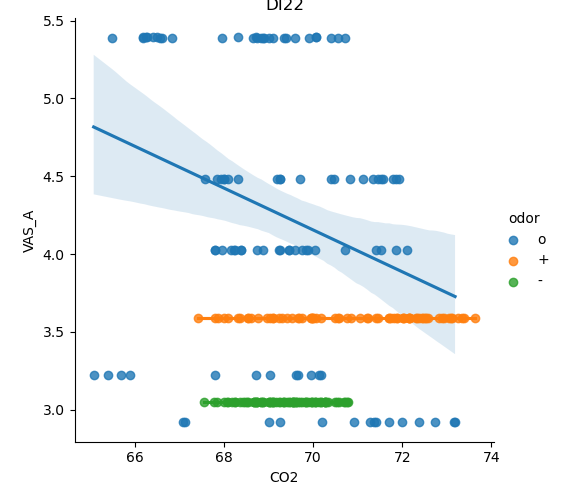

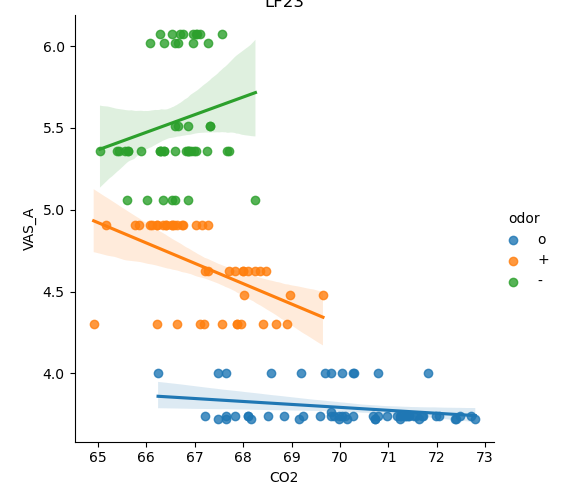

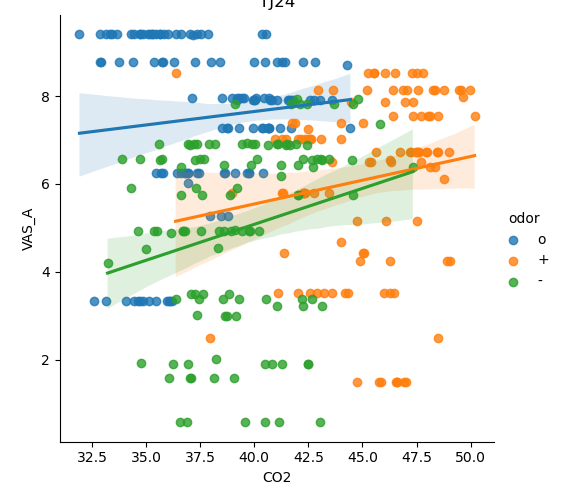

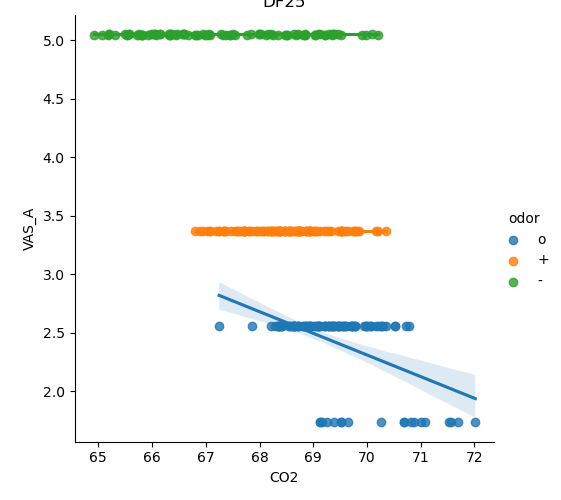

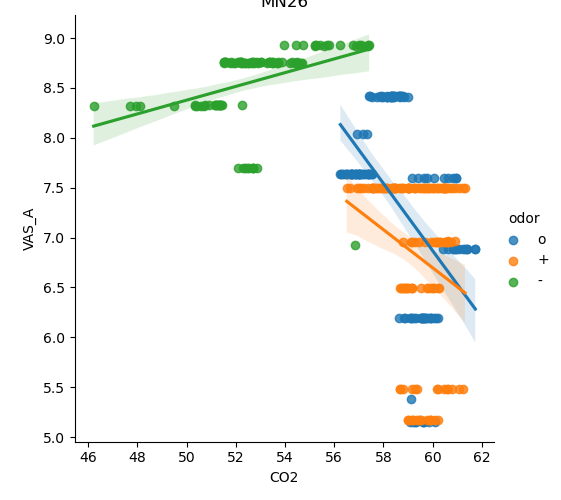

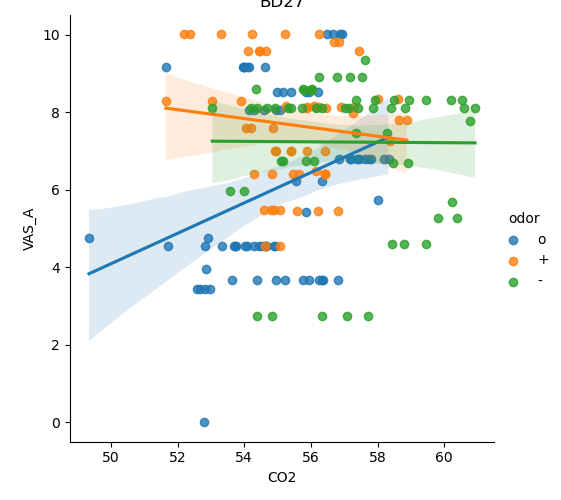

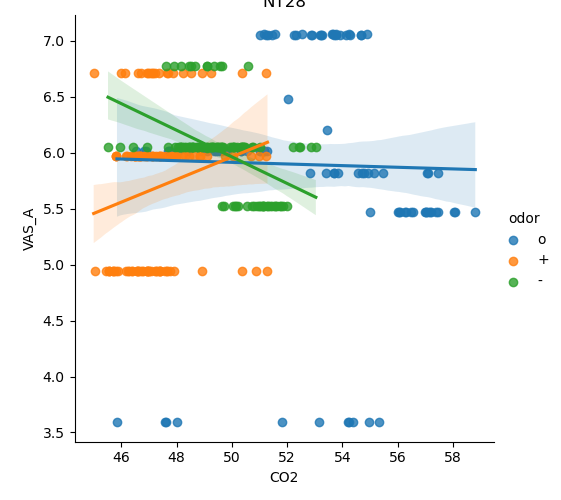

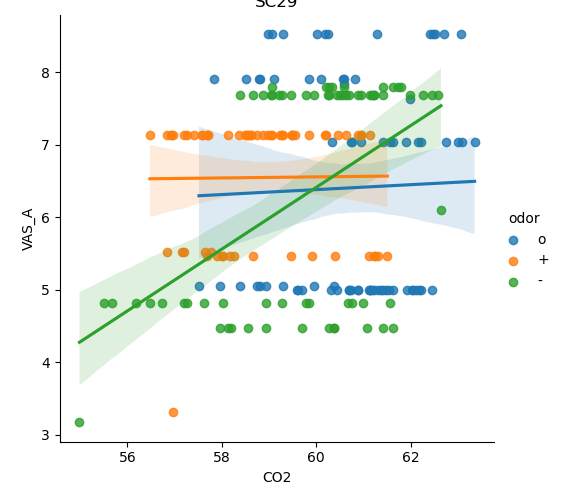

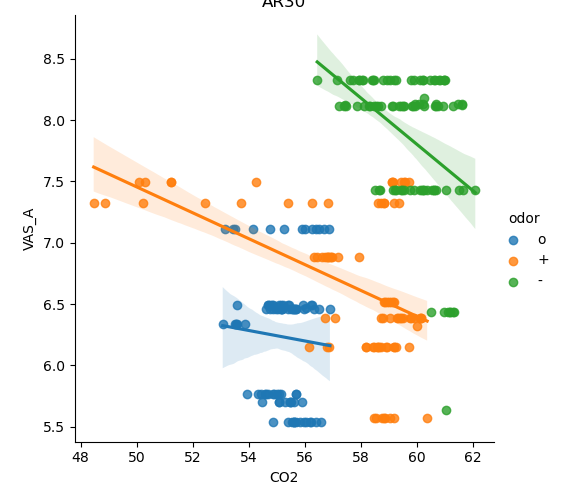

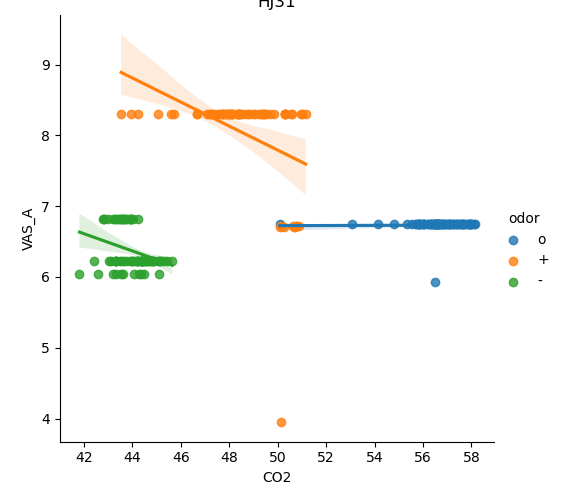

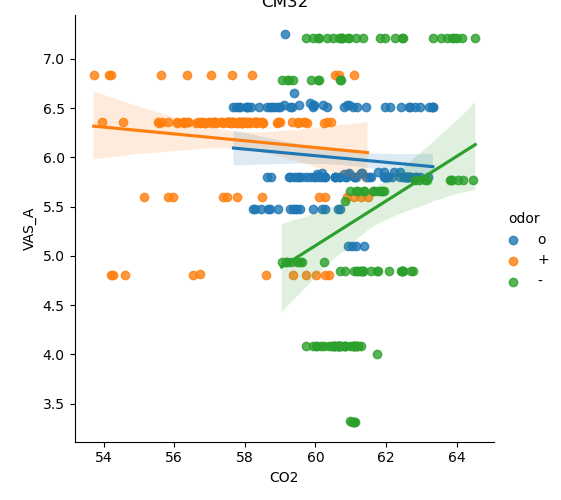

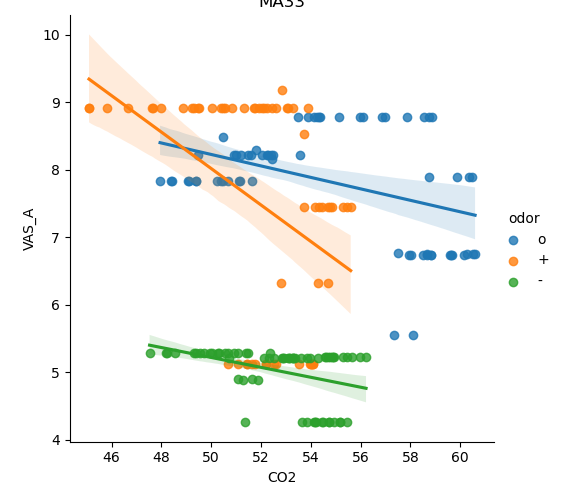

In [118]:
for sujet in sujet_list:
    df_plot = df_CO2_cycle.query(f"sujet == '{sujet}'")
    sns.lmplot(data=df_plot, x="CO2", y="VAS_A", hue="odor", height=5).set(title=sujet)

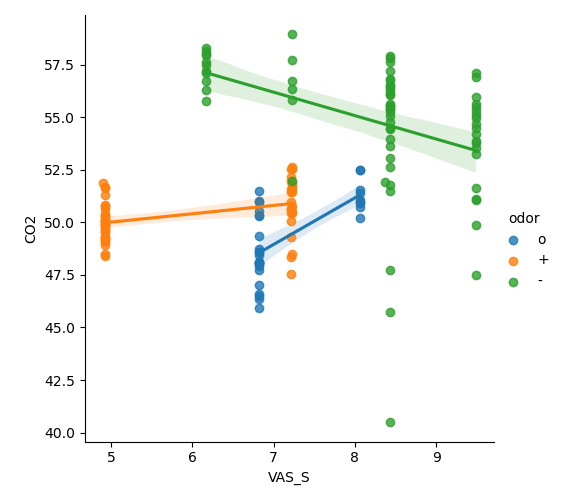

In [107]:
df_plot = df_CO2_cycle.query(f"sujet == 'PD01'")
sns.lmplot(data=df_plot, x="VAS_S", y="CO2", hue="odor", height=5)

## ALLSUJET

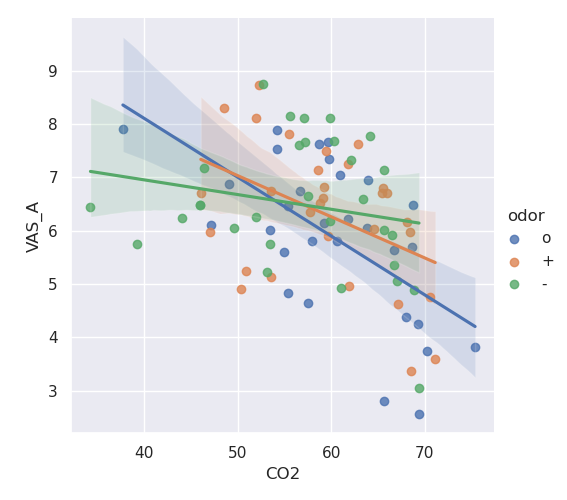

In [124]:
df_plot = df_CO2
sns.lmplot(data=df_plot, x="CO2", y="VAS_A", hue="odor", height=5)

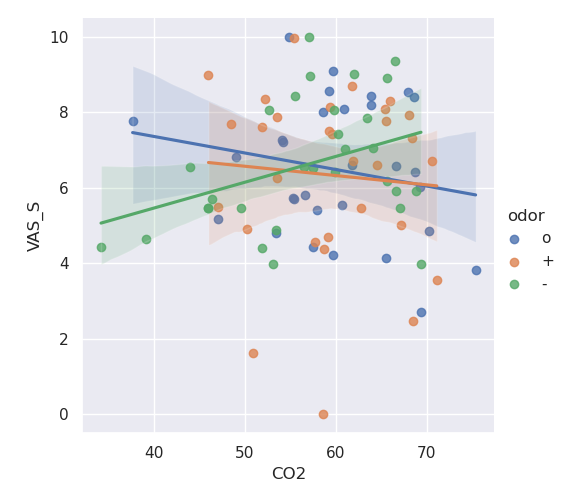

In [125]:
df_plot = df_CO2
sns.lmplot(data=df_plot, x="CO2", y="VAS_S", hue="odor", height=5)

In [122]:
df_CO2

sujet odor        CO2     VAS_A     VAS_S
0   PD01    o  49.033627  6.883655  6.824284
1   PD01    +  50.298823  4.899622  4.924802
2   PD01    -  55.538124  8.151061  8.430654
3   MJ02    o  66.664732  5.636351  6.586272
4   MJ02    +  59.138863  6.614468  4.688381
..   ...  ...        ...       ...       ...
85  CM32    +  57.760202  6.354391  4.559880
86  CM32    -  61.085208  4.934017  7.022525
87  MA33    o  54.240563  7.887214  7.223359
88  MA33    +  52.229334  8.724770  8.361019
89  MA33    -  53.170067  5.217966  3.971823

[90 rows x 5 columns]

In [121]:
df_plot = df_CO2
sns.pointplot(data=df_plot, x="VAS_S", y="CO2", hue="odor", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0,10)

(0.0, 10.0)

In [69]:
xr_data = np.zeros((len(sujet_list), len(odor_list), 3))

for sujet_i, sujet in enumerate(sujet_list):

    for odor_i, odor in enumerate(odor_list_load):

        xr_data[sujet_i, odor_i, 0] = np.median(CO2_data[sujet][odor_code[odor]]['CO2'])
        xr_data[sujet_i, odor_i, 1] = np.median(CO2_data[sujet][odor_code[odor]]['VAS_A'])
        xr_data[sujet_i, odor_i, 2] = np.median(CO2_data[sujet][odor_code[odor]]['VAS_S'])

xr_dict = {'sujet' : sujet_list, 'odor' : odor_list, 'metric' : ['CO2', 'VAS_A', 'VAS_S']}

xr_CO2 = xr.DataArray(xr_data, dims=xr_dict.keys(), coords=xr_dict.values())


In [30]:
# np.median(CO2_data[sujet][odor_code[odor]]['CO2'])
np.median(CO2_data[sujet][odor_code[odor]]['VAS_A'])
CO2_data[sujet][odor_code[odor]]
# np.median(CO2_data[sujet][odor_code[odor]]['VAS_S'])

KeyError: '-'

(0.0, 10.0)

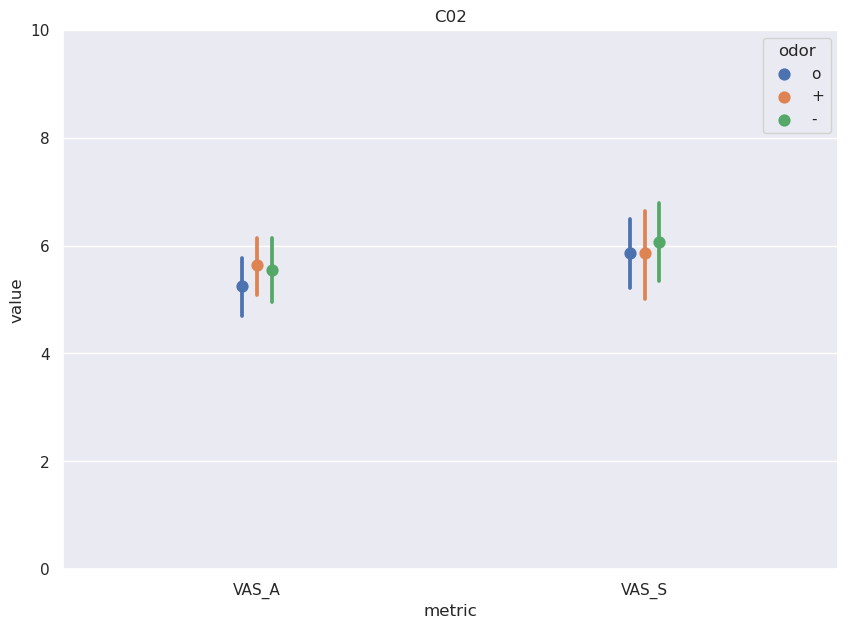

In [79]:
df_plot = df_CO2.query(f"metric in {['VAS_A', 'VAS_S']}")
sns.pointplot(data=df_plot, x="metric", y="value", hue="odor", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0,10)

(0.0, 10.0)

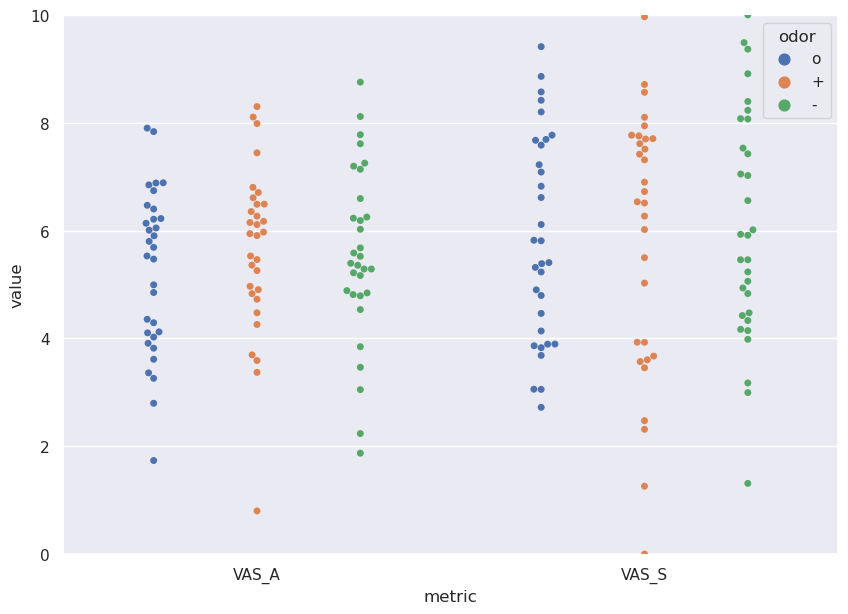

In [80]:
df_plot = df_CO2.query(f"metric in {['VAS_A', 'VAS_S']}")
sns.swarmplot(data=df_plot, x="metric", y="value", hue="odor", dodge=True)
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0,10)

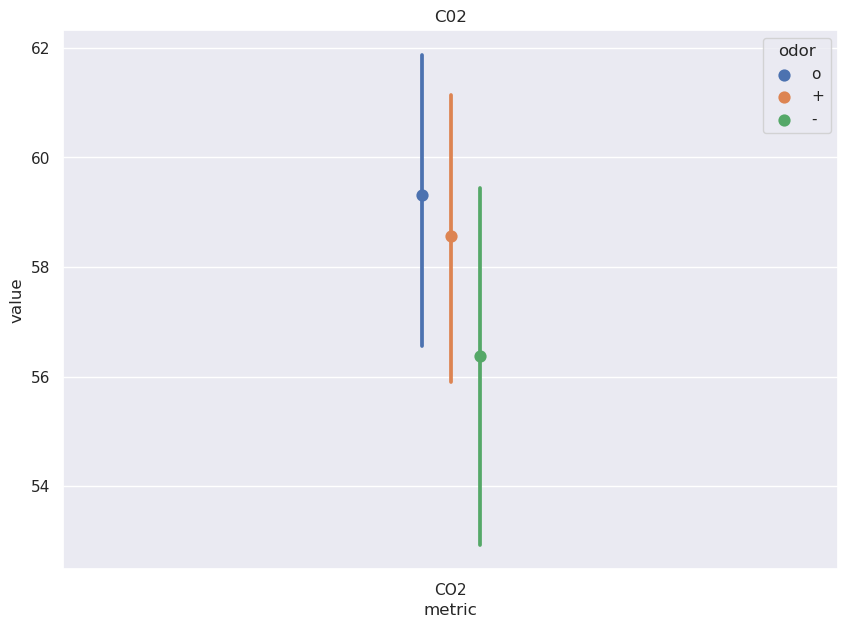

In [81]:
df_plot = df_CO2.query(f"metric == 'CO2'")
sns.pointplot(data=df_plot, x="metric", y="value", hue="odor", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})

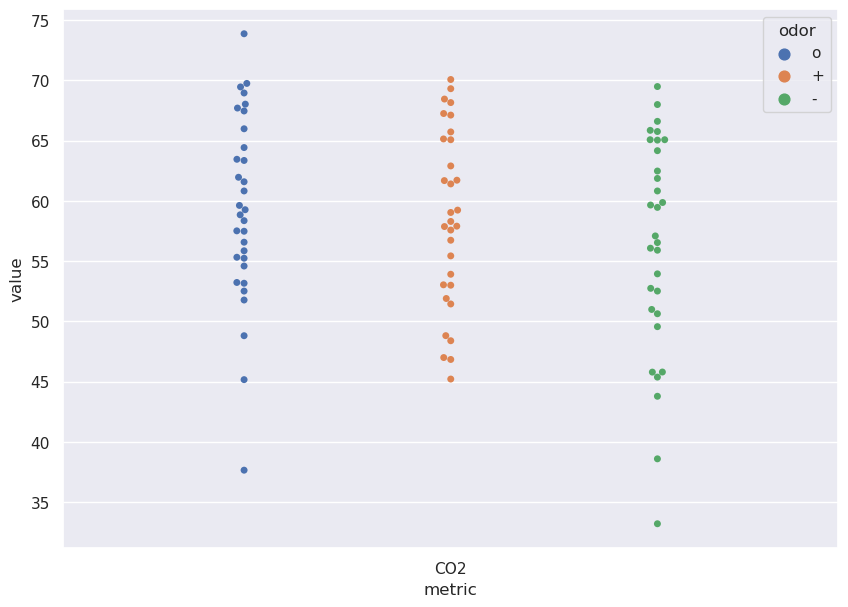

In [82]:
df_plot = df_CO2.query(f"metric == 'CO2'")
sns.swarmplot(data=df_plot, x="metric", y="value", hue="odor", dodge=True)
sns.set(rc={'figure.figsize':(10,7)})

## FILTER

In [99]:
df_relax.query(f"sujet == '{sujet}' and cond == 'CO2' and session == 'o'")['val']

22    13.207547
Name: val, dtype: float64

In [102]:
sujet_best_CO2 = []
sujet_best_MECA = []

for sujet in sujet_list:

    if df_relax.query(f"sujet == '{sujet}' and cond == 'CO2' and session == 'o'")['val'].values < df_relax.query(f"sujet == '{sujet}' and cond == 'CO2' and session == '+'")['val'].values:
        sujet_best_CO2.append(sujet)
    if df_relax.query(f"sujet == '{sujet}' and cond == 'MECA' and session == 'o'")['val'].values < df_relax.query(f"sujet == '{sujet}' and cond == 'CO2' and session == '+'")['val'].values:
        sujet_best_MECA.append(sujet)    

print(sujet_best_CO2)
print(sujet_best_MECA)

['MJ02', 'GB04', 'LV05', 'DM08', 'TA09', 'BH10', 'BD12', 'FP13', 'MD14', 'GM16', 'TM19', 'ZV21', 'DI22', 'TJ24', 'MN26', 'BD27', 'SC29', 'HJ31', 'CM32', 'MA33']
['GB04', 'TA09', 'TJ24', 'AR30', 'HJ31', 'MA33']


(0.0, 10.0)

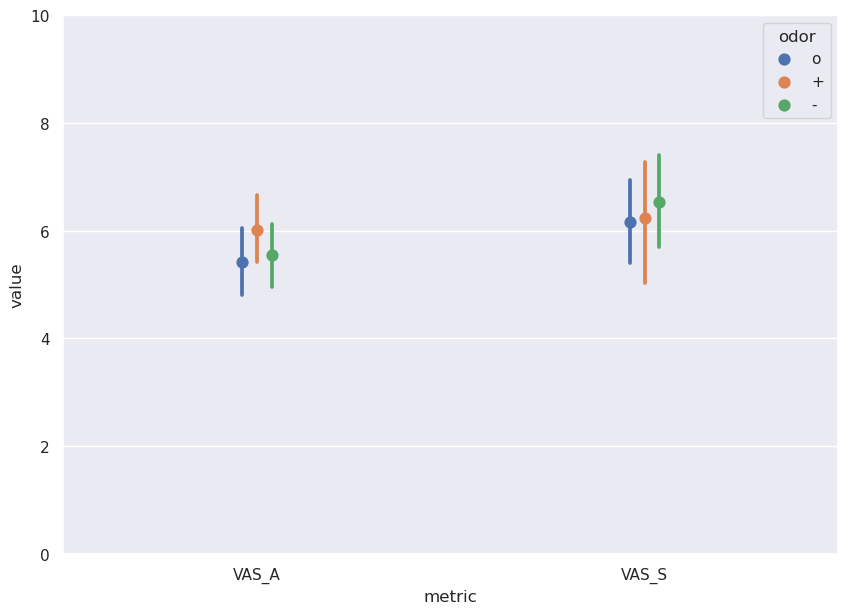

In [104]:
df_plot = df_CO2.query(f"metric in {['VAS_A', 'VAS_S']} and sujet in {sujet_best_CO2}")
sns.pointplot(data=df_plot, x="metric", y="value", hue="odor", errorbar='sd', linestyles='none', dodge=True)
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0,10)

<AxesSubplot:xlabel='metric', ylabel='value'>

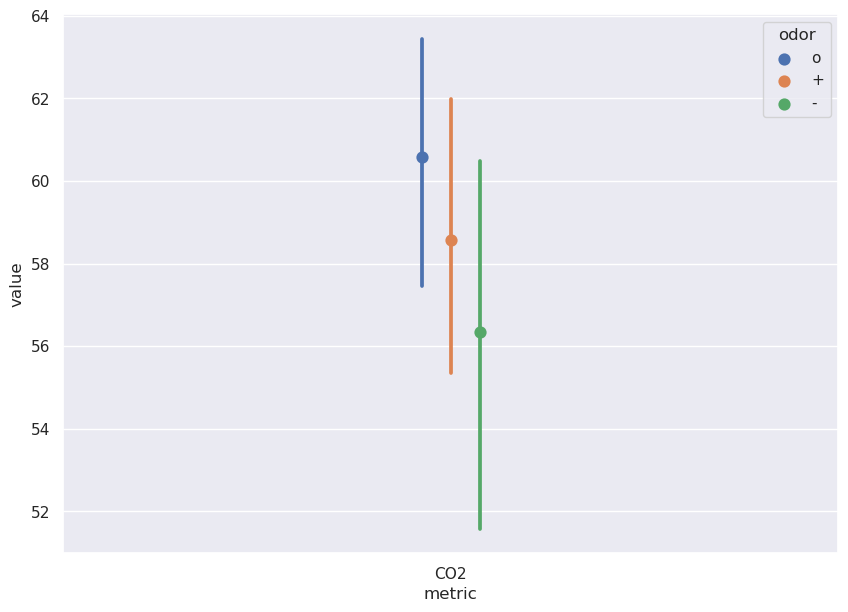

In [105]:
df_plot = df_CO2.query(f"metric == 'CO2' and sujet in {sujet_best_CO2}")
sns.pointplot(data=df_plot, x="metric", y="value", hue="odor", errorbar='sd', linestyles='none', dodge=True)

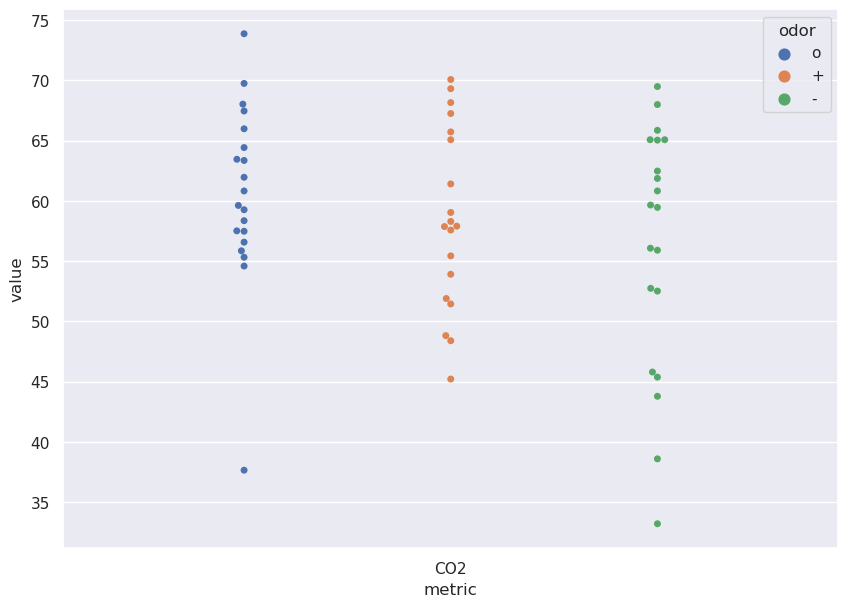

In [106]:
df_plot = df_CO2.query(f"metric == 'CO2' and sujet in {sujet_best_CO2}")
sns.swarmplot(data=df_plot, x="metric", y="value", hue="odor", dodge=True)
sns.set(rc={'figure.figsize':(10,7)})

In [108]:
df_relax.query(f"sujet in ['DM08', 'DI22', 'TA09', 'AR30']")

sujet session    cond         val
678   DM08       o  FR_CV1   93.037975
686   DM08       o    MECA   45.569620
694   DM08       o     CO2   41.401274
702   DM08       o  FR_CV2   89.171975
710   DM08       +  FR_CV1   44.585987
718   DM08       +    MECA   75.796178
726   DM08       +     CO2   43.949045
734   DM08       +  FR_CV2   59.872611
742   DM08       -  FR_CV1   89.171975
750   DM08       -    MECA   73.885350
758   DM08       -     CO2   43.037975
766   DM08       -  FR_CV2   68.987342
774   TA09       o  FR_CV1   43.949045
782   TA09       o    MECA   52.866242
790   TA09       o     CO2   28.025478
798   TA09       o  FR_CV2   80.254777
806   TA09       +  FR_CV1   91.719745
814   TA09       +    MECA   65.605096
822   TA09       +     CO2   66.242038
830   TA09       +  FR_CV2   77.070064
838   TA09       -  FR_CV1   63.694268
846   TA09       -    MECA   66.242038
854   TA09       -     CO2   35.443038
862   TA09       -  FR_CV2   71.518987
2022  DI22       o  FR_CV1   98.701299
2030  DI22       o    MECA  100.000000
2038  DI22       o     CO2    0.645161
2046  DI22       o  FR_CV2   76.129032
2054  DI22       +  FR_CV1   93.506494
2062  DI22       +    MECA   92.857143
2070  DI22       +     CO2   45.512821
2078  DI22       +  FR_CV2   92.307692
2086  DI22       -  FR_CV1   50.322581
2094  DI22       -    MECA   66.451613
2102  DI22       -     CO2   23.076923
2110  DI22       -  FR_CV2   47.435897
2790  AR30       o  FR_CV1   93.548387
2798  AR30       o    MECA   25.161290
2806  AR30       o     CO2   46.153846
2814  AR30       o  FR_CV2   91.666667
2822  AR30       +  FR_CV1   50.649351
2830  AR30       +    MECA   22.077922
2838  AR30       +     CO2   44.871795
2846  AR30       +  FR_CV2   54.487179
2854  AR30       -  FR_CV1  100.000000
2862  AR30       -    MECA   94.805195
2870  AR30       -     CO2   28.846154
2878  AR30       -  FR_CV2   92.307692